**Notebook Structure**



1.   Importing Necessary Libraries and Dataset

2.   Dataset summarization

3.   Important Pre-computation/Cleaning

4.   Exploratory Data Analysis - Univariate Analysis of Numerical Variables

5.   Exploratory Data Analysis - Univariate Analysis of Categorical Variables
6.   Exploratory Data Analysis - Univariate Analysis of Temporal Variables


7.   Bivariate analysis - Numerical Vs Numerical variable


8.   Bivariate analysis - Numerical Vs Categorical variable


9.   Bivariate analysis - Categorical Vs Categorical variable


10.   Multivariate Analysis

11.   Outlier Analysis of Total Amount

12.   Purchase Frequency Distribution & Analysis of Distribution of Most Loyal Customers




**1. Importing Necessary Libraries and Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('retail_data.csv')

**2. Dataset Summarization**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [3]:
df.describe(include='all')

Transaction_ID    Customer_ID           Name                Email  \
count     3.016770e+05  301702.000000         301628               301663   
unique             NaN            NaN         159390                52897   
top                NaN            NaN  Michael Smith  Michael59@gmail.com   
freq               NaN            NaN            144                   93   
mean      5.495823e+06   55006.553934            NaN                  NaN   
std       2.595565e+06   26005.675200            NaN                  NaN   
min       1.000007e+06   10000.000000            NaN                  NaN   
25%       3.247930e+06   32469.250000            NaN                  NaN   
50%       5.499657e+06   55012.000000            NaN                  NaN   
75%       7.739509e+06   77511.000000            NaN                  NaN   
max       9.999995e+06   99999.000000            NaN                  NaN   

               Phone               Address     City    State        Zipcode  \
count   3.016480e+05                301695   301762   301729  301670.000000   
unique           NaN                299329      130       54            NaN   
top              NaN  34070 Angela Islands  Chicago  England            NaN   
freq             NaN                     2    21652    63059            NaN   
mean    5.501464e+09                   NaN      NaN      NaN   50298.951019   
std     2.596017e+09                   NaN      NaN      NaN   28972.807134   
min     1.000049e+09                   NaN      NaN      NaN     501.000000   
25%     3.255061e+09                   NaN      NaN      NaN   25425.000000   
50%     5.505812e+09                   NaN      NaN      NaN   50602.500000   
75%     7.749860e+09                   NaN      NaN      NaN   75252.000000   
max     9.999996e+09                   NaN      NaN      NaN   99949.000000   

       Country  ...   Total_Amount Product_Category Product_Brand  \
count   301739  ...  301660.000000           301727        301729   
unique       5  ...            NaN                5            18   
top        USA  ...            NaN      Electronics         Pepsi   
freq     95223  ...            NaN            71196         30292   
mean       NaN  ...    1367.651156              NaN           NaN   
std        NaN  ...    1128.998515              NaN           NaN   
min        NaN  ...      10.003750              NaN           NaN   
25%        NaN  ...     438.724278              NaN           NaN   
50%        NaN  ...    1041.117547              NaN           NaN   
75%        NaN  ...    2029.999853              NaN           NaN   
max        NaN  ...    4999.625796              NaN           NaN   

       Product_Type   Feedback  Shipping_Method Payment_Method Order_Status  \
count        302010     301826           301673         301713       301775   
unique           33          4                3              4            4   
top           Water  Excellent         Same-Day    Credit Card    Delivered   
freq          24459     100755           104156          90116       130449   
mean            NaN        NaN              NaN            NaN          NaN   
std             NaN        NaN              NaN            NaN          NaN   
min             NaN        NaN              NaN            NaN          NaN   
25%             NaN        NaN              NaN            NaN          NaN   
50%             NaN        NaN              NaN            NaN          NaN   
75%             NaN        NaN              NaN            NaN          NaN   
max             NaN        NaN              NaN            NaN          NaN   

              Ratings      products  
count   301826.000000        302010  
unique            NaN           318  
top               NaN  Spring water  
freq              NaN          2508  
mean         3.162670           NaN  
std          1.320827           NaN  
min          1.000000           NaN  
25%          2.000000           NaN  
50%          3

In [4]:
df.shape

(302010, 30)

In [5]:
df.head()

Transaction_ID  Customer_ID                 Name                Email  \
0       8691788.0      37249.0  Michelle Harrington    Ebony39@gmail.com   
1       2174773.0      69749.0          Kelsey Hill     Mark36@gmail.com   
2       6679610.0      30192.0         Scott Jensen    Shane85@gmail.com   
3       7232460.0      62101.0        Joseph Miller     Mary34@gmail.com   
4       4983775.0      27901.0        Debra Coleman  Charles30@gmail.com   

          Phone                      Address        City            State  \
0  1.414787e+09            3959 Amanda Burgs    Dortmund           Berlin   
1  6.852900e+09           82072 Dawn Centers  Nottingham          England   
2  8.362160e+09            4133 Young Canyon     Geelong  New South Wales   
3  2.776752e+09  8148 Thomas Creek Suite 100    Edmonton          Ontario   
4  9.098268e+09    5813 Lori Ports Suite 269     Bristol          England   

   Zipcode    Country  ...  Total_Amount Product_Category  Product_Brand  \
0  77985.0    Germany  ...    324.086270         Clothing           Nike   
1  99071.0         UK  ...    806.707815      Electronics        Samsung   
2  75929.0  Australia  ...   1063.432799            Books  Penguin Books   
3  88420.0     Canada  ...   2466.854021       Home Decor     Home Depot   
4  48704.0         UK  ...    248.553049          Grocery         Nestle   

  Product_Type   Feedback  Shipping_Method Payment_Method Order_Status  \
0       Shorts  Excellent         Same-Day     Debit Card      Shipped   
1       Tablet  Excellent         Standard    Credit Card   Processing   
2   Children's    Average         Same-Day    Credit Card   Processing   
3        Tools  Excellent         Standard         PayPal   Processing   
4    Chocolate        Bad         Standard           Cash      Shipped   

   Ratings           products  
0      5.0     Cycling shorts  
1      4.0         Lenovo Tab  
2      2.0   Sports equipment  
3      4.0      Utility knife  
4      1.0  Chocolate cookies  

[5 rows x 30 columns]

**3. Important Pre-computation/Cleaning**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [7]:
#Conversion of date to date-time
df['Date'] = pd.to_datetime(df['Date'],format='mixed')
#Conversion of year to date-time
df['Year'] = pd.to_datetime(df['Year'])
#Conversion of Time to date-time
df['Time'] = pd.to_datetime(df['Time'])

/tmp/ipython-input-1180097013.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction_ID    301677 non-null  float64       
 1   Customer_ID       301702 non-null  float64       
 2   Name              301628 non-null  object        
 3   Email             301663 non-null  object        
 4   Phone             301648 non-null  float64       
 5   Address           301695 non-null  object        
 6   City              301762 non-null  object        
 7   State             301729 non-null  object        
 8   Zipcode           301670 non-null  float64       
 9   Country           301739 non-null  object        
 10  Age               301837 non-null  float64       
 11  Gender            301693 non-null  object        
 12  Income            301720 non-null  object        
 13  Customer_Segment  301795 non-null  object        
 14  Date

**Classifying variables**:

1.   Numerical: Transaction_ID,Customer_ID,Phone,Zipcode,Age,Amount,Total_Amount
2.   Categorical:Name,Email,Address,City,State,Country,Gender,Income,Customer_Segment,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,products,Ratings,Total_Purchases
3. Temporal: Date,Year,Month,Time

**4. Exploratory Data Analysis - Univariate Analysis of Numerical Variables**

**Quantitative Analysis & Visualization of data distribution using Histograms with KDE**


1. Central Tendency of Age:
   Mean Age: 35.48
   Median Age: 32.00
   Mode Age: [20.0]
   Minimum Age: 18.00
   Maximum Age: 70.00
count    301837.000000
mean         35.481326
std          15.021933
min          18.000000
25%          22.000000
50%          32.000000
75%          46.000000
max          70.000000
Name: Age, dtype: float64


   Skewness of Age: 0.6525
   Kurtosis of Age: -0.8078




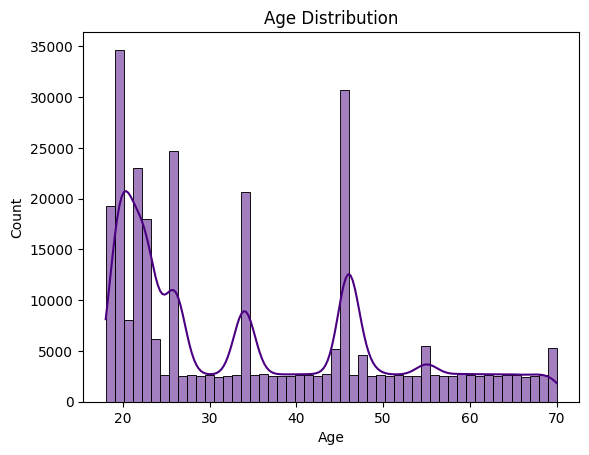



2. Central Tendency of Amount:
   Mean Amount: 255.16
   Median Amount: 255.47
   Mode Amount: [10.14405742, 10.61316166, 10.81939788, 10.98757605, 11.02162493, 11.17760129, 11.28966599, 11.4966827, 11.55347799, 11.60189739, 11.60849471, 11.75073947, 11.95621897, 12.17502207, 12.37149811, 12.59661686, 13.15467126, 13.2710661, 13.4129626, 13.42147331, 13.54778975, 13.64994403, 13.68546109, 13.96068945, 14.19094616, 14.19102229, 14.46674624, 14.75565777, 14.94646126, 15.18395544, 15.8616971, 15.91289441, 16.07203325, 17.07637081, 17.50500747, 17.67204112, 17.92230886, 18.00301844, 18.15401378, 18.24164827, 18.54649509, 18.95860701, 19.20063193, 19.85723761, 19.95005603, 19.97338712, 20.08985044, 20.10210193, 20.53247475, 21.13611276, 21.42743838, 21.68649979, 21.72442393, 21.83141875, 21.92023076, 21.95379915, 22.27872283, 22.48164574, 22.52883592, 23.23487822, 23.31535593, 23.48683906, 23.95384064, 24.07258142, 24.46312962, 24.82810214, 24.92958295, 25.04484396, 25.06824702, 25.089891

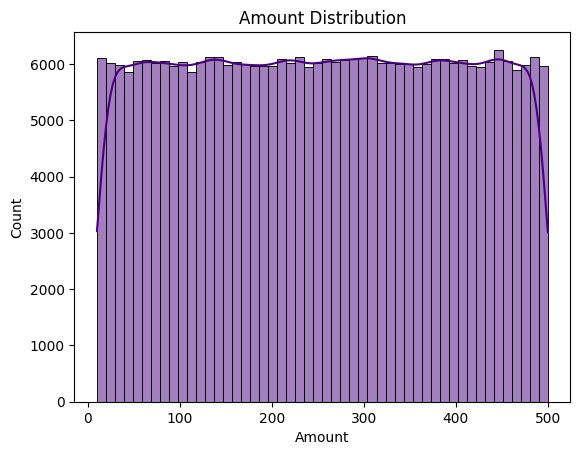



3. Central Tendency of Total_Amount:
   Mean Total_Amount: 1367.65
   Median Total_Amount: 1041.12
   Mode Total_Amount: [10.81939788, 10.98757605, 11.60189739, 11.95621897, 12.17502207, 12.37149811, 12.59661686, 13.64994403, 14.94646126, 18.54649509, 22.27872283, 22.52883592, 25.17182217, 27.0709831, 27.70418627, 28.38204458, 29.07998474, 32.14406649, 33.86899798, 33.96262411, 35.42247439, 35.80558597, 36.04416837, 37.70414783, 38.40126385, 39.90011206, 39.94677424, 40.43017841, 40.91084682, 41.31672915, 42.48705421, 42.85487676, 46.46975643, 46.63071186, 48.23482207, 51.44979907, 51.8981272, 51.89854501, 51.95143834, 52.15661824, 53.68589322, 53.76692659, 54.46204133, 58.09210787, 58.2462136, 58.93147672, 60.26955133, 60.73582177, 62.00511107, 63.40833829, 63.83728866, 64.11884934, 64.68957615, 65.77335631, 65.89657906, 66.35533051, 66.47143241, 67.73894873, 67.93795607, 69.073561, 69.32086796, 70.50443683, 71.98568195, 72.3337312, 72.85765068, 74.51977839, 75.20474106, 75.860806, 

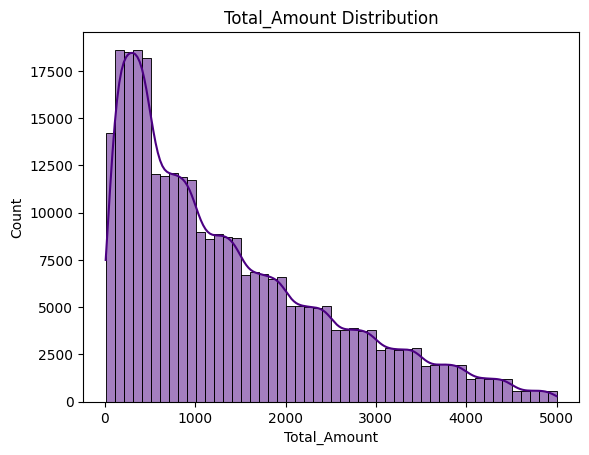

In [9]:
#Analysis of numerical variables
colsToAnalyse = ['Age','Amount','Total_Amount']
i=1
#Looping through each variable
for i, col in enumerate(colsToAnalyse):
  #Statistical analysis
    print(f"\n{i+1}. Central Tendency of {col}:")
    print(f"   Mean {col}: {df[col].mean():.2f}")
    print(f"   Median {col}: {df[col].median():.2f}")
    print(f"   Mode {col}: {df[col].mode().tolist()}")
    print(f"   Minimum {col}: {df[col].min():.2f}")
    print(f"   Maximum {col}: {df[col].max():.2f}")
    print(df[col].describe())
    print('\n'*1)
    #Skewness & Kurtosis
    print(f"   Skewness of {col}: {df[col].skew():.4f}")
    print(f"   Kurtosis of {col}: {df[col].kurtosis():.4f}")
    print('\n'*1)
    i+=1

    #Histplots
    sns.histplot(data=df, x=col, kde=True,bins=50, color='indigo', edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.xticks(rotation = 0)
    plt.grid(False)
    plt.show()
    print()

**Interpretation of plots**
*   Age: Most customers' ages lie between 18 to 26. There are two sudden spikes at 34 & 45
*   Amount:No significant variation in amount spent by customers
* Total_Amount: The plot is positively skewed.That means most customers have made smaller purchases.



**Interpretation of central tendencies**


 1. **Age**:

 .The mean Age is approximately 35.48, with a median of 32.00,ranging from 18.00 to 70.00.

 .The most frequently occuring age is 20.

 .Skewness is positive. Most individuals are younger, but there are some older individuals that stretch the distribution to the right.

 .Kurtosis is negetive.The distribution is flatter than a normal distribution.

2. **Amount and Total Amount Distribution**:

.Amount has a mean of approximately 255.16 and a median of 255.47, ranging from 10.00 to 499.99.

.Total Amount has a mean of approximately 1367.65 and a median of 1041.12, ranging from 10.00 to 4999.63.

.Skewness of amount is negetive,indicating tails towards the lower values. .Kurtosis is also negetive.The distribution is flatter than a normal distribution.

.Skewness of Total Amount is positive, A positive skew (like 0.97) means the right tail is longer. there are more values that trail off toward the higher end.

.The value of Kurtosis is slightly positive, but very close to 0. It indicates that distribution is almost normal, with just a tiny bit more concentration near the mean and slightly heavier tails than a perfect bell curve.

**Visualization of Outliers using boxplot**

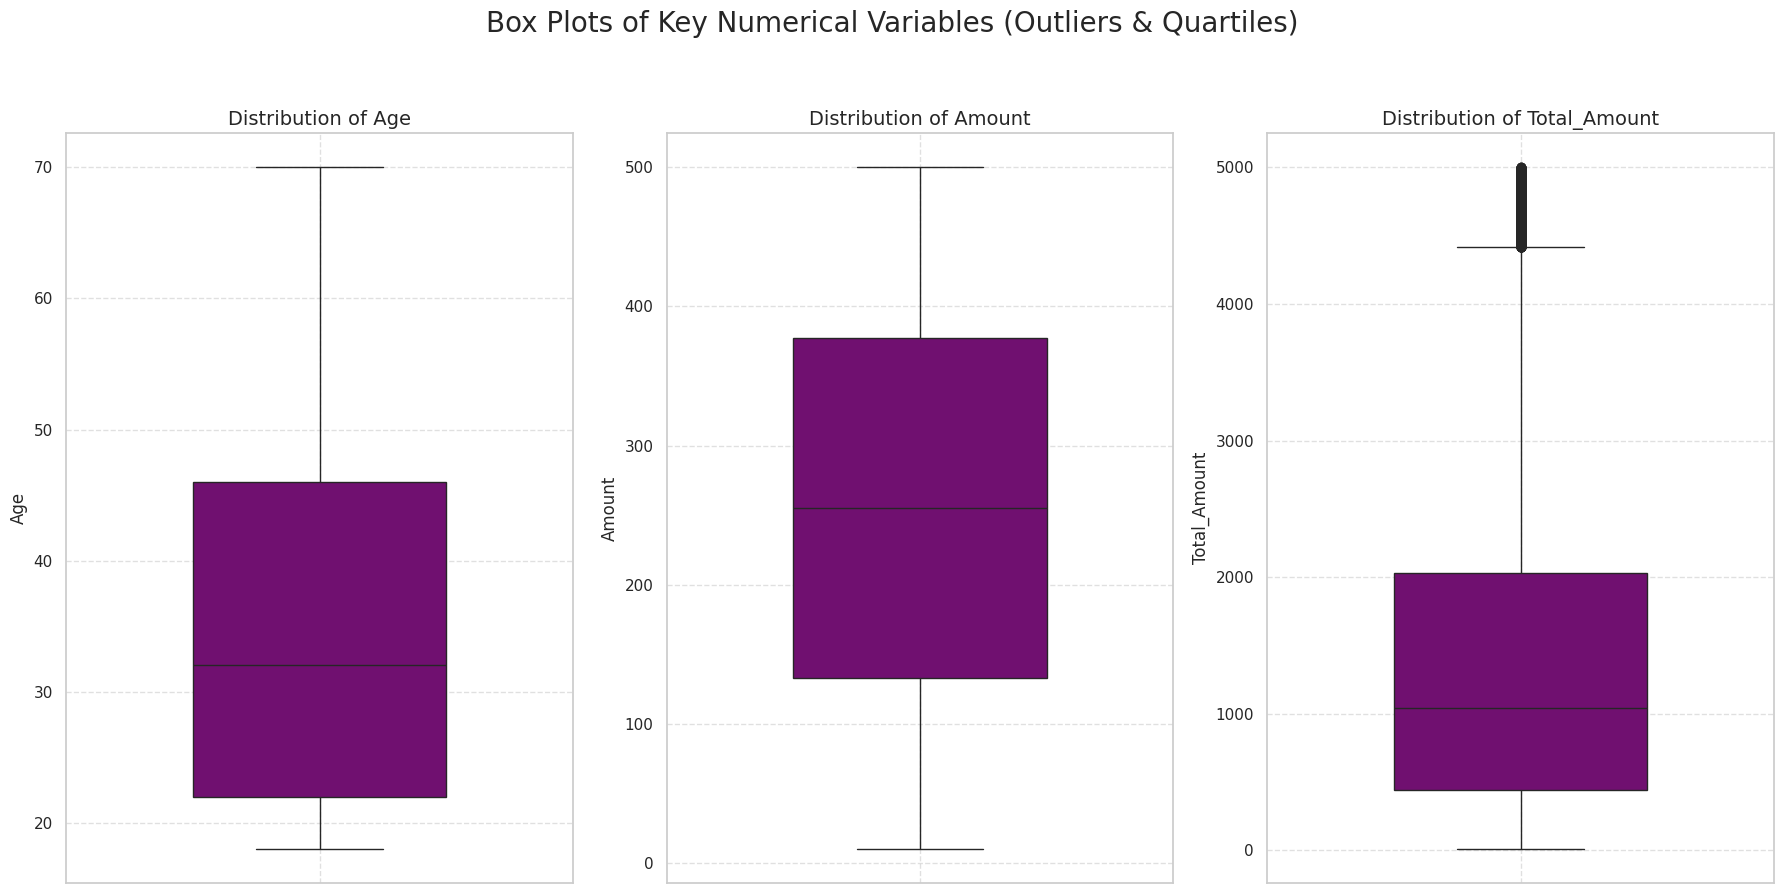

In [10]:
#Visualizing Outliers using Box Plot

# --- Define the numerical columns to plot ---

columns_to_plot = ['Age','Amount','Total_Amount']

# Set a professional plotting style
sns.set_theme(style="whitegrid")

# Create a figure and a grid of subplots (1 rows, 3 columns)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 9)) # Adjust figsize as needed
fig.suptitle('Box Plots of Key Numerical Variables (Outliers & Quartiles)', fontsize=20, y=1.02) # Main title for the entire figure
# Loop through each column and plot its box plot
for i, col in enumerate(columns_to_plot):
    # Use sns.boxplot for box plots
    sns.boxplot(data=df, y=col, ax=axes[i], color='purple', width=0.5)

    # Set title and labels for each subplot
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('') # No x-label needed as it's a single box plot
    axes[i].set_ylabel(col, fontsize=12)

    # Optional: Add grid for better readability
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # [left, bottom, right, top] for padding

# Display the plot
#plt.show()
plt.savefig("Box Plots of Key Numerical Variables.jpg")

**Interpretation**

**Age**: The median customer age is around 32, with the interquartile range (IQR) between approximately 23 and 46. There are no noticeable outliers, suggesting the majority of customers fall within this age range.

**​Amount**: The median amount per transaction is about 250, with the IQR ranging from roughly 120 to 380. The distribution is skewed slightly to the right, indicating a few larger transactions.

**​Total_Amount**: The median total amount spent by a customer is around 1000. The IQR extends from about 500 to 2000. This plot shows a significant number of outliers, represented by the individual points above the upper whisker, indicating there are several customers with very high total spending.

**5. Exploratory Data Analysis - Univariate Analysis of Categorical Variables**

**Visualization using Bar Plots (Count Plots)**

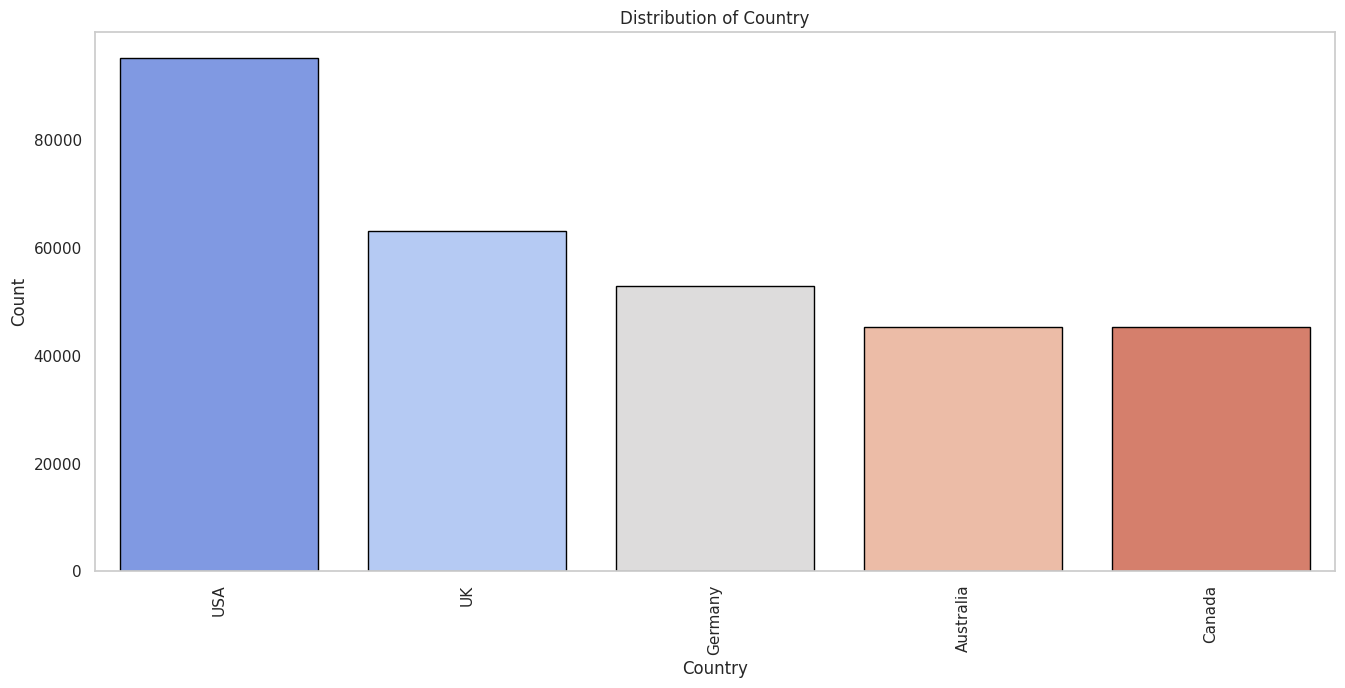

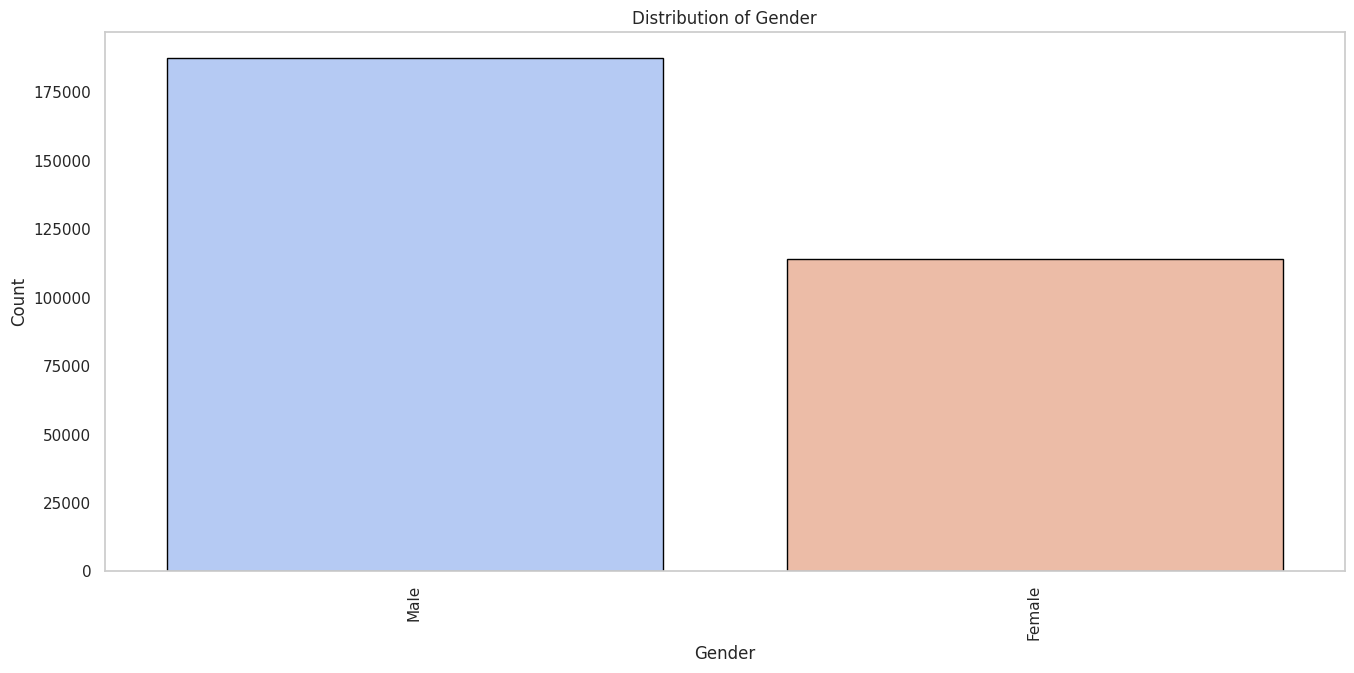

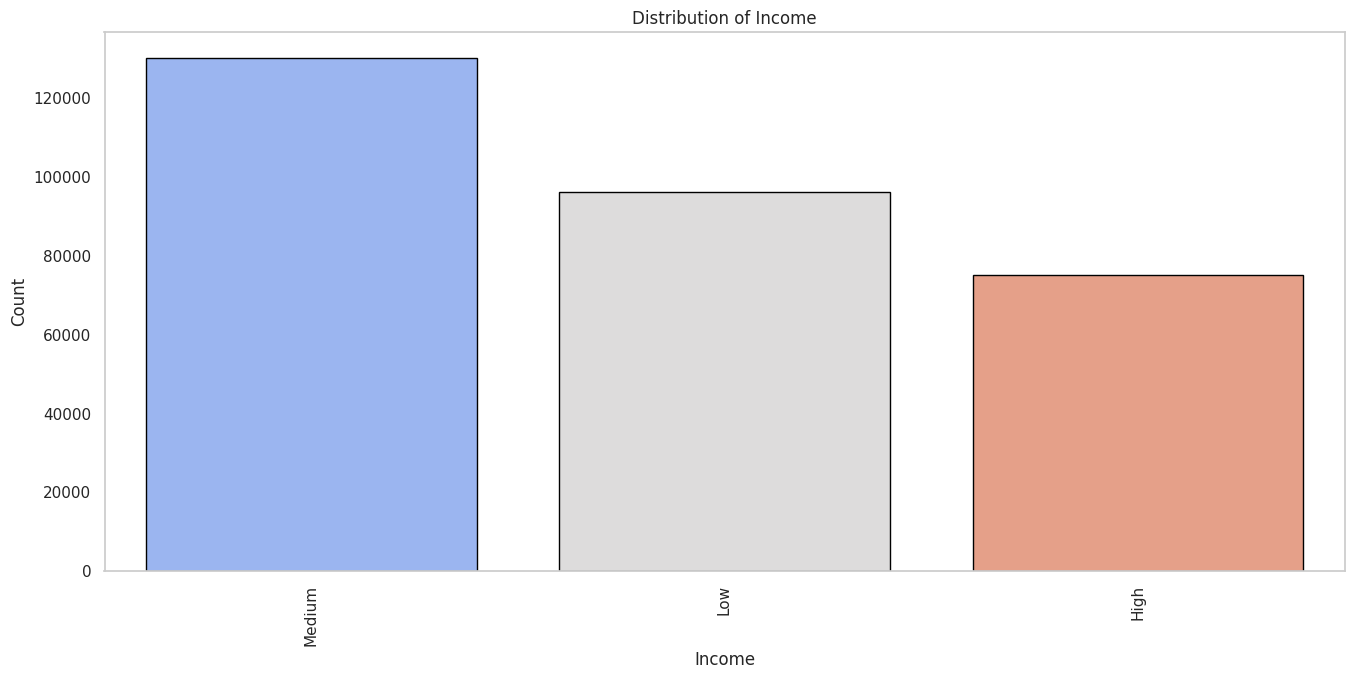

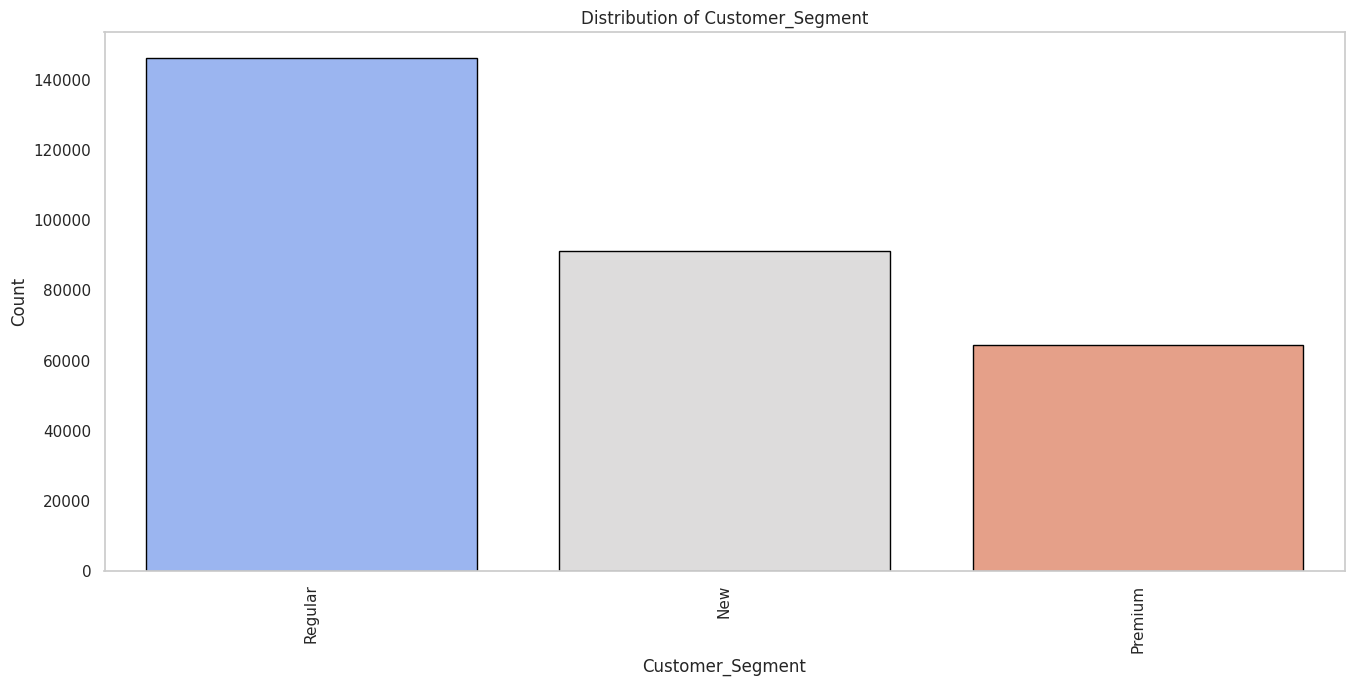

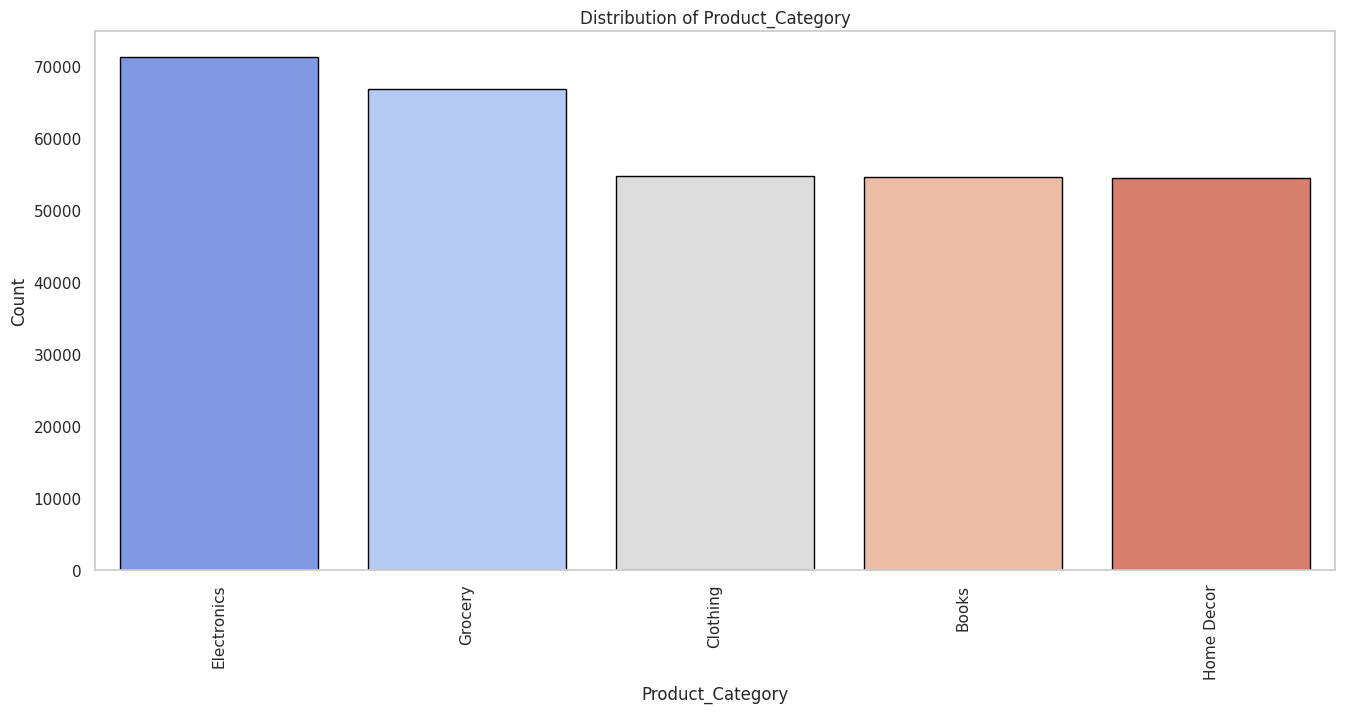

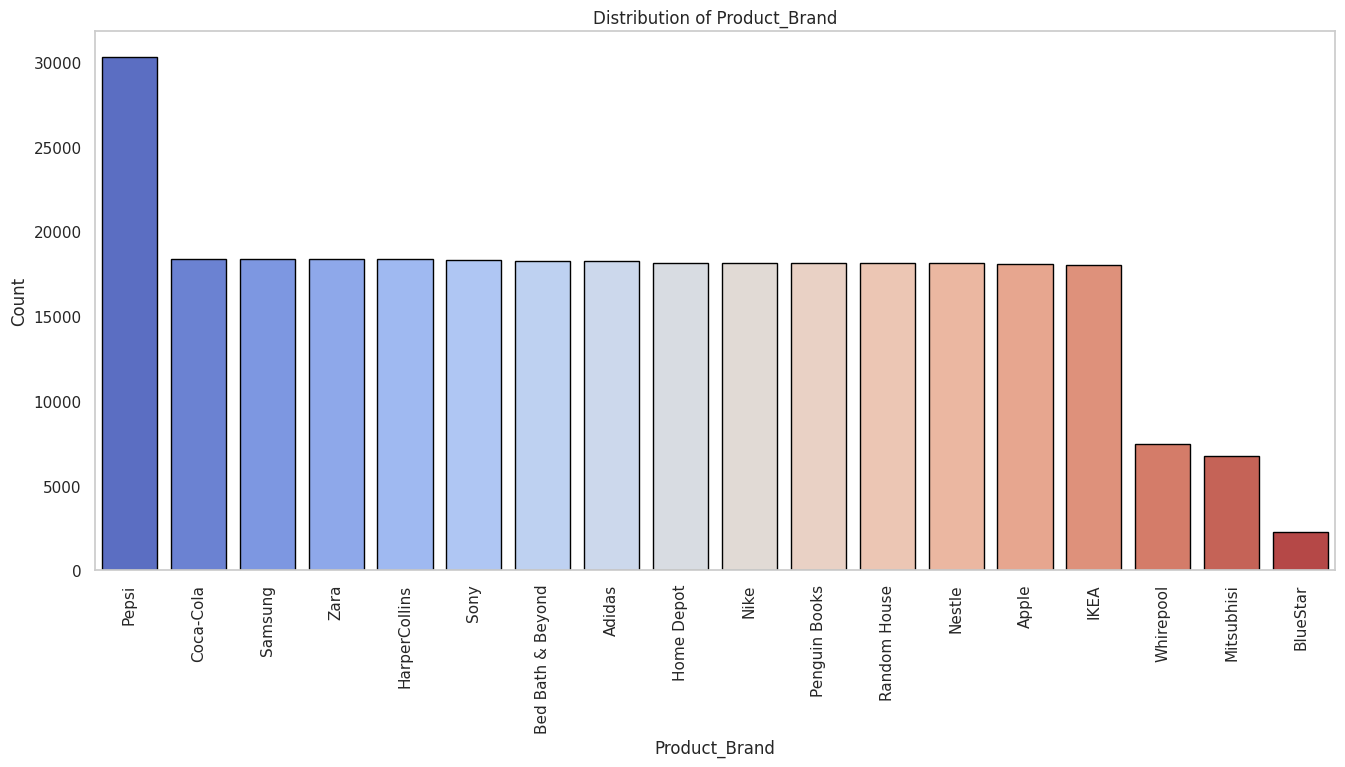

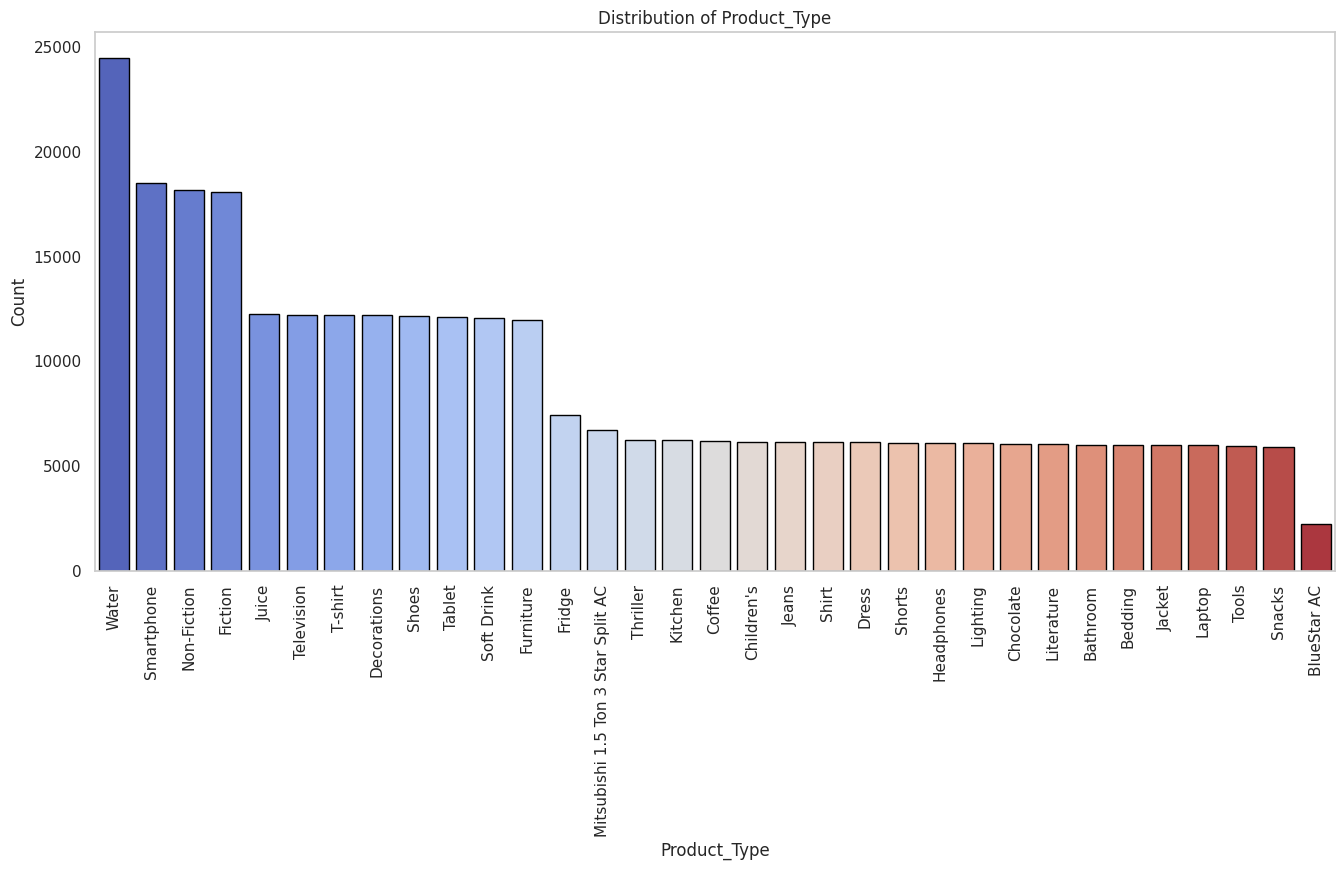

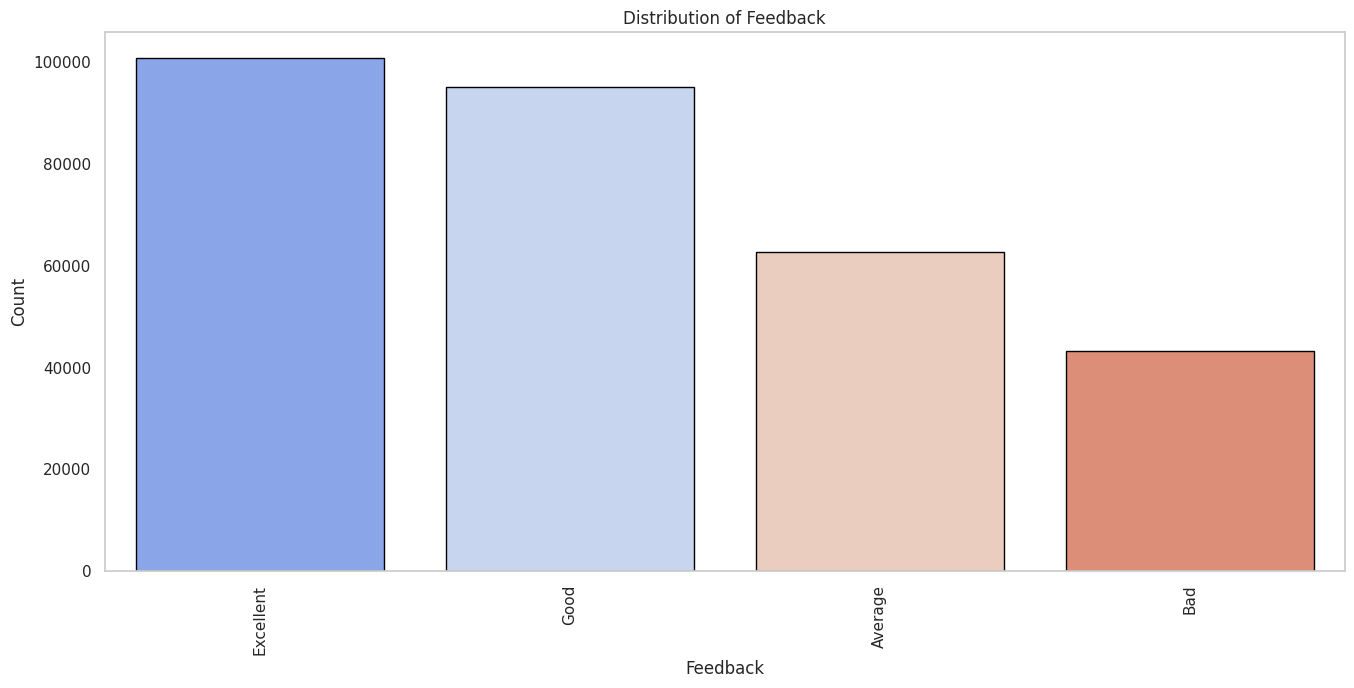

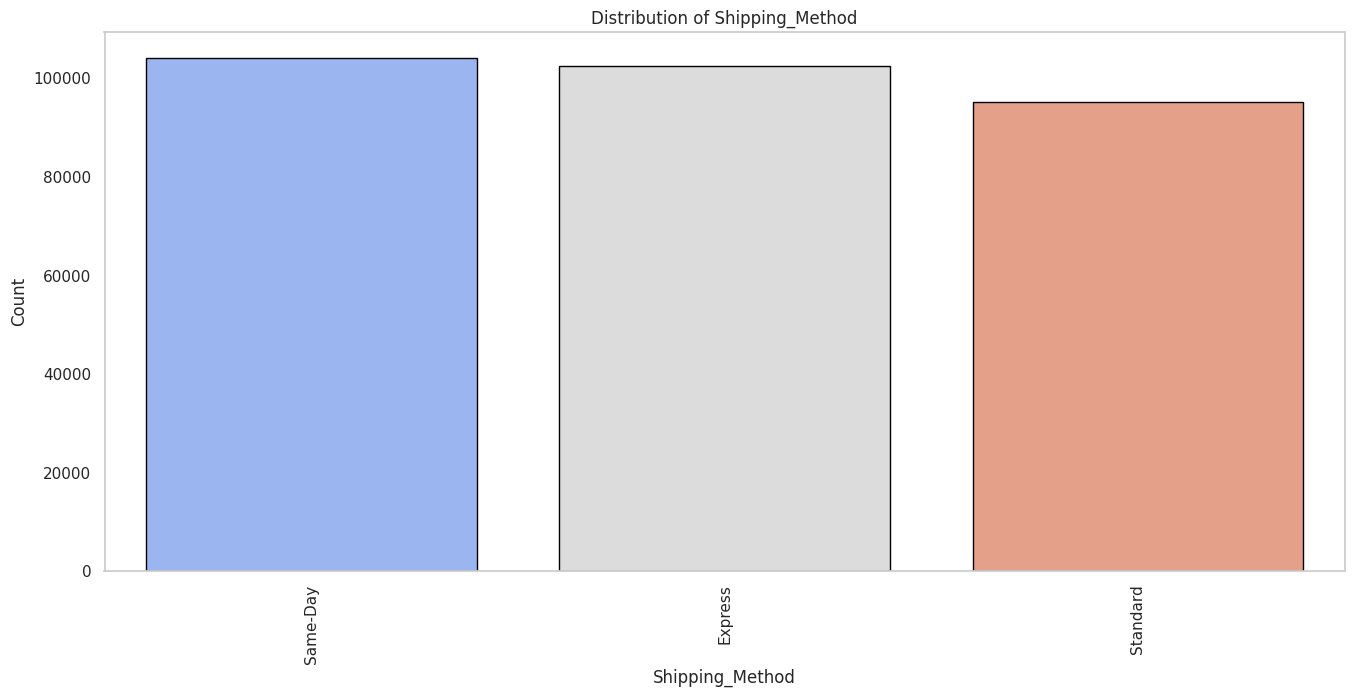

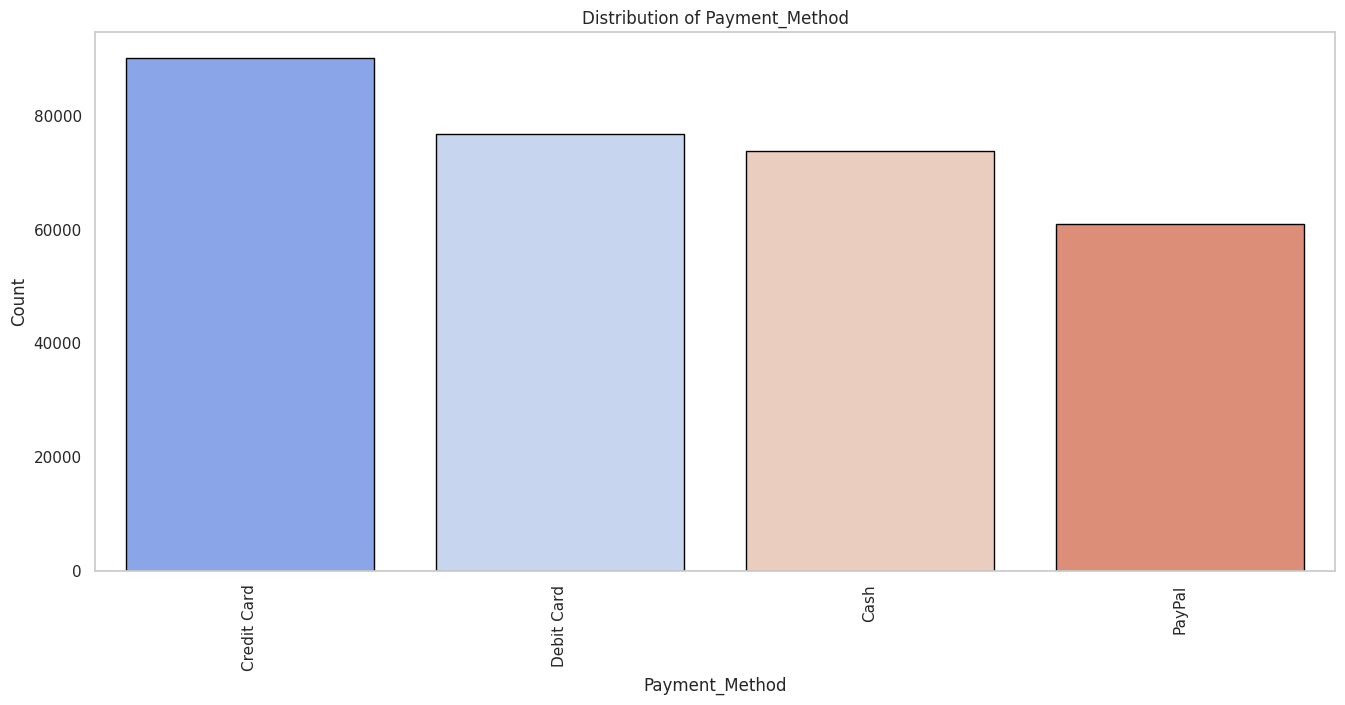

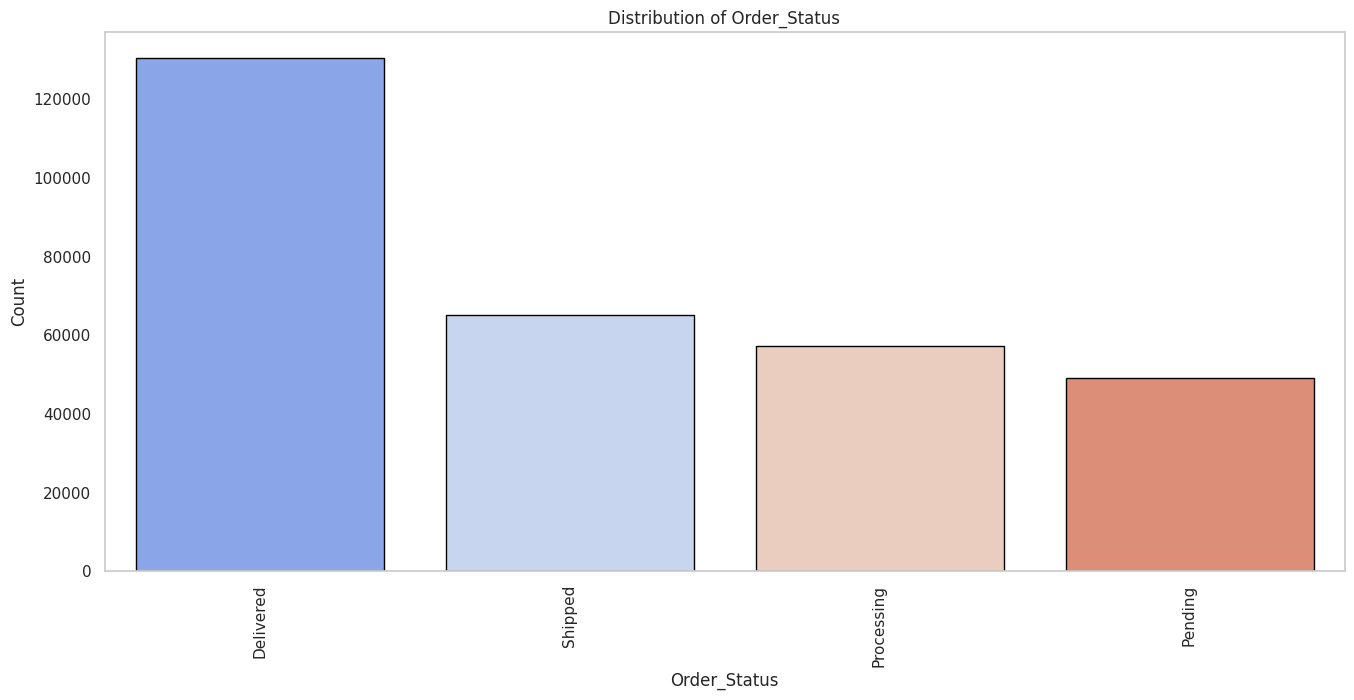

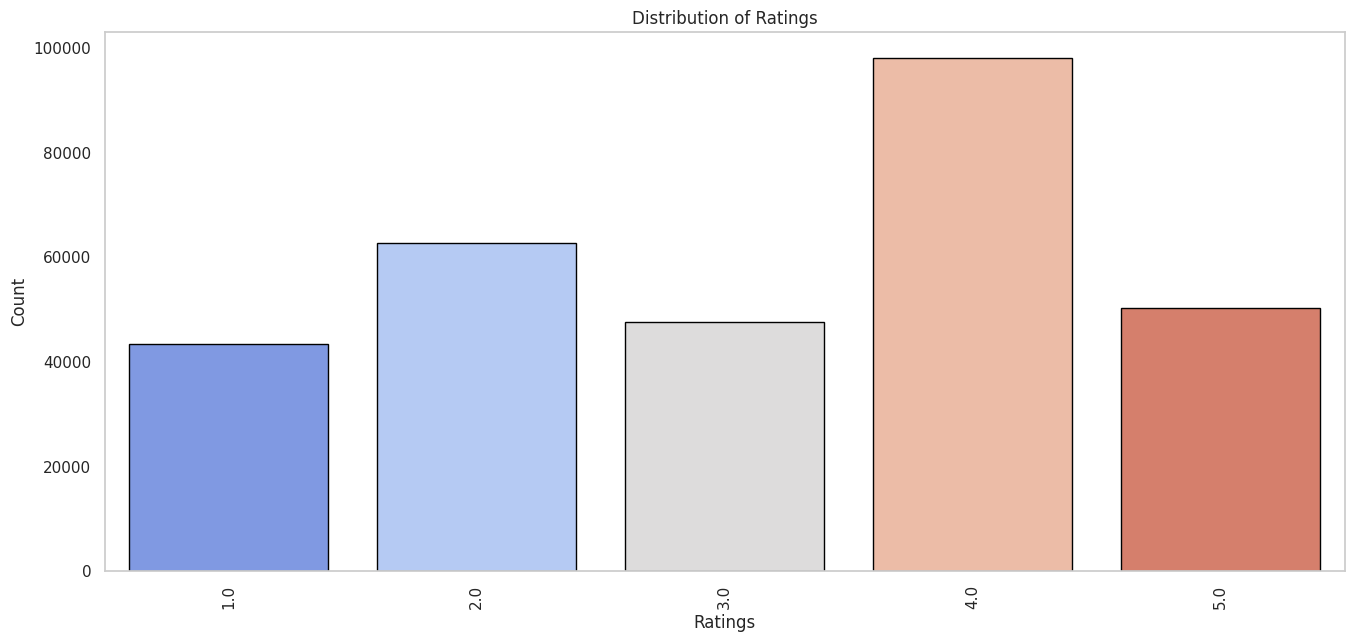

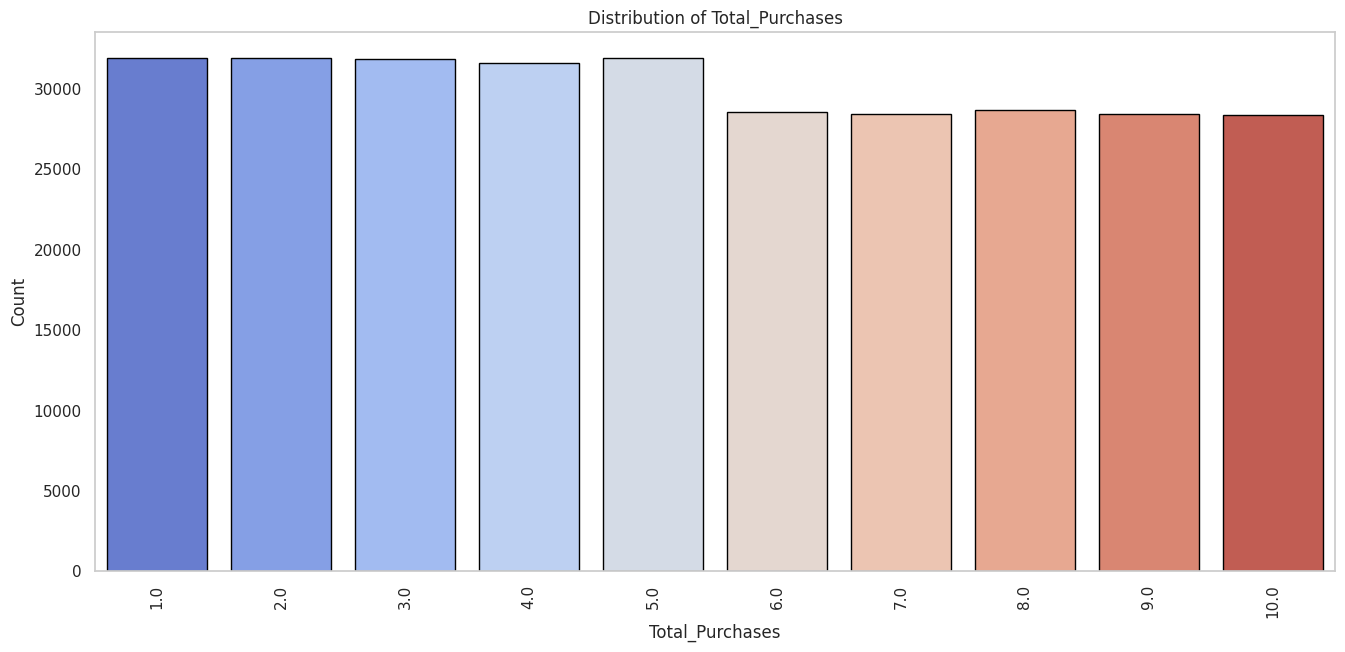

In [11]:
import warnings
warnings.filterwarnings("ignore")
colsToAnalyse = ['Country','Gender','Income','Customer_Segment','Product_Category','Product_Brand','Product_Type','Feedback','Shipping_Method','Payment_Method','Order_Status','Ratings','Total_Purchases']
i=1
#Looping through each variable
for i, col in enumerate(colsToAnalyse):
    plt.figure(figsize = (16,7))
    sns.barplot(df[col].value_counts() , palette = 'coolwarm' , edgecolor = 'black')

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.show()

**Interpretation**

**Gender:** The dataset has a higher count of male customers than female customers.

**​Income:** The majority of customers fall into the Medium income category, followed by Low and High income segments.

**​Customer Segment:** The largest customer base is the Regular segment, followed by New and Premium customers. This suggests a strong existing customer base with opportunities to grow the "New" and "Premium" segments.

**​Country**: The highest count of customers is from the USA, followed by the UK, Germany, Australia, and Canada.

**​Products and Feedback**

**​Product Brands:** Pepsi is by far the most frequently purchased brand, followed by brands like Coca-Cola, Samsung, and Zara. This indicates that drinks and electronics are dominant product areas.

​**Product Categories:** Electronics and Grocery are the most popular product categories, which aligns with the product brand distribution.

**​Product Types:** Water and Smartphones are the two most frequently purchased product types, reinforcing the popularity of groceries and electronics.

**​Feedback**: The dataset is heavily skewed towards positive feedback, with Excellent and Good feedback accounting for the vast majority of responses.

**​Transactions**

**Shipping Method:** Same-Day and Express shipping are the most frequently used methods, indicating that customers value fast delivery.

​**Payment Method:** Credit Card and Debit Card are the most common payment methods, followed by Cash and PayPal. This aligns with modern shopping trends where card payments are predominant.

**Distribution of Order Status**

​The bar chart shows that the majority of orders have been successfully Delivered. This is followed by orders that have been Shipped, then those Processing, and finally a smaller number of orders that are Pending. This is a healthy distribution, as it indicates a high rate of successful order fulfillment.

**​Distribution of Ratings**

​This plot reveals that the most common rating is a 4.0, followed by a 2.0, and then a 5.0. The number of ratings decreases for 1.0, and 3.0. This indicates a general trend towards positive ratings, with the majority of customers giving a good (4.0) or perfect (5.0) score, but a significant portion also providing lower ratings (2.0 and 1.0).

**​Distribution of Total Purchases**

​This plot shows the count of transactions for customers with a different number of total purchases, from 1 to 10. The count of transactions is fairly uniform for customers with 1 to 5 total purchases, hovering around 30,000 transactions each. The count then begins to decline for customers with 6 or more total purchases. This suggests that a significant portion of the customer base consists of new or infrequent buyers, with a smaller group of highly loyal, repeat customers.

**Quantitative analysis**

In [12]:
#List of categorical variables to analyse
categorical_val=['Country','Gender','Income','Customer_Segment','Product_Category','Product_Brand','Product_Type','Feedback','Shipping_Method','Payment_Method','Order_Status','products','Ratings','Total_Purchases']
print("--- Univariate Analysis of Categorical Columns ---")
#Looping through each variable
i=1
for var in categorical_val:
    print(f"{i}. Analysing {var}:")
    print(f"Number of Unique Values of {var}: {df[var].nunique()}")
    print(f"\nFrequency of {var}:")
    print(df[var].value_counts(dropna=False))
    print(f"\nPercentage distribution of {var}:")
    print(df[var].value_counts(normalize=True) * 100)
    print("=="*20+"\n")
    i+=1

--- Univariate Analysis of Categorical Columns ---
1. Analysing Country:
Number of Unique Values of Country: 5

Frequency of Country:
Country
USA          95223
UK           63066
Germany      52830
Australia    45319
Canada       45301
NaN            271
Name: count, dtype: int64

Percentage distribution of Country:
Country
USA          31.558068
UK           20.900845
Germany      17.508509
Australia    15.019272
Canada       15.013306
Name: proportion, dtype: float64

2. Analysing Gender:
Number of Unique Values of Gender: 2

Frequency of Gender:
Gender
Male      187599
Female    114094
NaN          317
Name: count, dtype: int64

Percentage distribution of Gender:
Gender
Male      62.182086
Female    37.817914
Name: proportion, dtype: float64

3. Analysing Income:
Number of Unique Values of Income: 3

Frequency of Income:
Income
Medium    130230
Low        96261
High       75229
NaN          290
Name: count, dtype: int64

Percentage distribution of Income:
Income
Medium    43.162535

**Visualization using Donut chart**

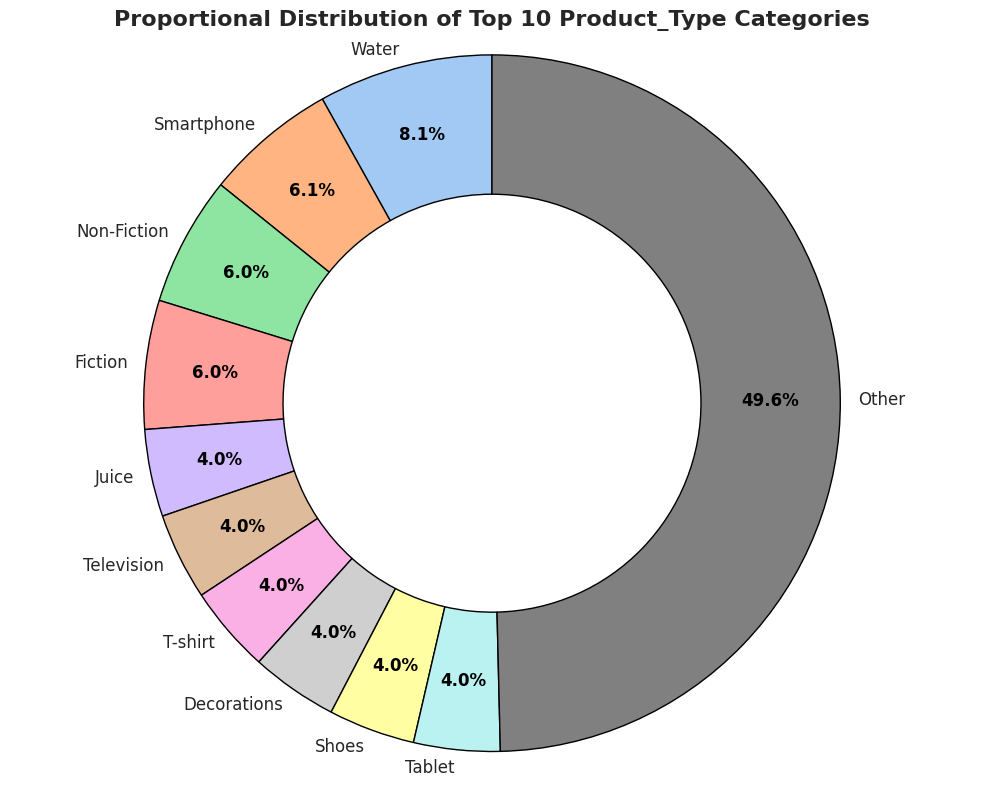

In [13]:
# Define the utility function

def plot_categorical_donut(dataframe, column_name, n_categories=5, figsize=(10, 10)):
    """
    Generates and displays a donut chart for the top N categories of a specified column.

    Parameters:
    dataframe (pd.DataFrame): The input DataFrame.
    column_name (str): The name of the categorical column to plot.
    n_categories (int): The number of top categories to display explicitly.
                        Remaining categories will be grouped into 'Other'.
    figsize (tuple): A tuple (width, height) for the figure size.
    """
    if column_name not in dataframe.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    # Calculate value counts
    counts = dataframe[column_name].value_counts()

    # Prepare data for plotting: select top N and sum the rest into 'Other'
    if len(counts) > n_categories:
        top_n = counts.head(n_categories)
        other_sum = counts.iloc[n_categories:].sum()
        if other_sum > 0:
            plot_data = pd.concat([top_n, pd.Series({'Other': other_sum})])
        else:
            plot_data = top_n
    else:
        plot_data = counts

    # Define colors
    colors = sns.color_palette('pastel', n_colors=len(plot_data))
    if 'Other' in plot_data.index:
        colors = sns.color_palette('pastel', n_colors=len(plot_data) - 1) + ['gray'] # Distinct color for 'Other'

    # Create figure and axis for the plot
    fig, ax = plt.subplots(figsize=figsize)

    # Plotting the donut chart
    wedges, texts, autotexts = ax.pie(
        plot_data,
        labels=plot_data.index,
        autopct='%1.1f%%',       # Format percentages
        startangle=90,           # Start at the top
        colors=colors,
        pctdistance=0.8,         # Position of percentage labels (closer to center of donut hole)
        labeldistance=1.05,      # Position of category labels (outside the donut)
        wedgeprops=dict(width=0.4, edgecolor='black', linewidth=1) # Donut hole via width
    )

    # Customize percentage labels
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(12)
        autotext.set_fontweight('bold')

    # Customize category labels
    for text in texts:
        text.set_fontsize(12)

    # Set title
    ax.set_title(f'Proportional Distribution of Top {n_categories} {column_name} Categories', fontsize=16, fontweight='bold')
    ax.axis('equal') # Ensure circle

    plt.tight_layout()
    plt.show()
plot_categorical_donut(df, 'Product_Type', n_categories=10, figsize=(10,8))

**Interpretation**

**Product Proportions**

**​Proportional Distribution of Top 10 Product_Type Categories:**

The largest proportion of sales by product type comes from a wide variety of items grouped under "Other," which accounts for nearly half (49.6%) of the total. Among the top 10 specific categories, Water is the most sold product type (8.1%), followed by Smartphones (6.1%) and then Non-Fiction and Fiction books, both at 6.0%. This suggests that while there are a few leading product types, the retailer's sales are highly diversified.


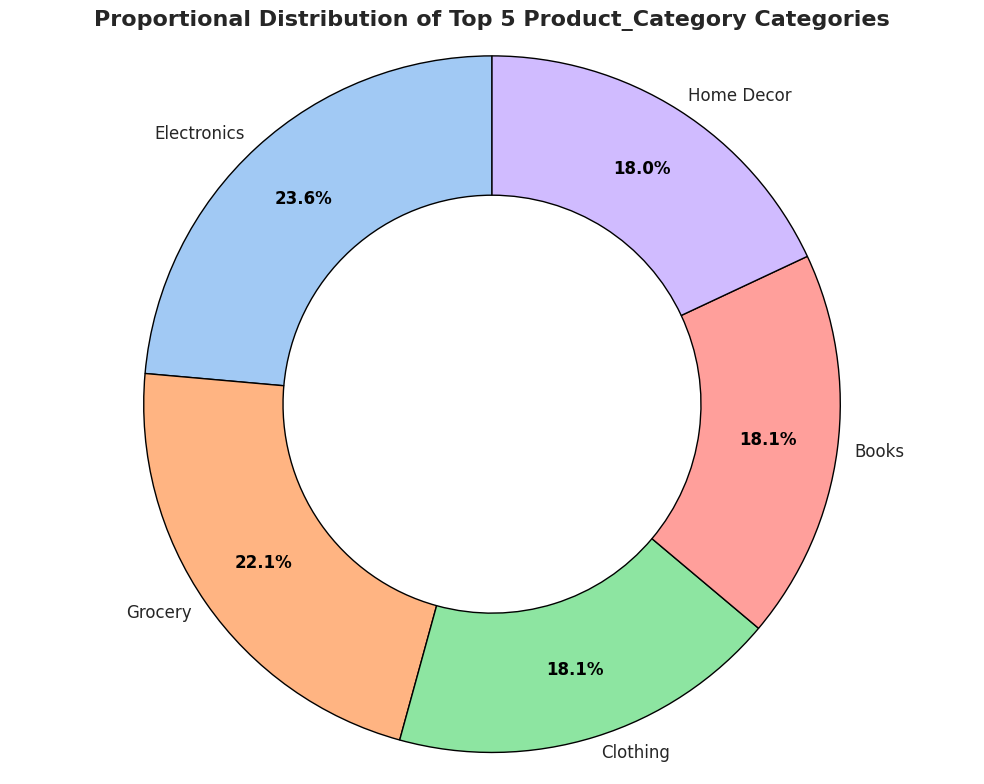

In [14]:
plot_categorical_donut(df, 'Product_Category', n_categories=5 , figsize=(10,8))

**Interpretation**


**Proportional Distribution of Top 5 Product Categories:**

 This plot shows a more balanced distribution across the major product categories. Electronics lead with 23.6% of the sales, followed closely by Grocery at 22.1%. Books and Clothing both contribute 18.1%, and Home Decor accounts for 18.0%. This indicates that the store does not rely on a single dominant product category.


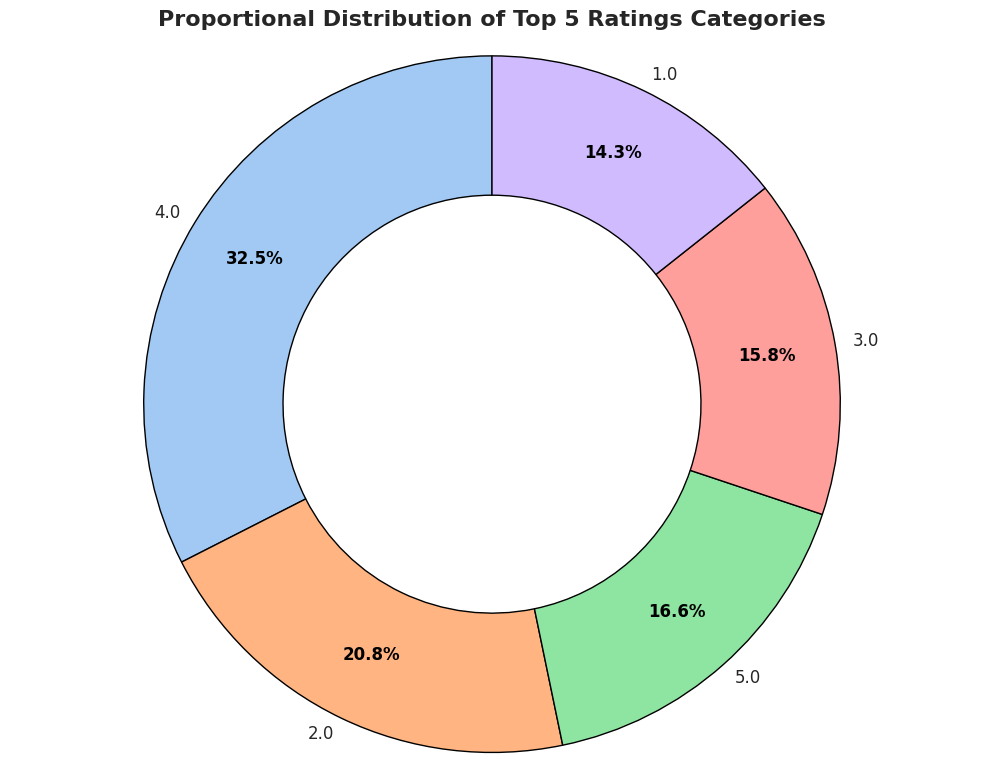

In [15]:
plot_categorical_donut(df, 'Ratings', n_categories=5 , figsize=(10,8))

**Interpretation**

**Proportional Distribution of Top 5 Ratings Categories:**

 The most frequent rating is a 4.0, accounting for 32.5% of all ratings. A significant portion of ratings are also 2.0 (20.8%) and 5.0 (16.6%), suggesting a mixed customer experience but with a strong inclination toward positive ratings. The high number of 4.0 and 5.0 ratings aligns with the positive feedback distribution.



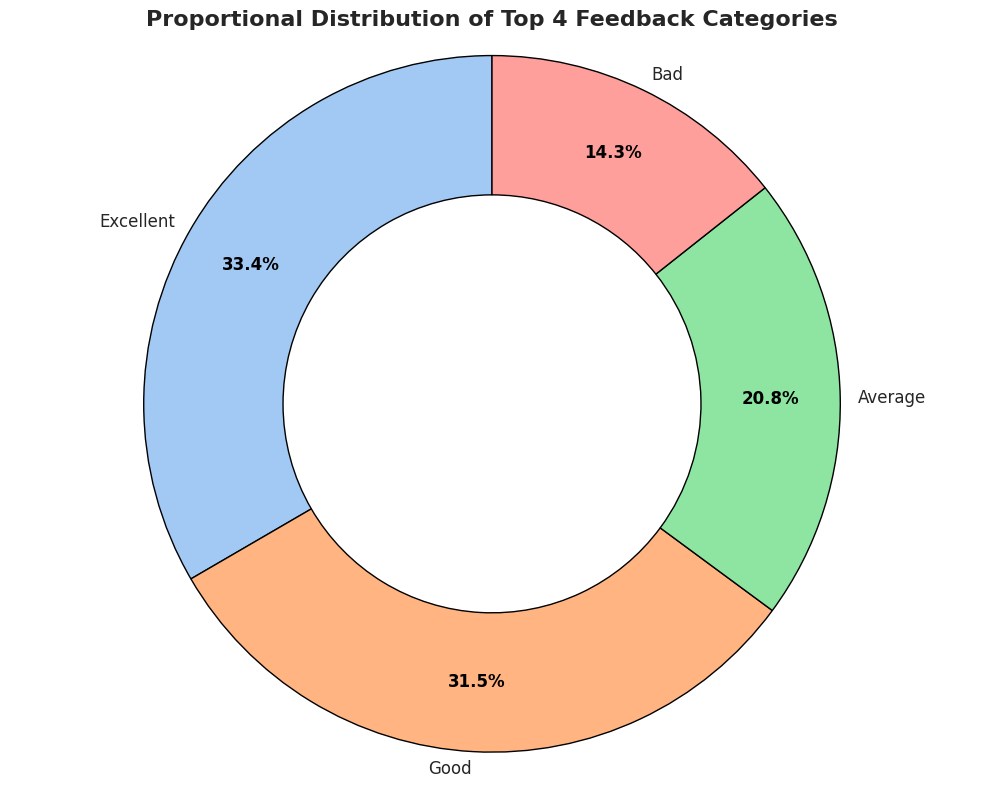

In [16]:
plot_categorical_donut(df, 'Feedback', n_categories=4, figsize=(10,8))

**Interpretation**

**Proportional Distribution of Top 4 Feedback Categories:**

The store receives a high proportion of positive feedback, with Excellent and Good feedback making up the majority at 33.4% and 31.5% respectively. This means that nearly two-thirds of the feedback received is positive.

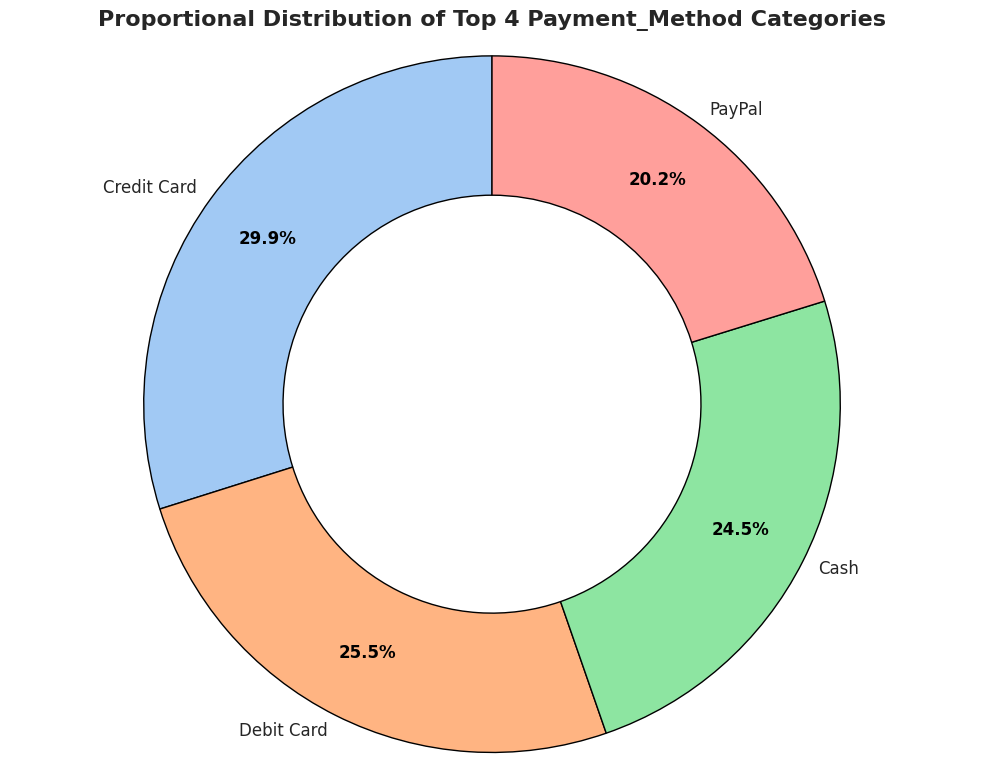

In [17]:
plot_categorical_donut(df, 'Payment_Method', n_categories=4 , figsize=(10,8))

**Interpretation**

**Proportional Distribution of Top 4 Payment_Method Categories:**

 Credit Card is the most popular payment method, used in nearly 30% of transactions (29.9%). It's followed by Debit Card (25.5%), Cash (24.5%), and PayPal (20.2%). This shows that electronic payment methods, particularly cards, are the preferred choice for customers.

**6. Exploratory Data Analysis - Univariate Analysis of Temporal variables**

**Determining the Range of the Dataset**

In [18]:
# --- 1. What is the date range of the dataset? ---
print("--- 1. Date Range of the Dataset ---")
min_date = df['Date'].min()
max_date = df['Date'].max()

print(f"  Start Date: {min_date.strftime('%Y-%m-%d')}")
print(f"  End Date:   {max_date.strftime('%Y-%m-%d')}")

--- 1. Date Range of the Dataset ---
  Start Date: 2023-03-01
  End Date:   2024-02-29


**Timeseries visualization**

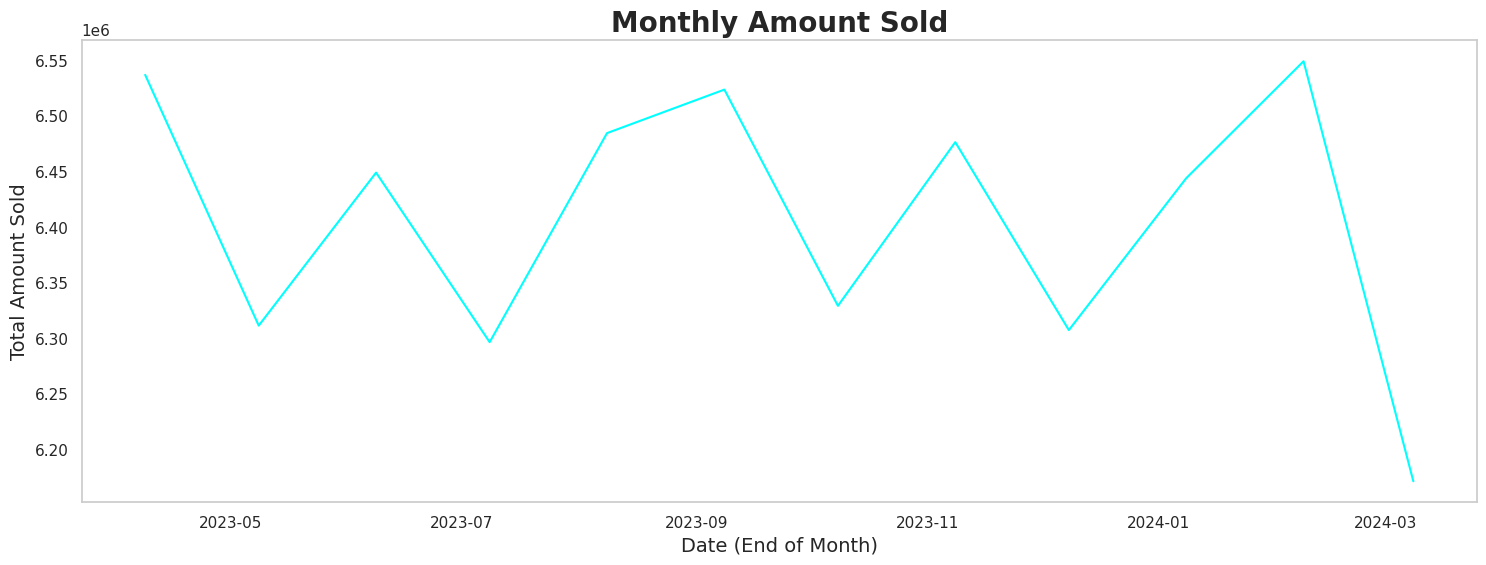

In [19]:
# --- Prepare data for Monthly Amount sold  ---
# Set 'Date' as index, resample by 'M' (month end) and sum 'Units'.
# .reset_index() converts the aggregated Series back into a DataFrame
# with 'Date' as a regular column.
monthly_Amount_summary = df.set_index('Date')['Amount'].resample('M').sum().reset_index()


# --- Plotting Monthly Amount Sold ---
plt.figure(figsize=(18, 6))

sns.lineplot(
    x='Date',
    y='Amount',
    data=monthly_Amount_summary, # Use the monthly aggregated data
    color='cyan',
    linewidth=1.5
)

plt.title('Monthly Amount Sold', fontsize=20, fontweight='bold')
plt.xlabel('Date (End of Month)', fontsize=14) # Changed label to reflect monthly aggregation
plt.ylabel('Total Amount Sold', fontsize=14) # Changed label to reflect total amount sold
plt.xticks(rotation=0, ha='right')
plt.grid(False) # Added grid for time series readability
plt.show()

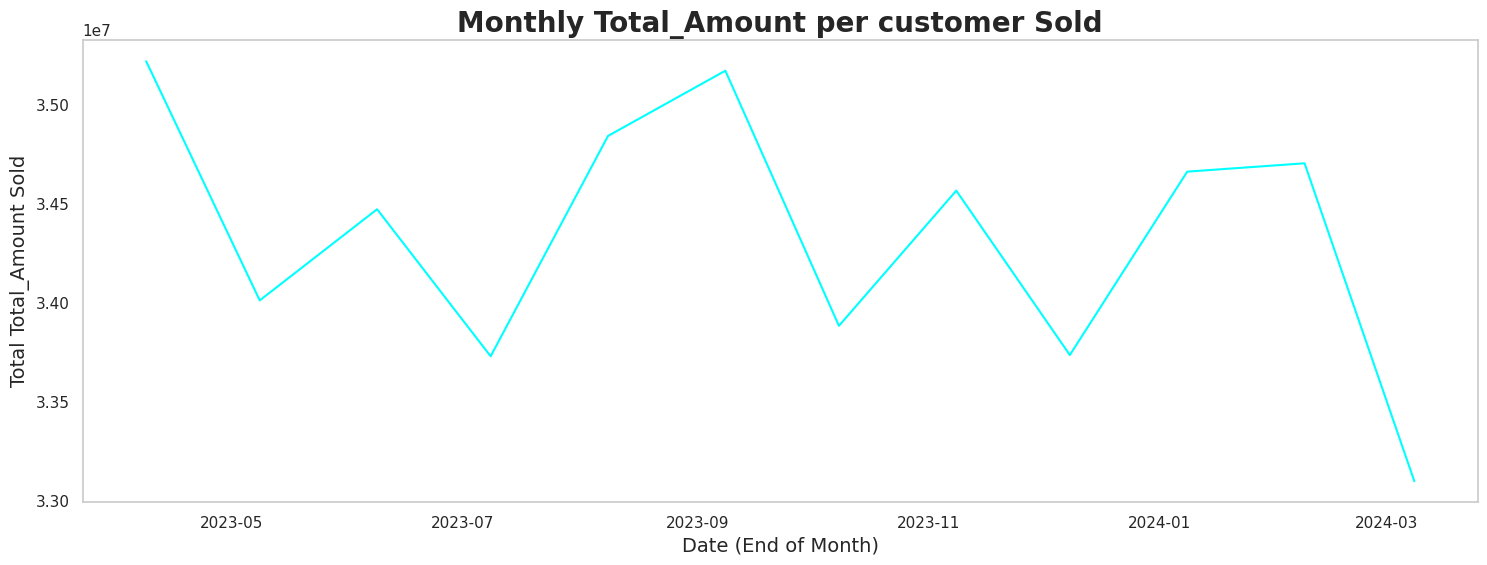

In [20]:
# --- Prepare data for Monthly Total_Amount sold  ---
# Set 'Date' as index, resample by 'M' (month end) and sum 'Units'.
# .reset_index() converts the aggregated Series back into a DataFrame
# with 'Date' as a regular column.
monthly_Total_Amount_summary = df.set_index('Date')['Total_Amount'].resample('M').sum().reset_index()


# --- Plotting Monthly Total_Amount Sold ---
plt.figure(figsize=(18, 6))

sns.lineplot(
    x='Date',
    y='Total_Amount',
    data=monthly_Total_Amount_summary, # Use the monthly aggregated data
    color='cyan',
    linewidth=1.5
)

plt.title('Monthly Total_Amount per customer Sold', fontsize=20, fontweight='bold')
plt.xlabel('Date (End of Month)', fontsize=14) # Changed label to reflect monthly aggregation
plt.ylabel('Total Total_Amount Sold', fontsize=14) # Changed label to reflect total total_amount sold
plt.xticks(rotation=0, ha='right')
plt.grid(False) # Added grid for time series readability
plt.show()

**Interpretation**

**Time-Series Analysis**

​The plot "Monthly Total_Amount Sold" shows fluctuations in sales over time, but with a general upward trend. There appear to be sales peaks around June and September 2023, and again in January 2024. The plot "Monthly Total_Amount per customer Sold" displays similar patterns but on a different scale, reinforcing that the overall sales volume is influenced by the amount sold per customer. This indicates seasonality or other cyclical factors affecting total sales.



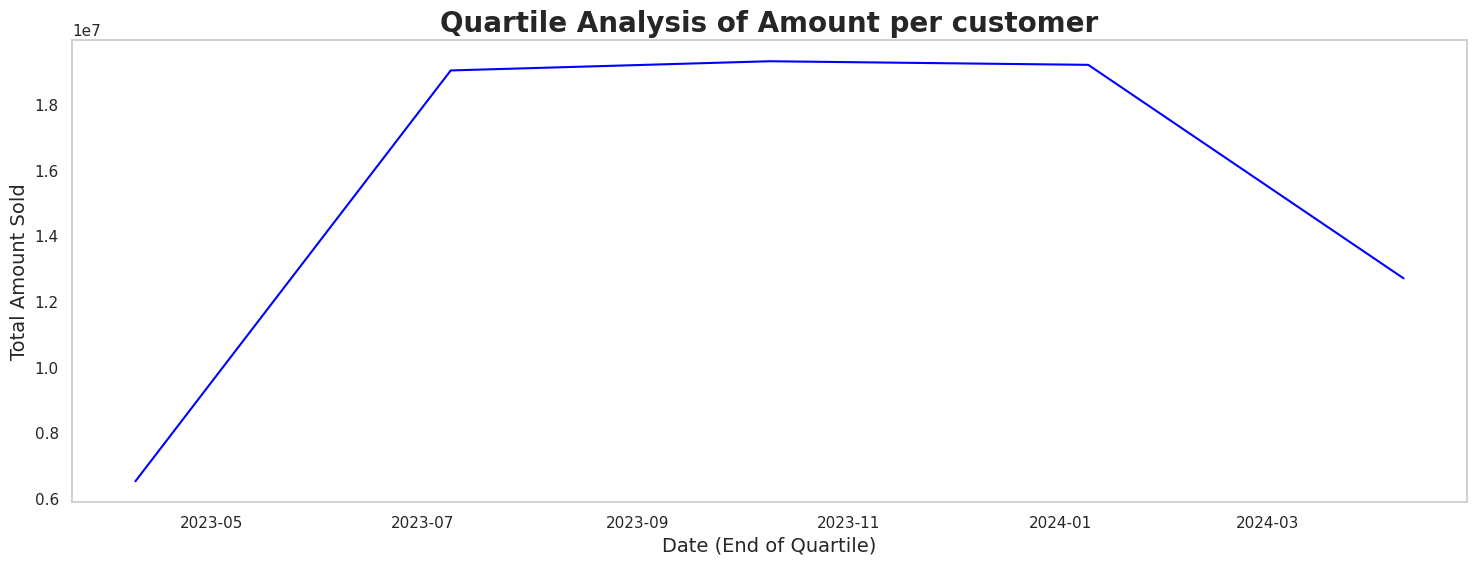

In [21]:
# --- Prepare data for Quartile Amount sold  ---
# Set 'Date' as index, resample by 'Q' (End of quartile) and sum 'Units'.
# .reset_index() converts the aggregated Series back into a DataFrame
# with 'Date' as a regular column.
monthly_Amount_summary = df.set_index('Date')['Amount'].resample('Q').sum().reset_index()


# --- Plotting Quartile Amount Sold ---
plt.figure(figsize=(18, 6))

sns.lineplot(
    x='Date',
    y='Amount',
    data=monthly_Amount_summary, # Use the monthly aggregated data
    color='Blue',
    linewidth=1.5
)

plt.title('Quartile Analysis of Amount per customer', fontsize=20, fontweight='bold')
plt.xlabel('Date (End of Quartile)', fontsize=14) # Changed label to reflect monthly aggregation
plt.ylabel('Total Amount Sold', fontsize=14) # Changed label to reflect total Amount sold
plt.xticks(rotation=0, ha='right')
plt.grid(False) # Added grid for time series readability
plt.show()

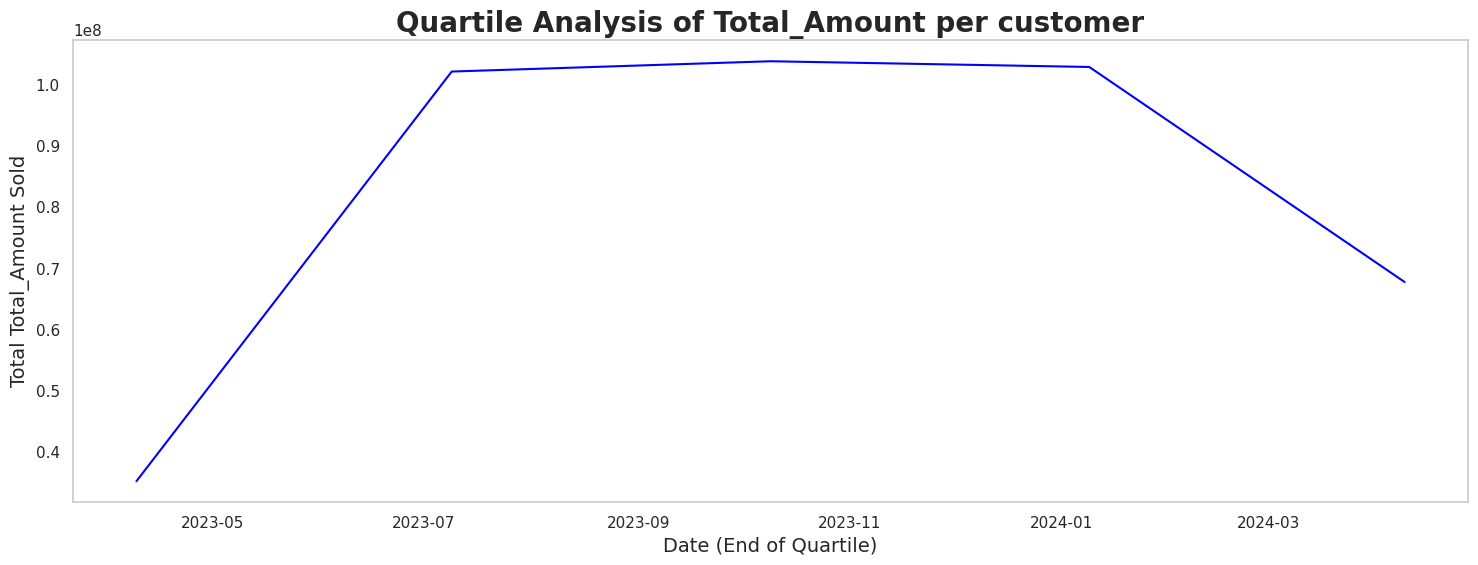

In [22]:
# --- Prepare data for Quartile Total_Amount sold  ---
# Set 'Date' as index, resample by 'Q' (end of Quartile) and sum 'Units'.
# .reset_index() converts the aggregated Series back into a DataFrame
# with 'Date' as a regular column.
monthly_Total_Amount_summary = df.set_index('Date')['Total_Amount'].resample('Q').sum().reset_index()


# --- Plotting Quartile Total_Amount Sold ---
plt.figure(figsize=(18, 6))

sns.lineplot(
    x='Date',
    y='Total_Amount',
    data=monthly_Total_Amount_summary, # Use the monthly aggregated data
    color='Blue',
    linewidth=1.5
)

plt.title('Quartile Analysis of Total_Amount per customer', fontsize=20, fontweight='bold')
plt.xlabel('Date (End of Quartile)', fontsize=14) # Changed label to reflect monthly aggregation
plt.ylabel('Total Total_Amount Sold', fontsize=14) # Changed label to reflect total total_amounts sold
plt.xticks(rotation=0, ha='right')
plt.grid(False) # Added grid for time series readability
plt.show()

**Interpretation**

**Quartile Analysis**

​The plots "Quartile Analysis of Amount per customer" and "Quartile Analysis of Total_Amount per customer" both show similar trends. The amount spent per customer and the total amount sold increased significantly from the beginning of 2023 to the third quarter of 2023, reaching a peak. Following this peak, there was a steady decline in sales into 2024. The plots show that the first three quarters of 2023 were a period of strong growth, while the later quarters saw a downturn.

**Bivariate Analysis**

**7. Bivariate analysis - Numerical Vs Numerical variable**

In [23]:
df2 = df.groupby('Age')['Amount'].mean()
df2.head()

Age
18.0    254.813782
19.0    253.780300
20.0    255.522997
21.0    255.327352
22.0    255.526765
Name: Amount, dtype: float64

**Plotting Average Amount vs Age**

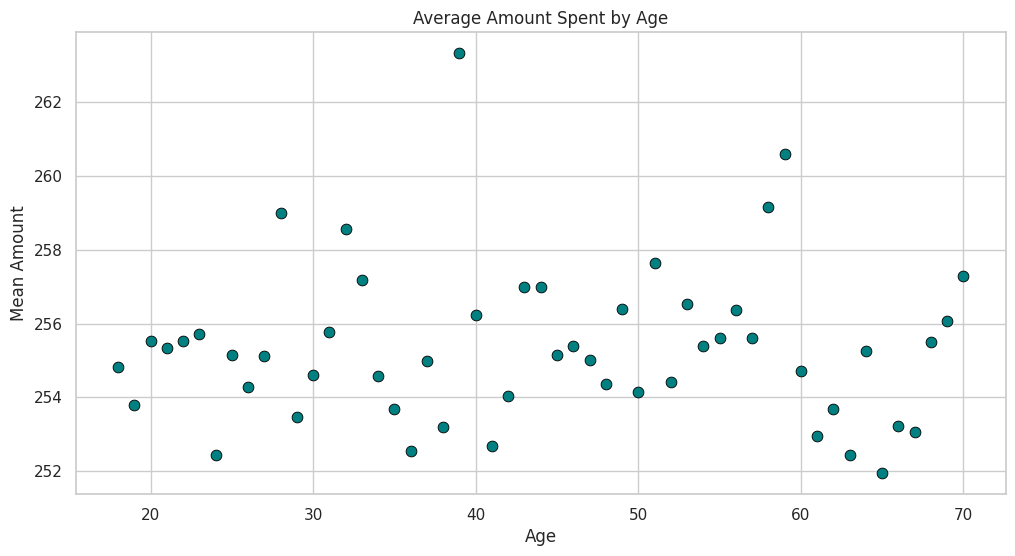

In [24]:
plt.figure(figsize=(12, 6))

# Scatter plot of mean Amount vs Age
sns.scatterplot(data=df2.reset_index(), x='Age', y='Amount', color='teal', s=60, edgecolor='black')

plt.title('Average Amount Spent by Age')
plt.xlabel('Age')
plt.ylabel('Mean Amount')
plt.grid(True)
plt.show()


**Interpretation**

**Average amount spent per age:**

The scatter plot shows the relationship between customer age and the average amount they spend. The plot indicates that there is no clear linear correlation between the two variables. While the average amount spent generally hovers between $252 and \$260 for most age groups, there is a notable spike in spending for customers around the age of 40, who on average spend the most. There are also smaller peaks in spending around the ages of 28, and 58, but overall, spending is fairly consistent across different age brackets

**8. Bivariate analysis - Numerical Vs Categorical variable**

**Distribution of Average Amount across Categorical Variables**

--- Univariate Analysis of Categorical Columns ---
1. Analysing Average Amount per Country:


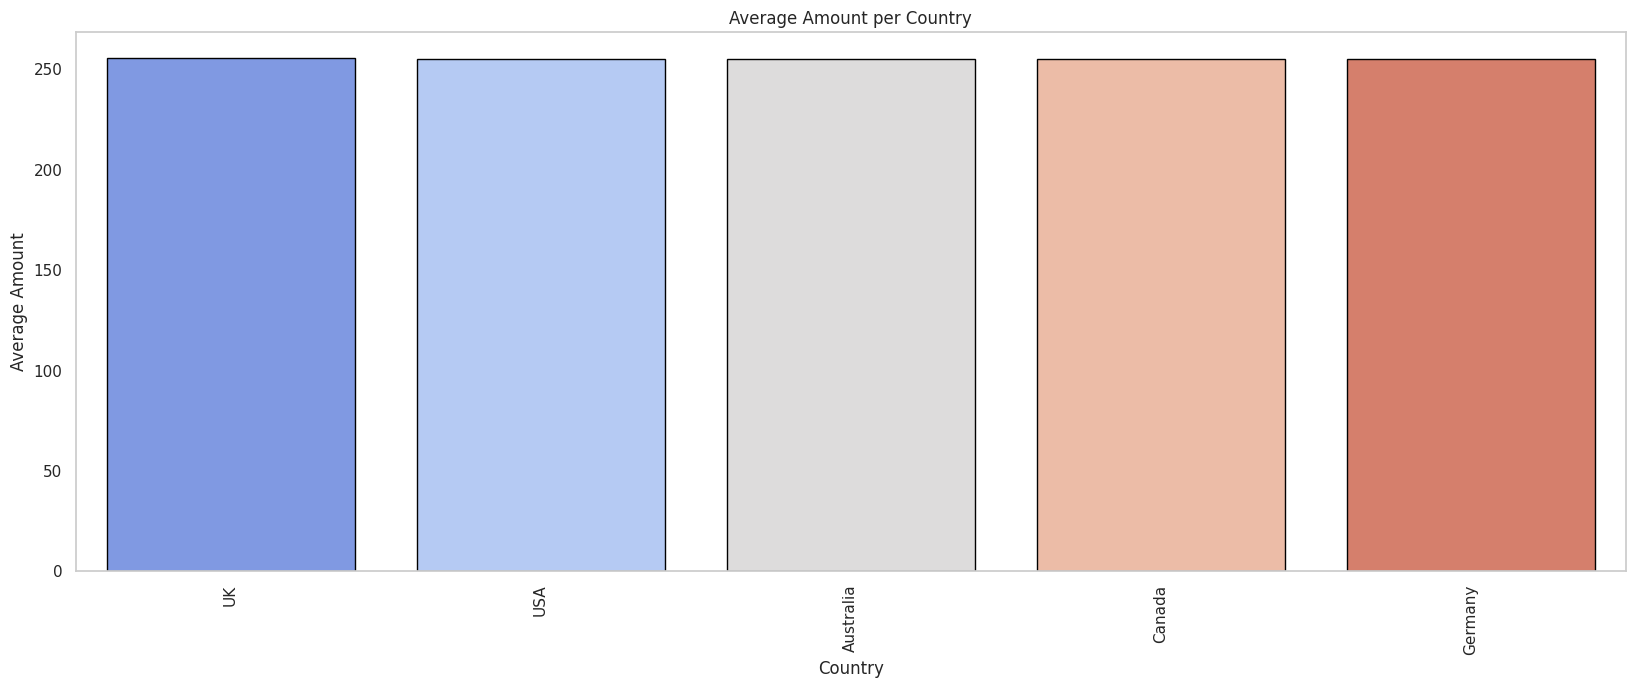

2. Analysing Average Amount per Gender:


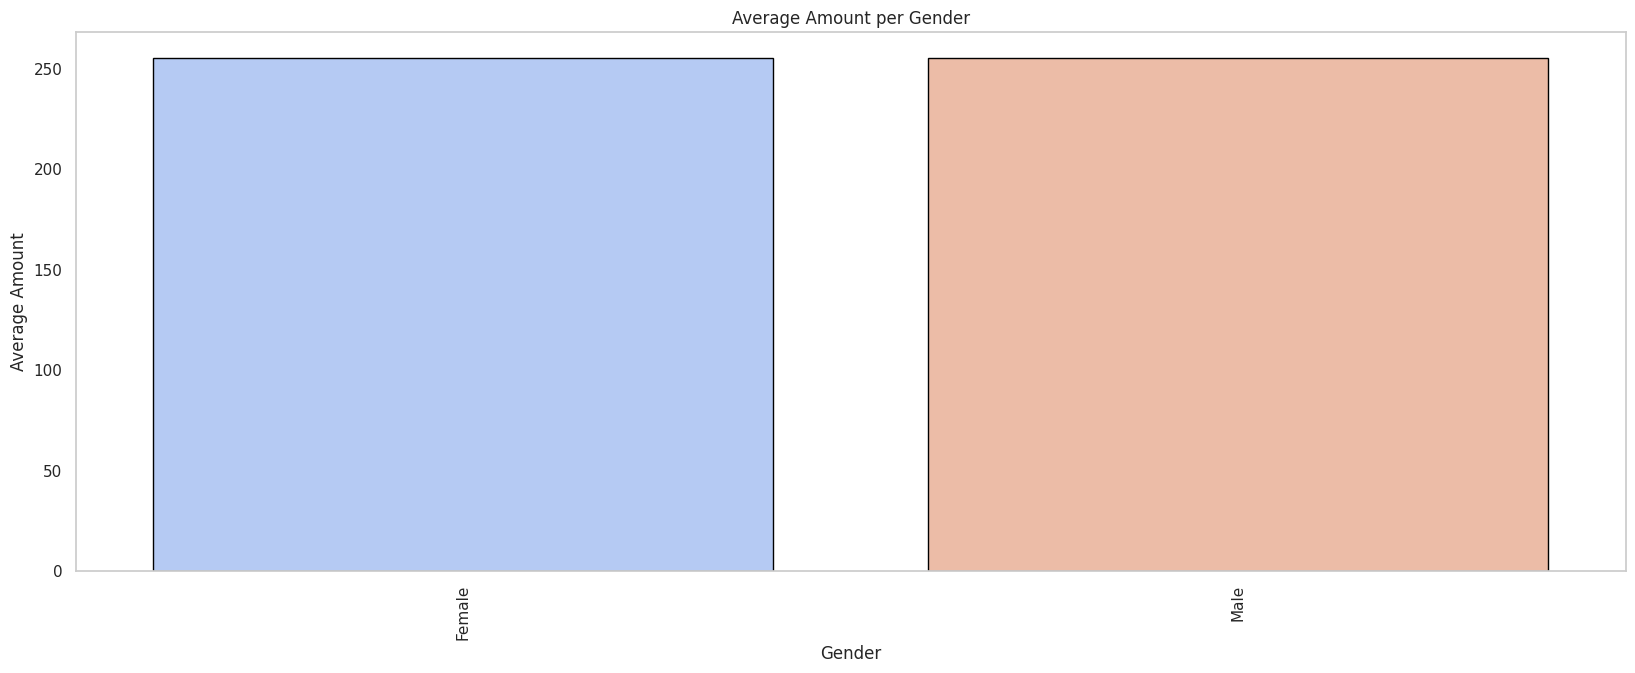

3. Analysing Average Amount per Income:


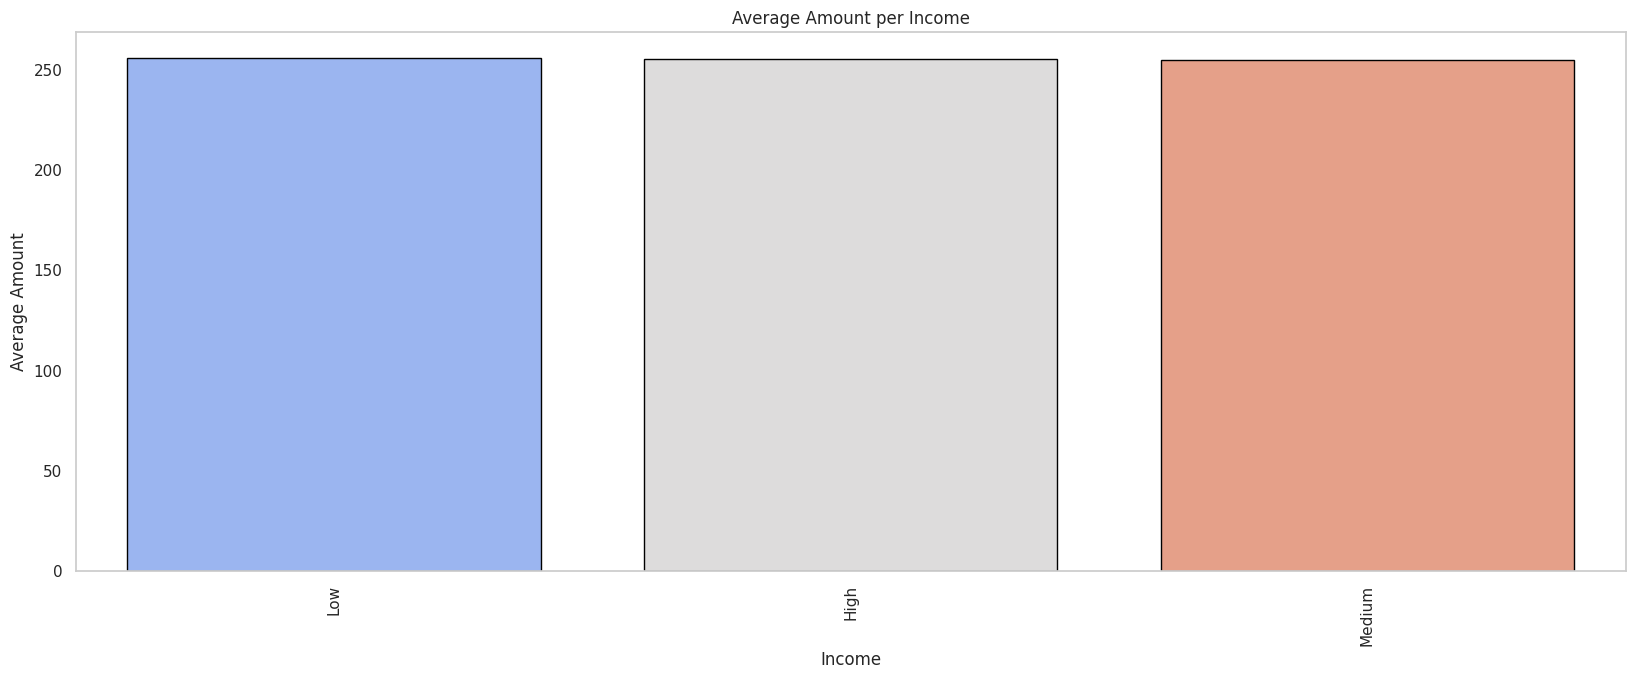

4. Analysing Average Amount per Customer_Segment:


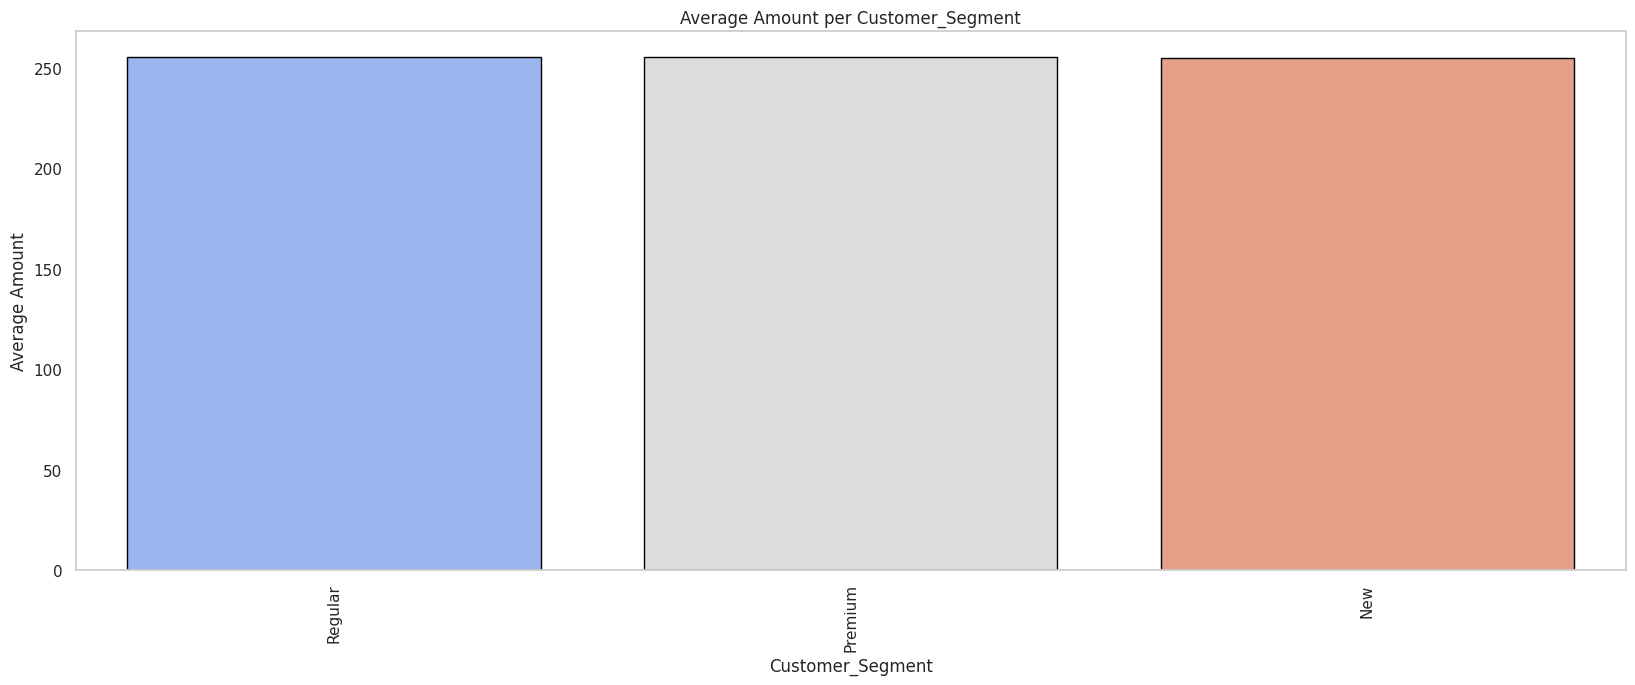

5. Analysing Average Amount per Product_Category:


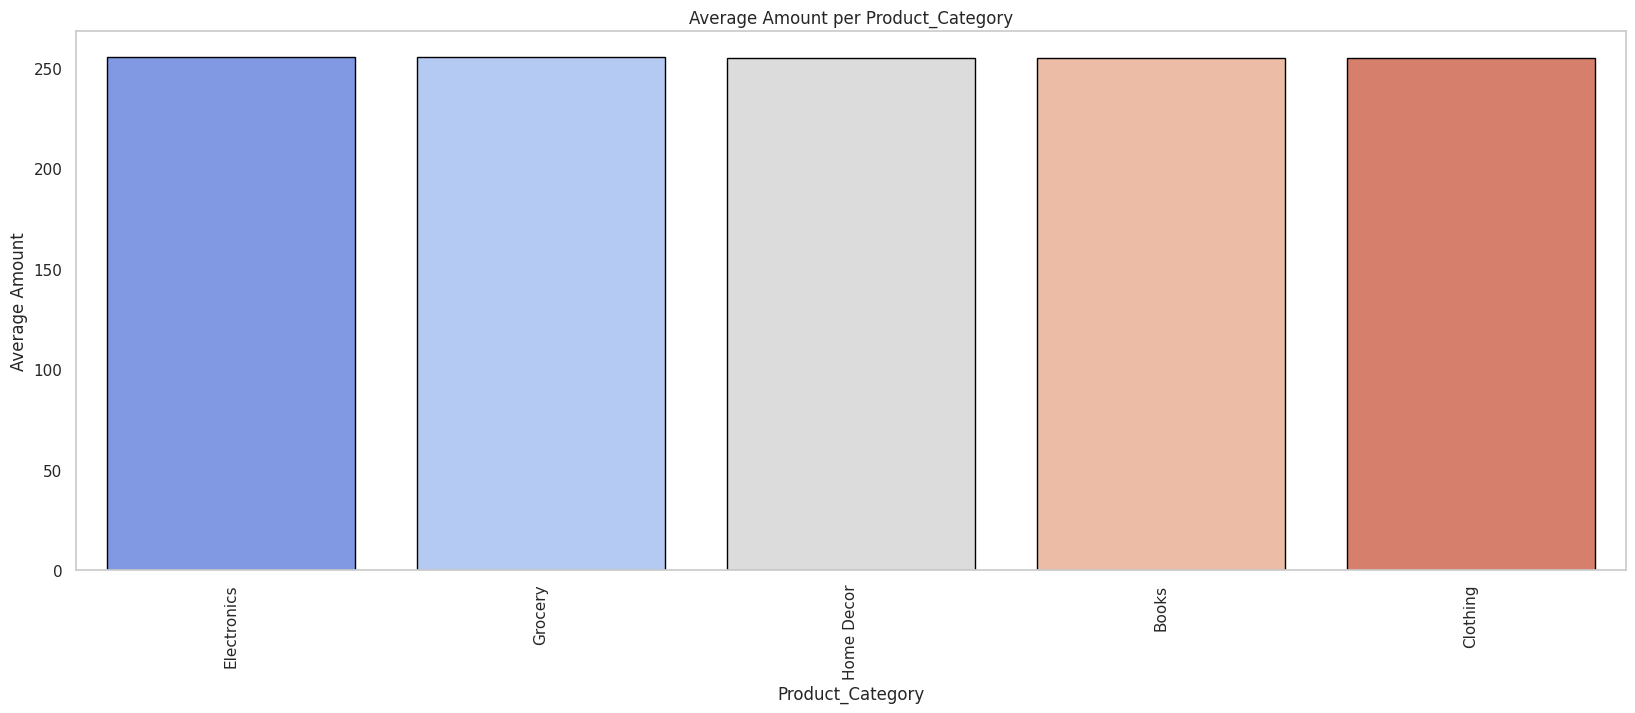

6. Analysing Average Amount per Product_Brand:


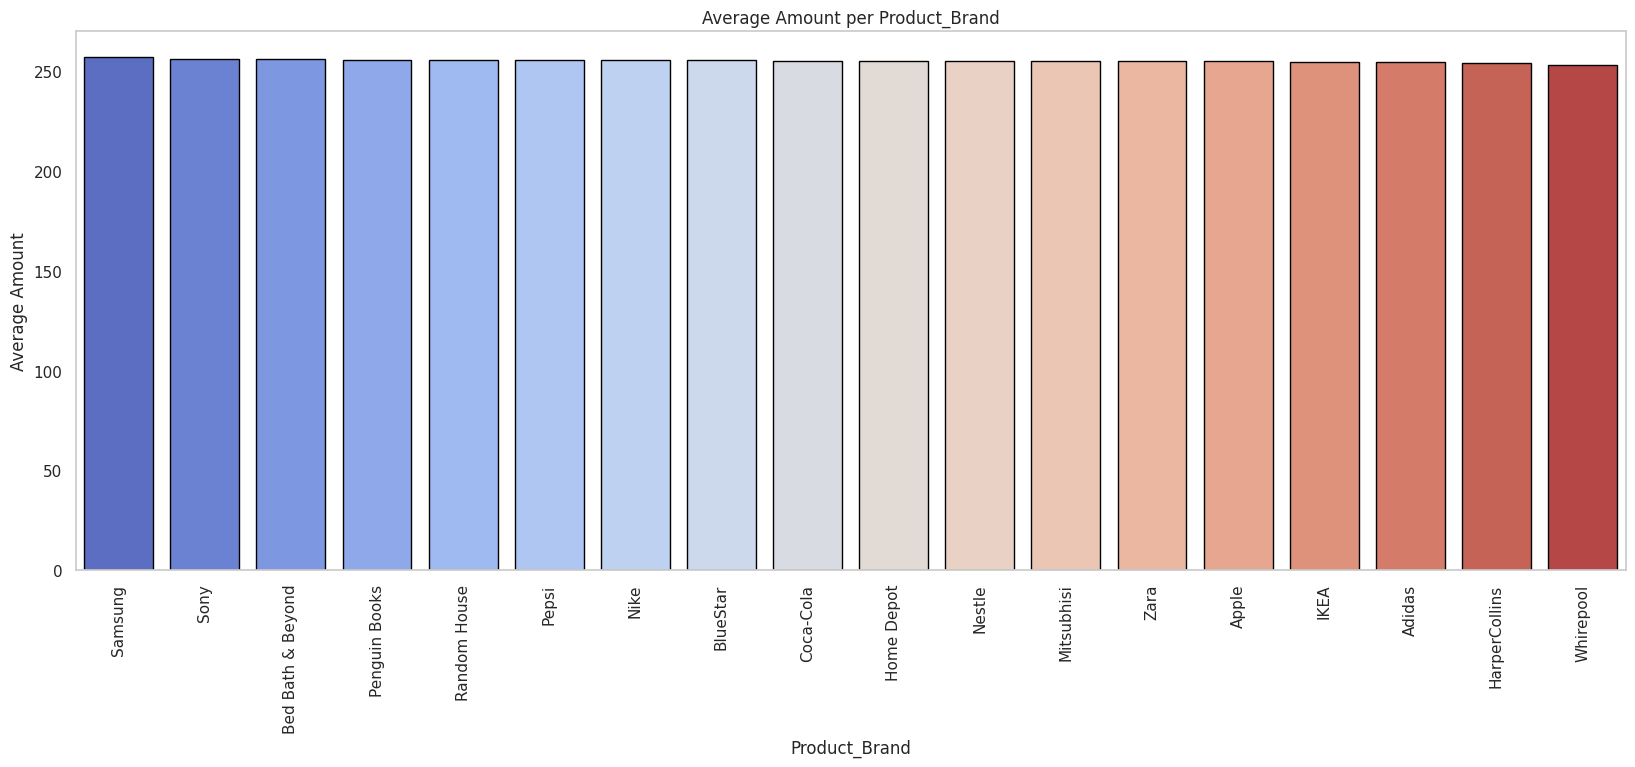

7. Analysing Average Amount per Product_Type:


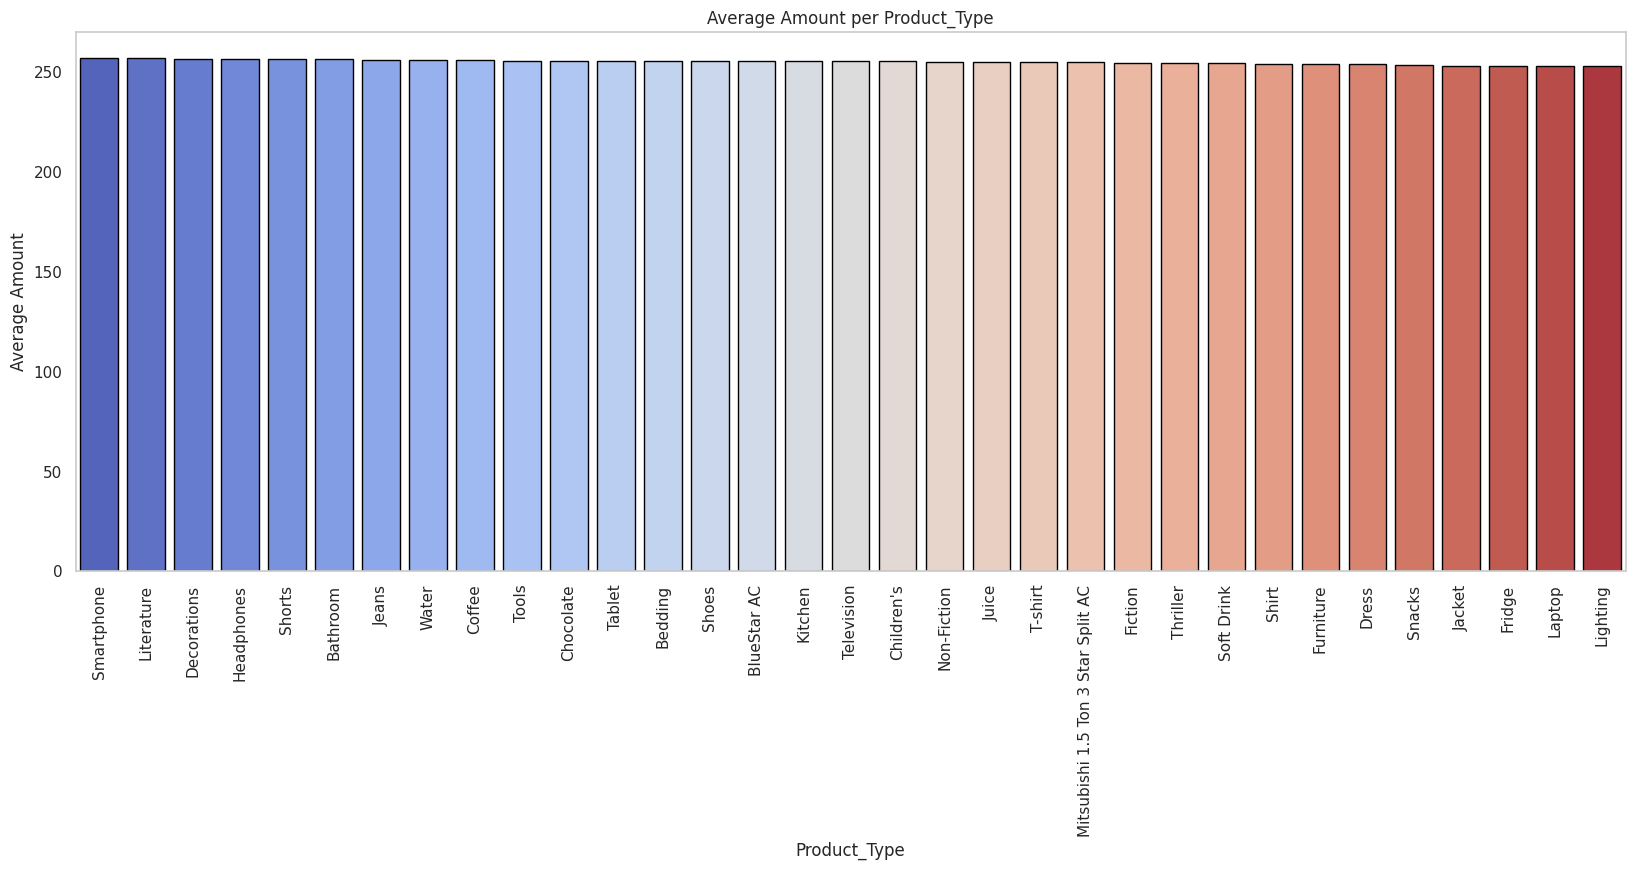

8. Analysing Average Amount per Feedback:


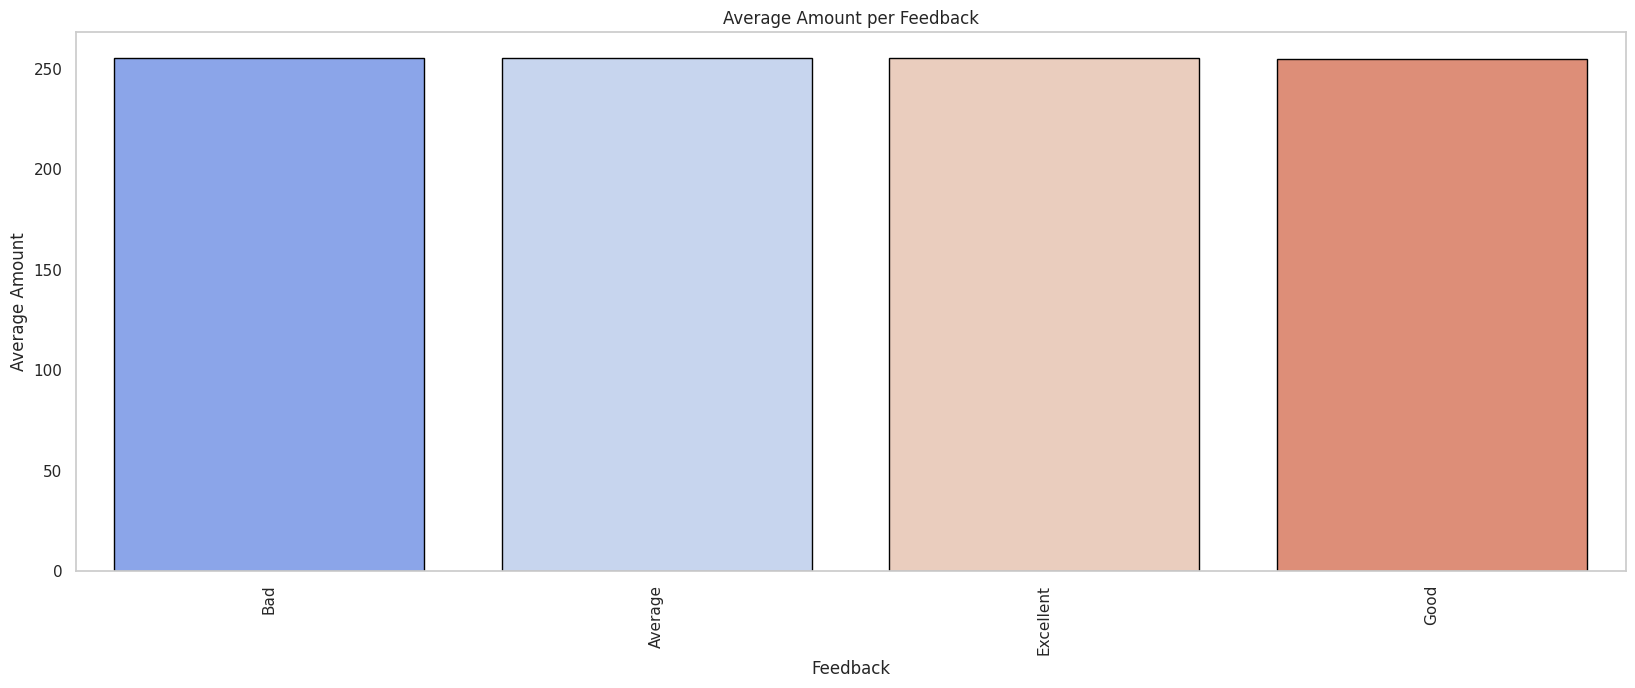

9. Analysing Average Amount per Shipping_Method:


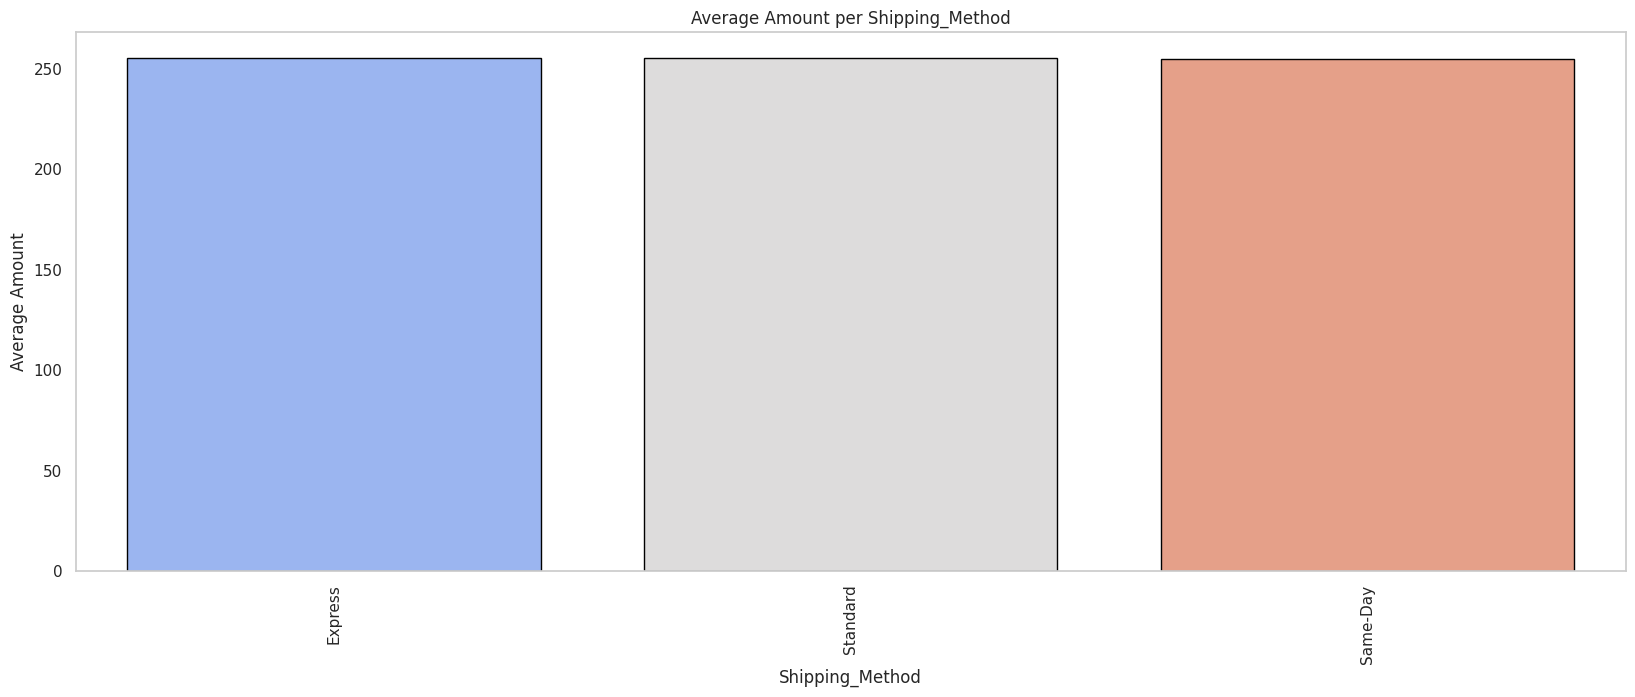

10. Analysing Average Amount per Payment_Method:


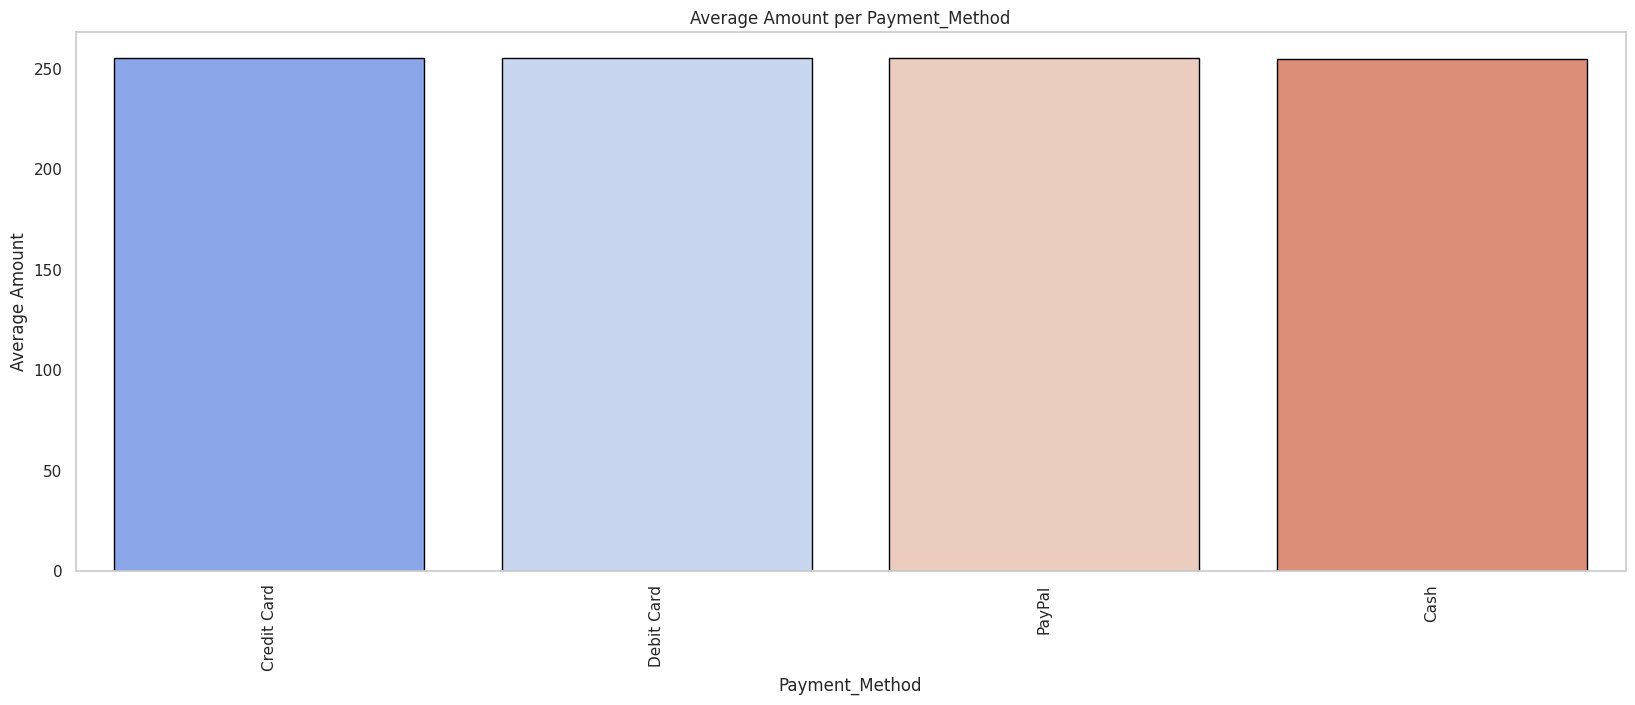

11. Analysing Average Amount per Order_Status:


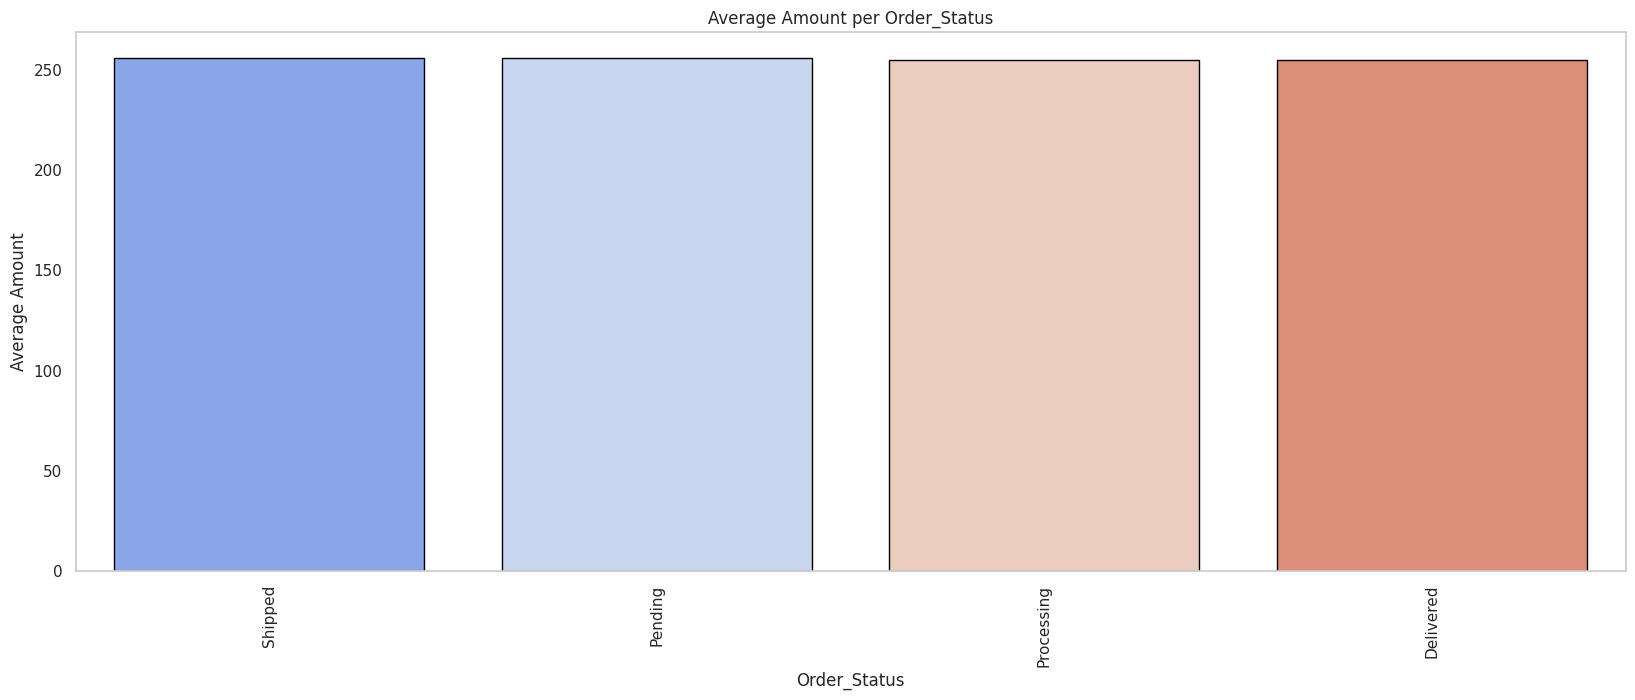

12. Analysing Average Amount per Ratings:


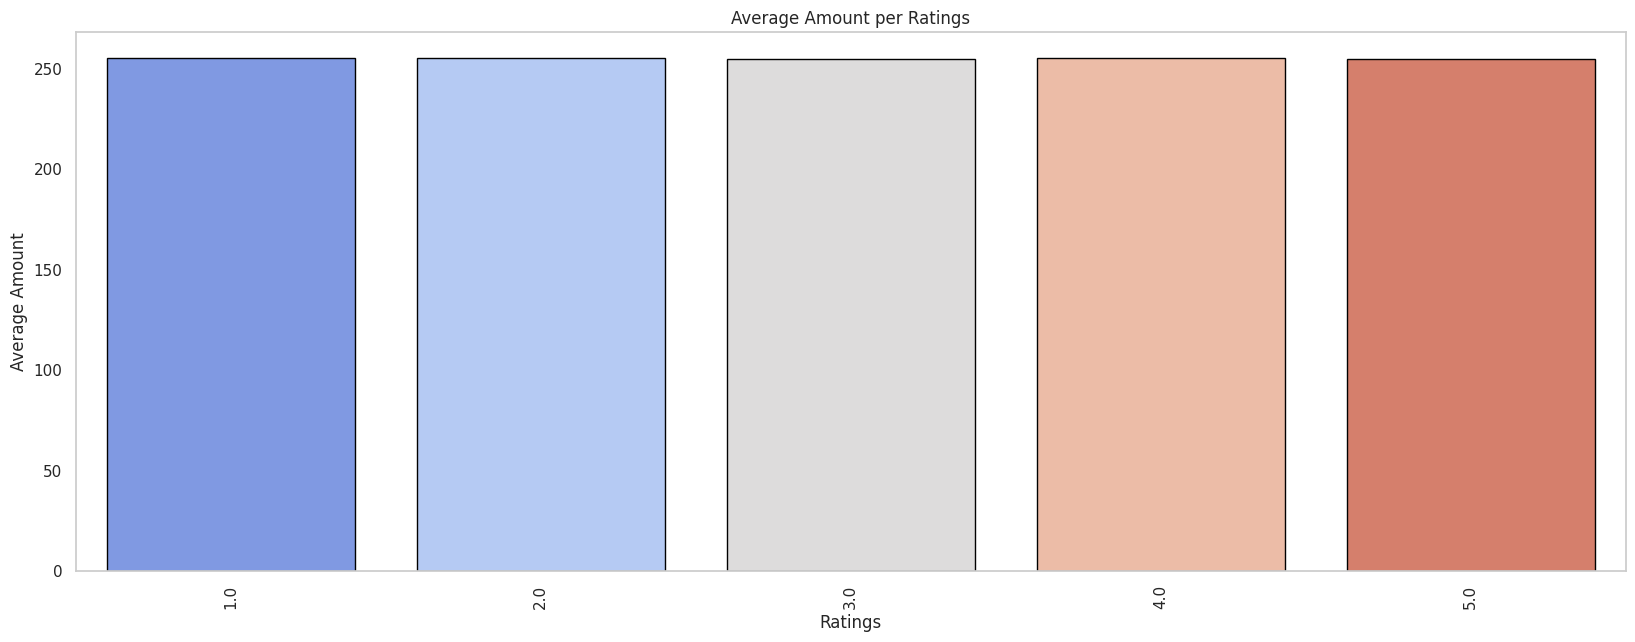

13. Analysing Average Amount per Total_Purchases:


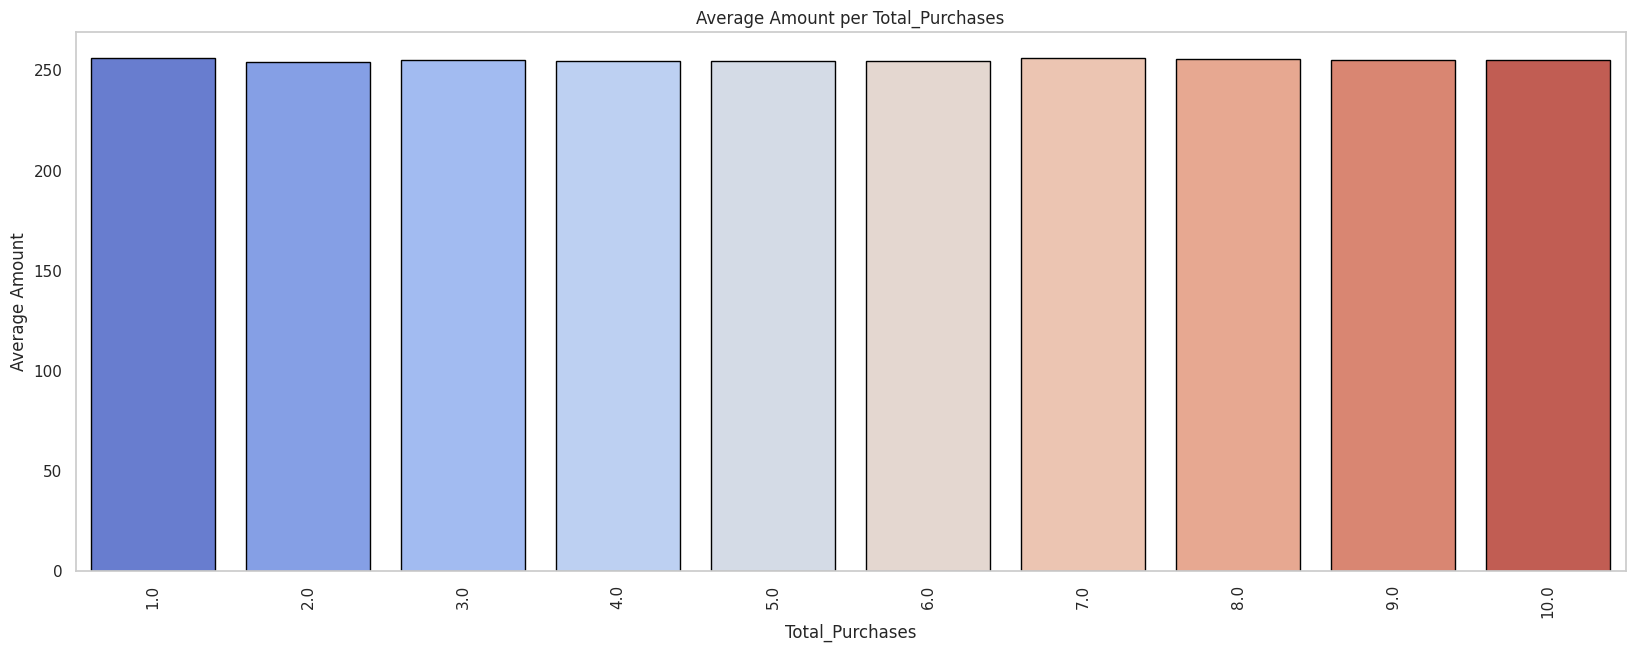

In [25]:
#List of categorical variables to analyse
categorical_val=['Country','Gender','Income','Customer_Segment','Product_Category','Product_Brand','Product_Type','Feedback','Shipping_Method','Payment_Method','Order_Status','Ratings','Total_Purchases']
print("--- Univariate Analysis of Categorical Columns ---")
#Looping through each variable
i=1
for var in categorical_val:
    print(f"{i}. Analysing Average Amount per {var}:")
    plt.figure(figsize = (20,7))
    sns.barplot(df.groupby(var)['Amount'].mean().sort_values(ascending=False) , palette = 'coolwarm' , edgecolor = 'black')

    plt.title(f'Average Amount per {var}')
    plt.xlabel(var)
    plt.ylabel('Average Amount')
    plt.xticks(rotation =90)
    plt.grid(False)
    plt.show()
    i+=1

**Key Observations**

**​Income, Gender, and Customer Segment:** The plots reveal that the average amount spent is remarkably consistent across different income levels, genders, and customer segments. This suggests that these demographic and behavioral categories do not significantly influence the size of a customer's individual purchase. * Product-based Averages:

**​Product Categories:** There is little variation in the average amount spent per transaction across the top product categories like Electronics, Grocery, Home Decor, and Books. All categories show a similar average transaction value.

​**Product Brands & Types:** The average amount spent is also very similar across different product brands and types, with most averages clustered between 200 and 250. This is a very flat distribution, indicating no single brand or product type drives a significantly higher average transaction value than others.

**​Transaction-based Averages:**

**​Payment Method:** The average amount spent is nearly identical regardless of the payment method used (Credit Card, Debit Card, PayPal, or Cash).

**​Shipping Method:** Similarly, the average amount spent per transaction is consistent across all shipping methods (Express, Standard, and Same-Day).

**​Feedback:** The average amount spent is also uniform across all feedback categories (Bad, Average, Excellent, and Good). This suggests that the quality of the product or service, as reflected by customer feedback, does not influence the transaction amount itself.

**Average Amount per Order Status:** The average amount spent is almost identical regardless of whether an order has been shipped, is pending, processing, or delivered. This indicates that the order's status does not influence the purchase size.

**​Average Amount per Ratings:** There is no significant difference in the average amount spent based on the customer rating (from 1.0 to 5.0). Customers who give a low rating spend, on average, the same amount as those who give a high rating.

**​Average Amount per Total Purchases:** The average transaction amount stays remarkably stable as the number of a customer's total purchases increases. This means that even most loyal customers (those with a high number of total purchases) are not spending more on a per-transaction basis compared to new customers.

​The overall trend across these plots is a lack of significant variation in average transaction amount, regardless of the customer's background, the product they are buying, or the transactional method they are using.

**Distribution of Average Total Amount across Categorical Variables**

--- Univariate Analysis of Categorical Columns ---
1. Analysing Average Total_Amount per Country:


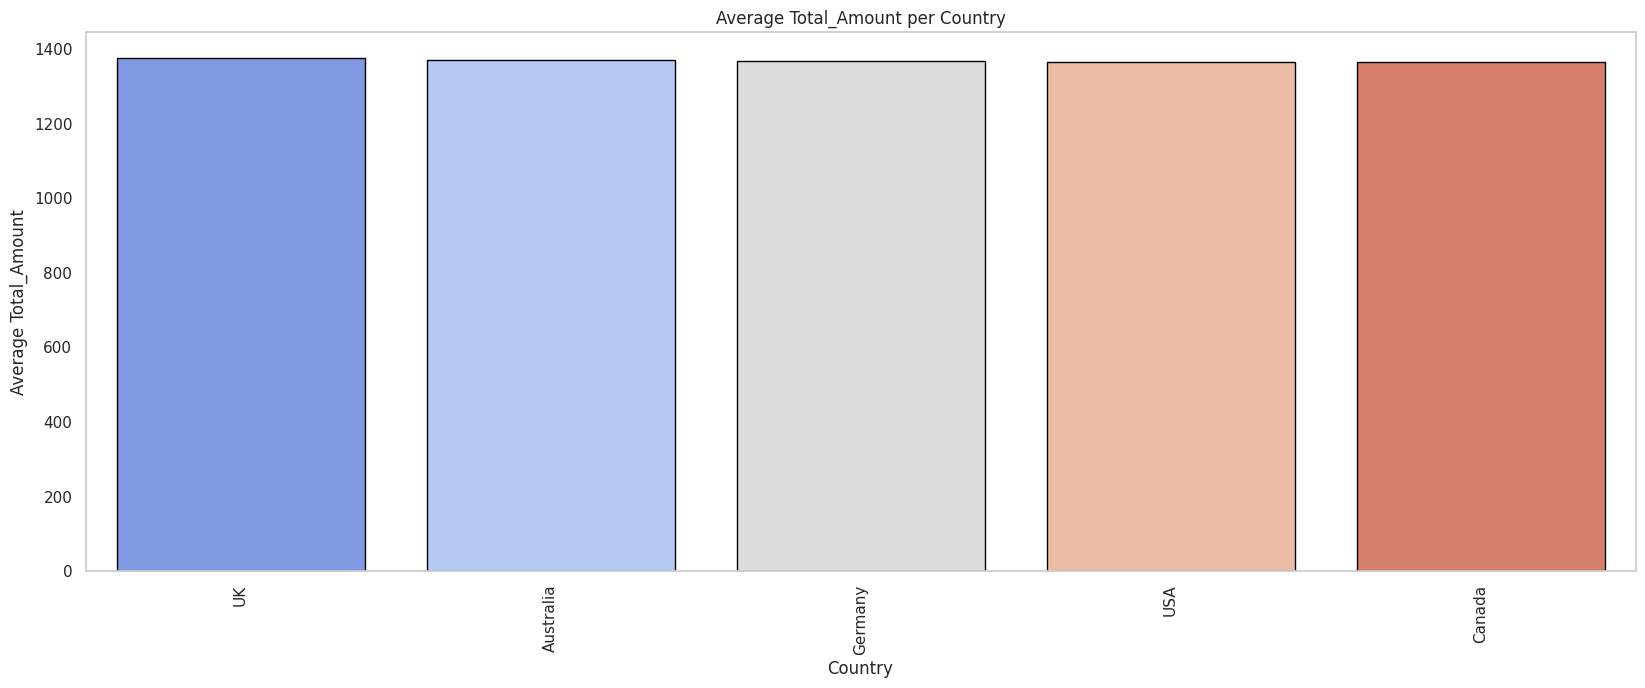

2. Analysing Average Total_Amount per Gender:


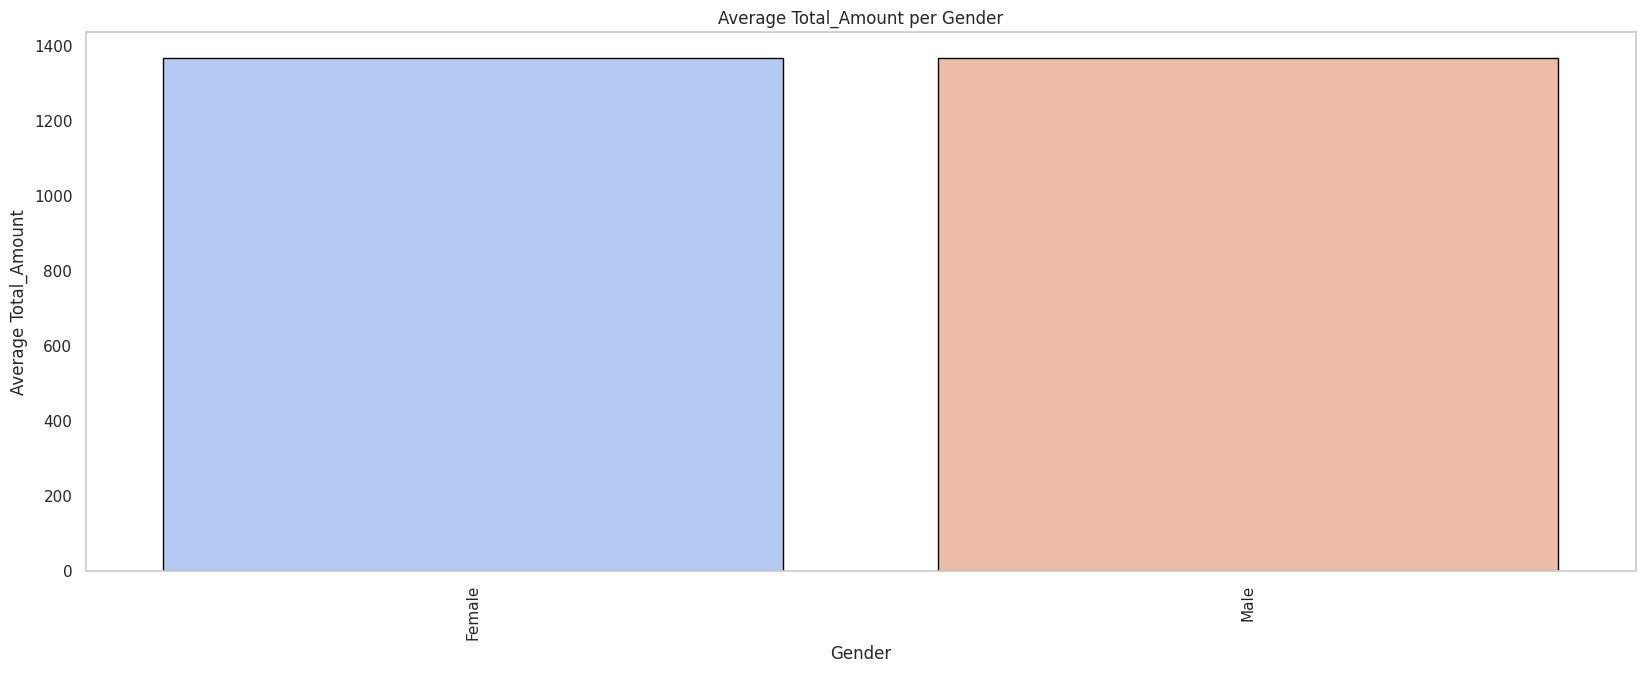

3. Analysing Average Total_Amount per Income:


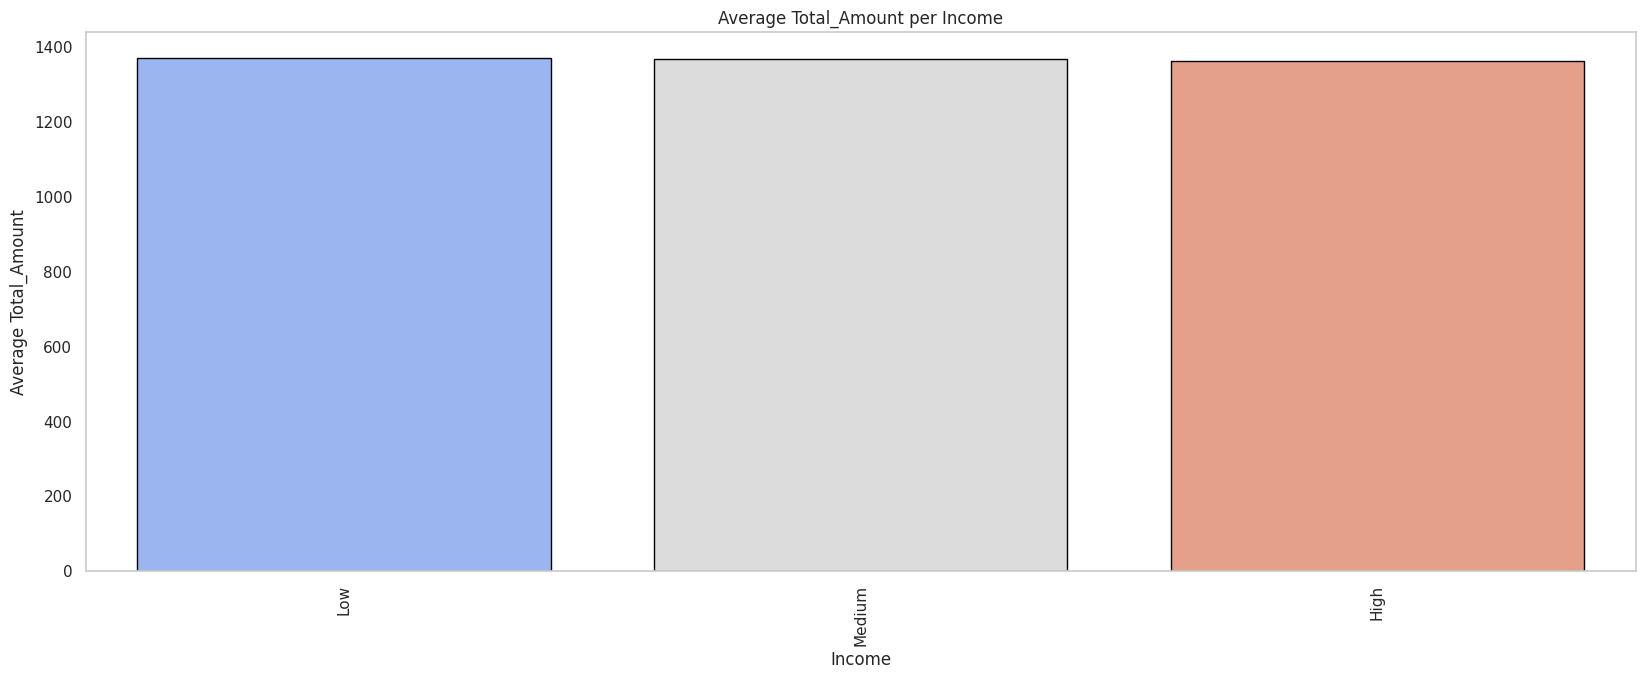

4. Analysing Average Total_Amount per Customer_Segment:


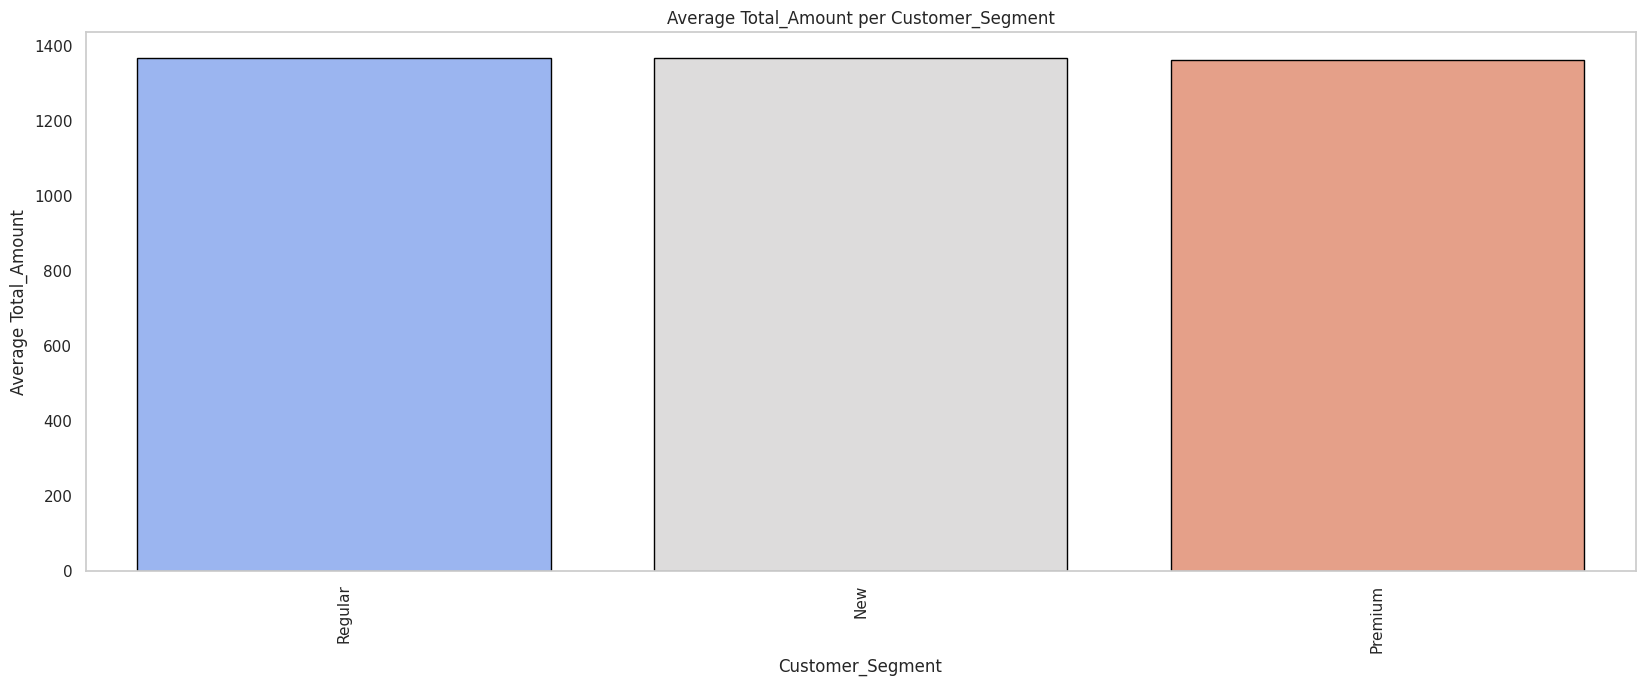

5. Analysing Average Total_Amount per Product_Category:


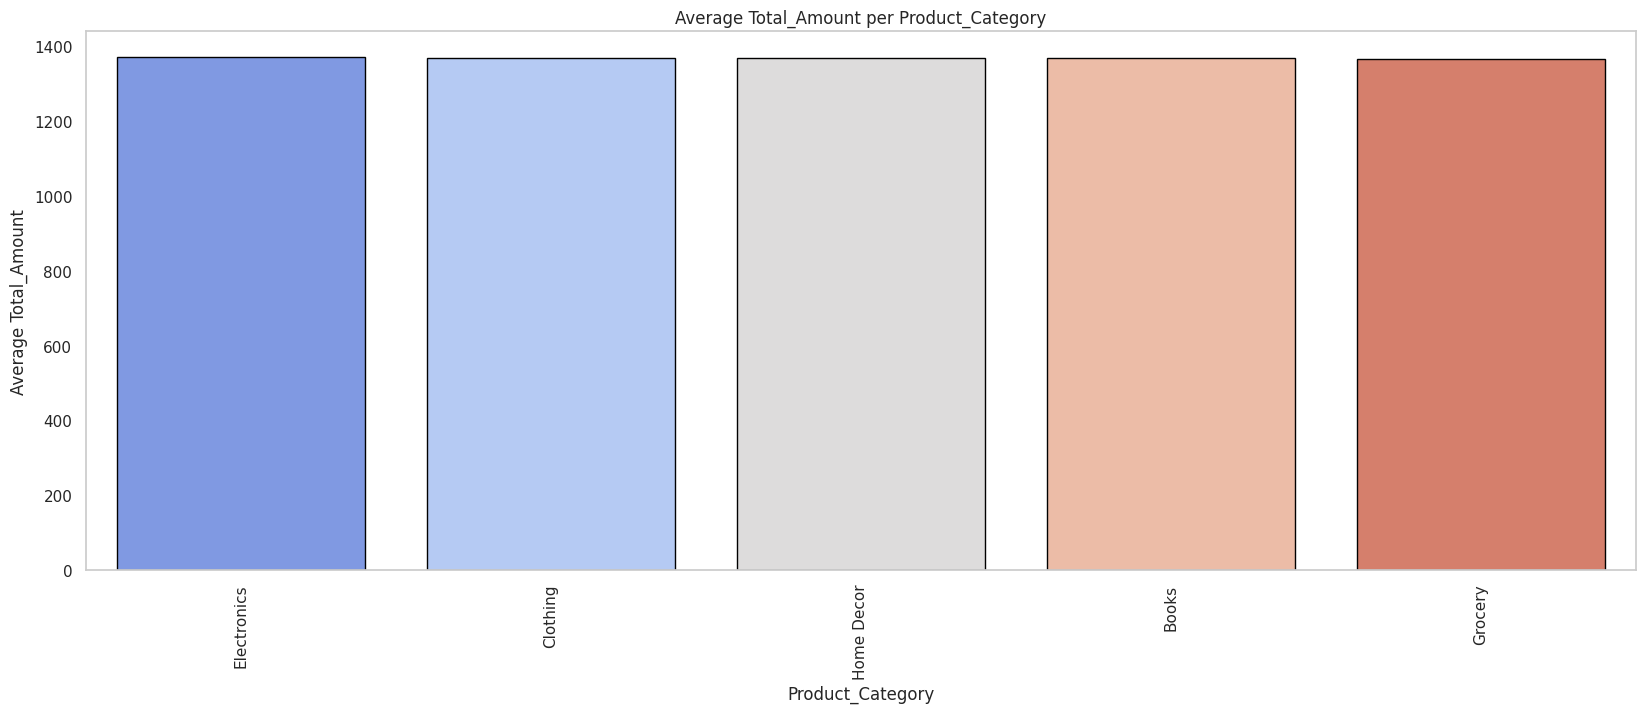

6. Analysing Average Total_Amount per Product_Brand:


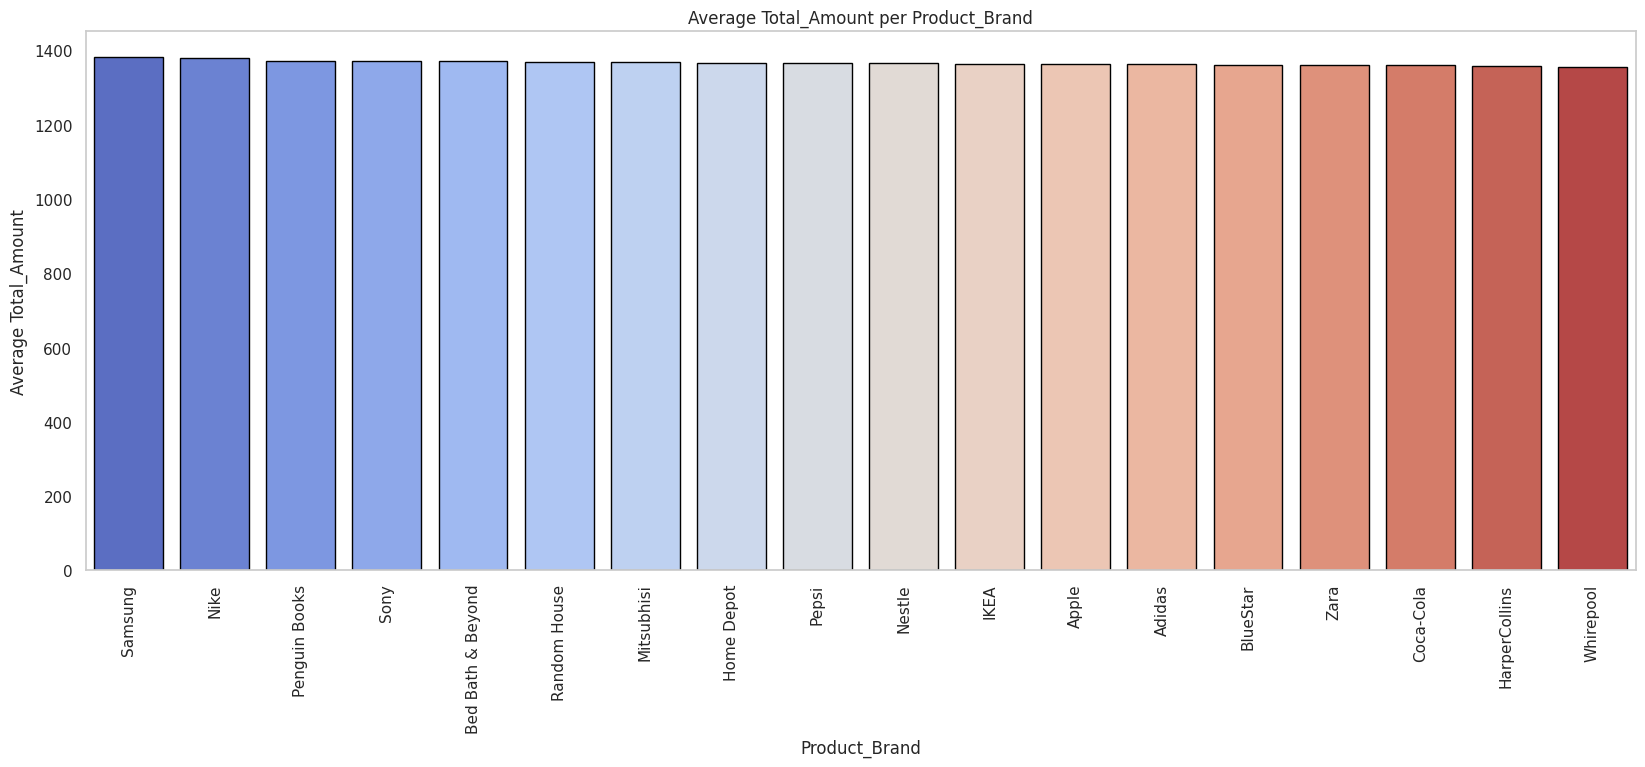

7. Analysing Average Total_Amount per Product_Type:


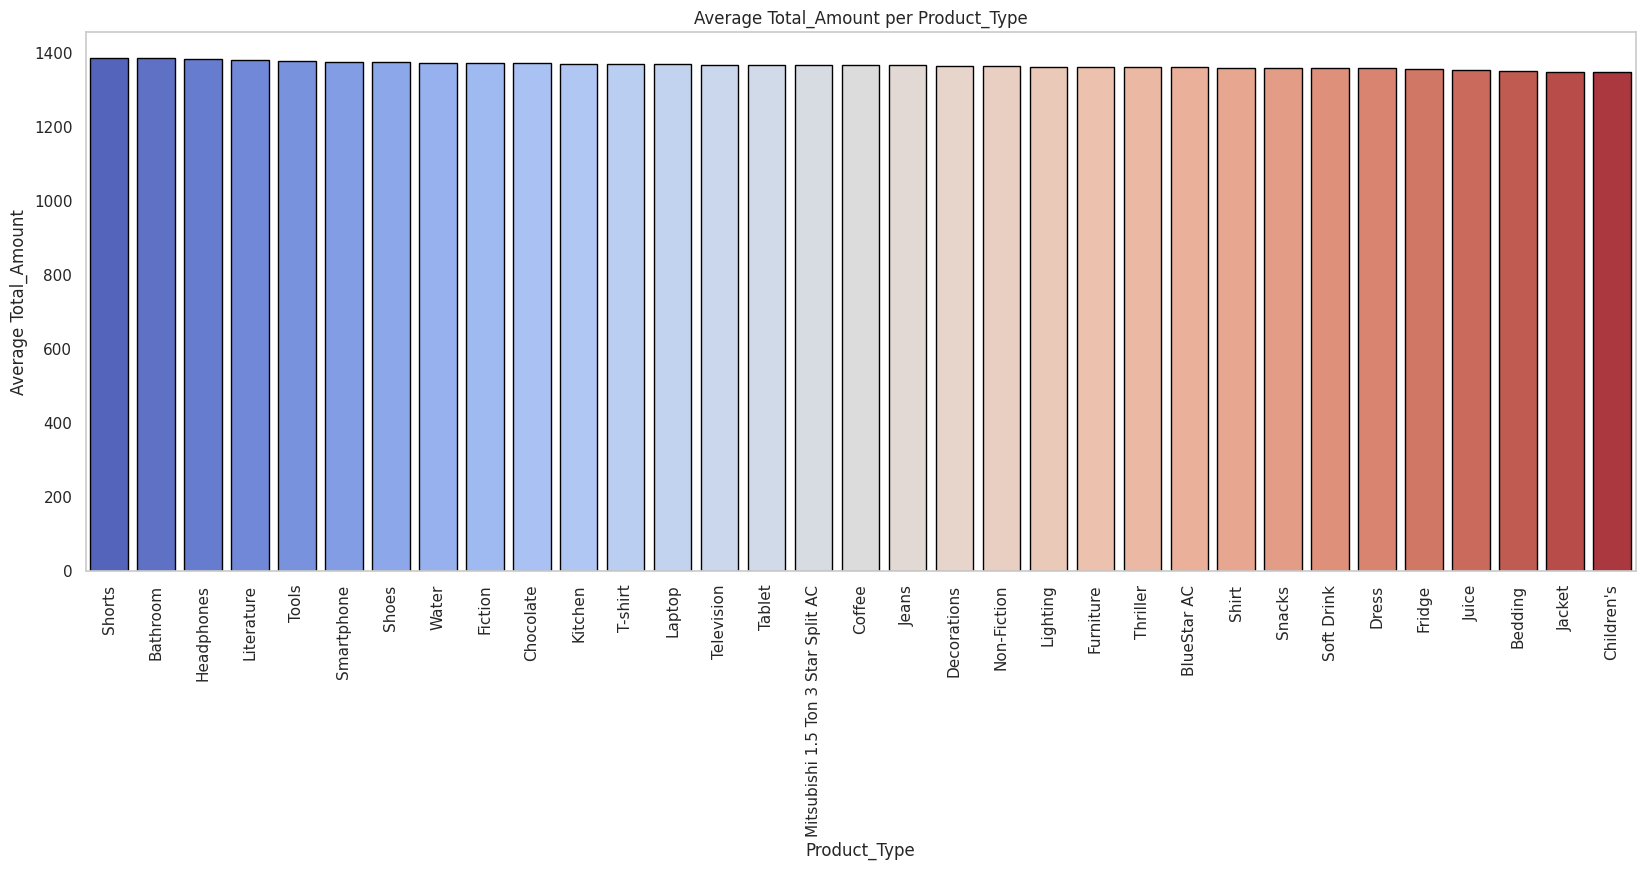

8. Analysing Average Total_Amount per Feedback:


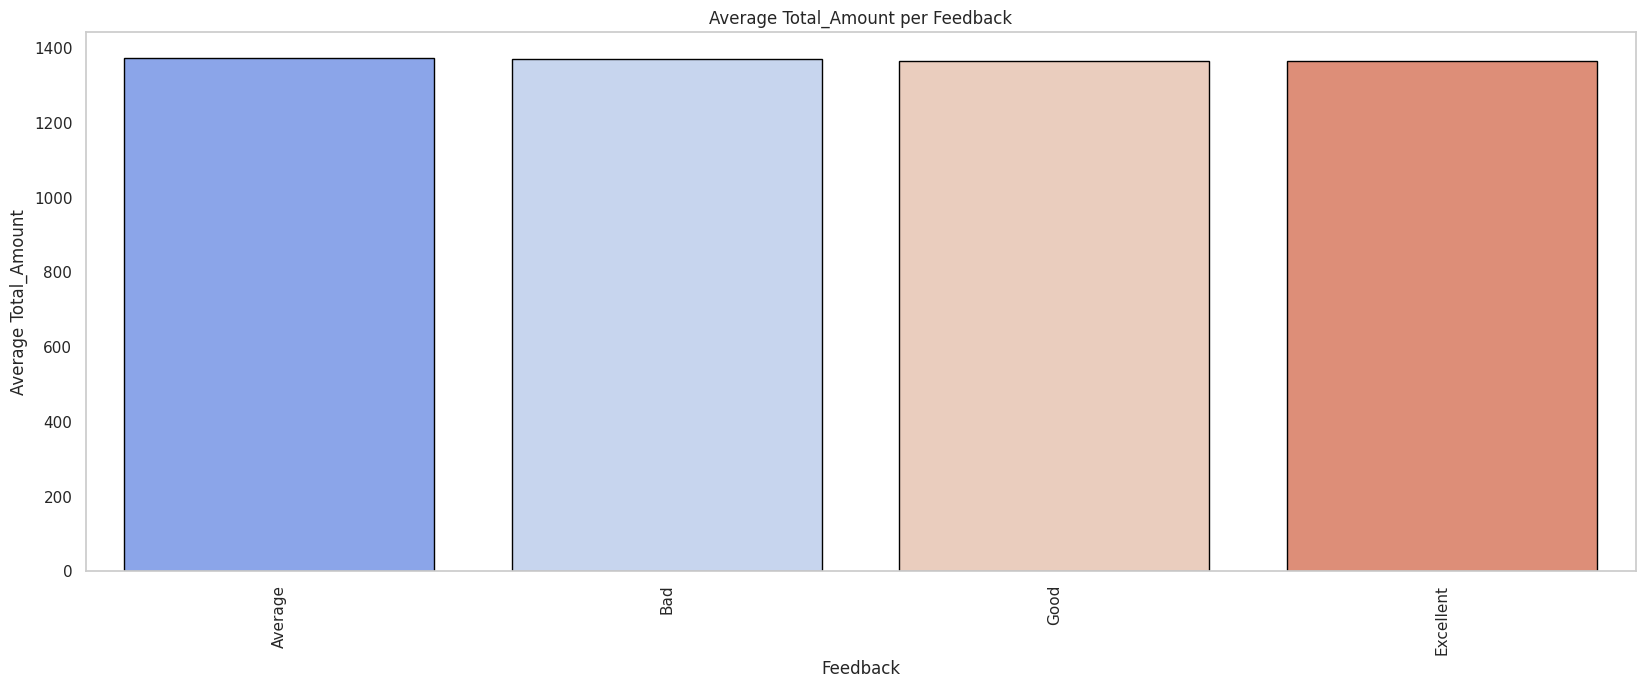

9. Analysing Average Total_Amount per Shipping_Method:


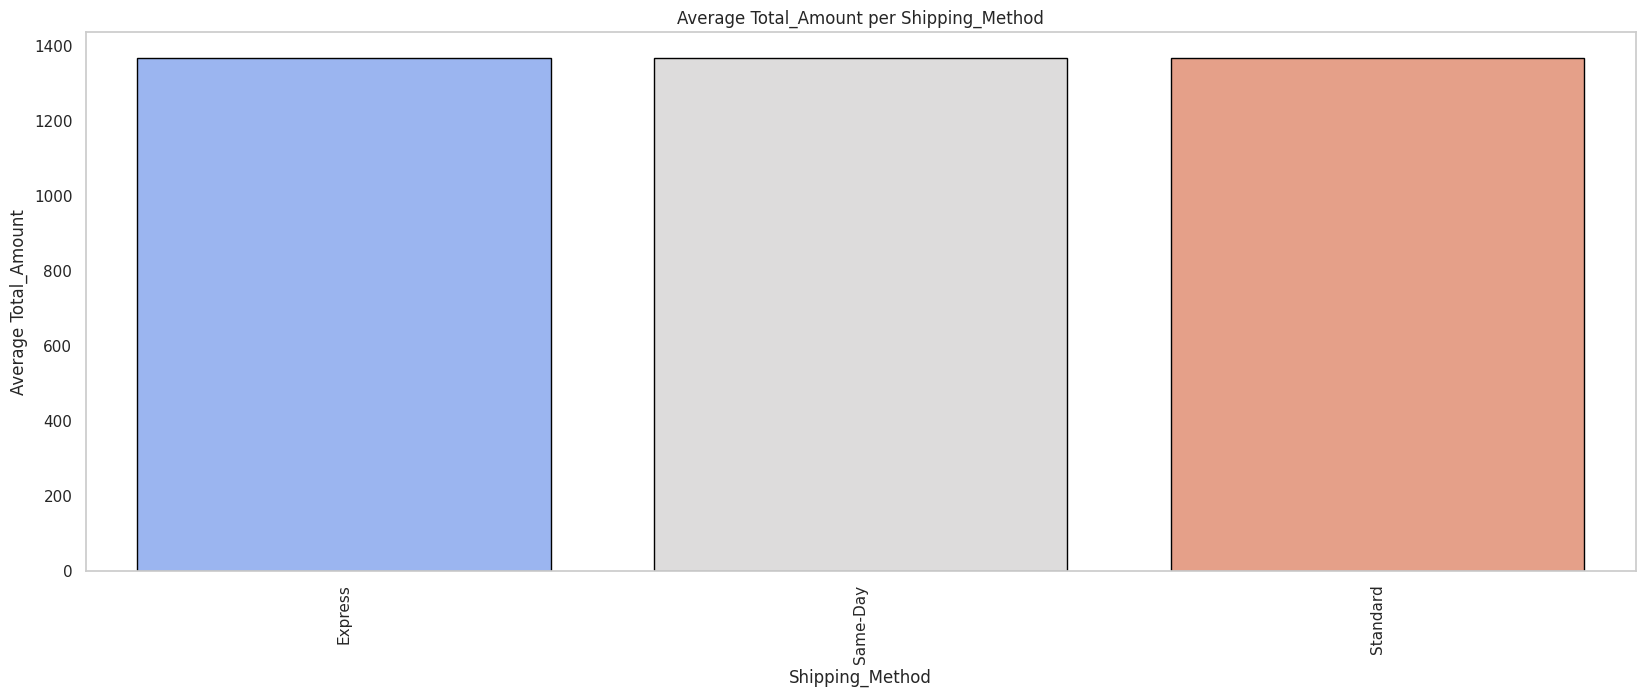

10. Analysing Average Total_Amount per Payment_Method:


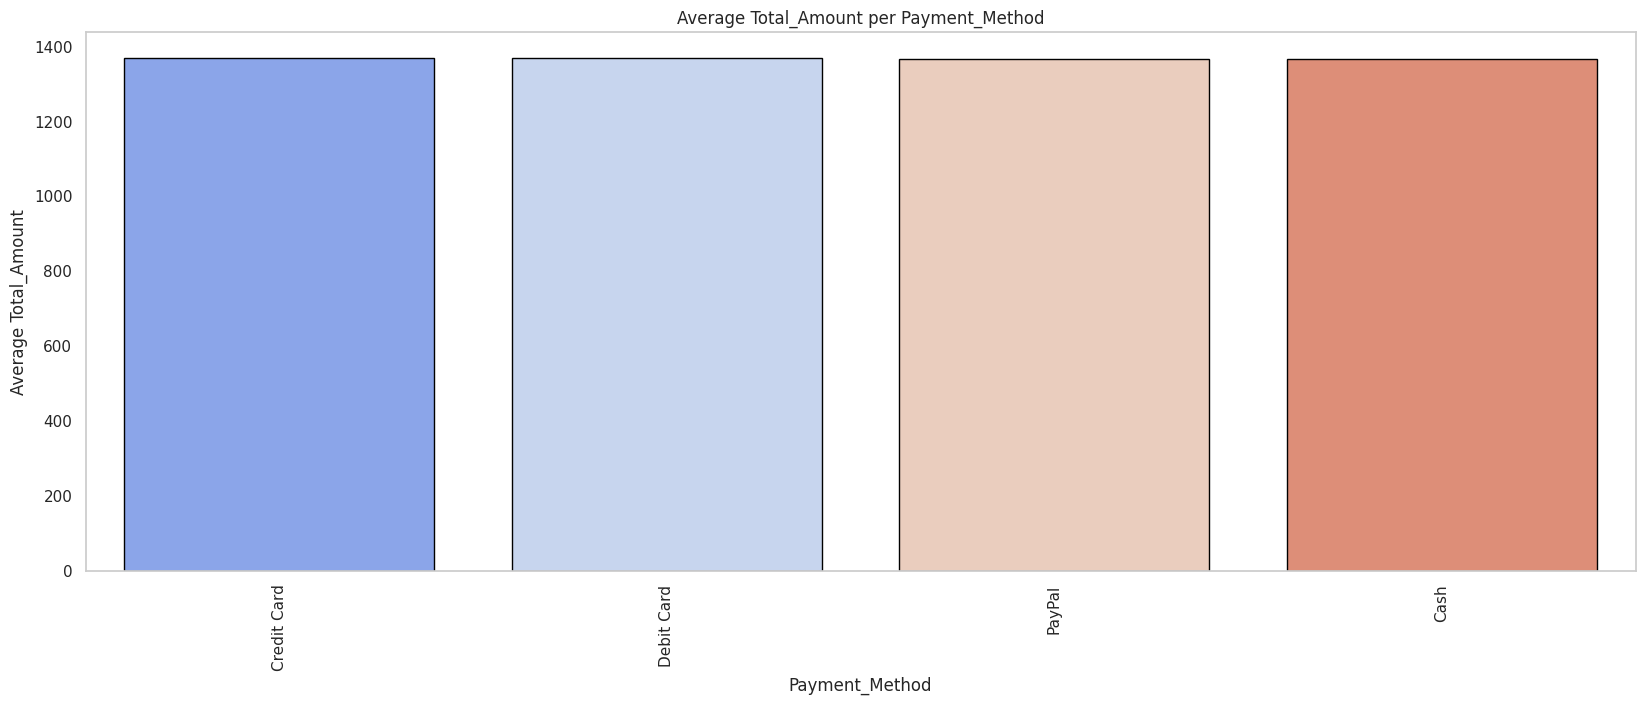

11. Analysing Average Total_Amount per Order_Status:


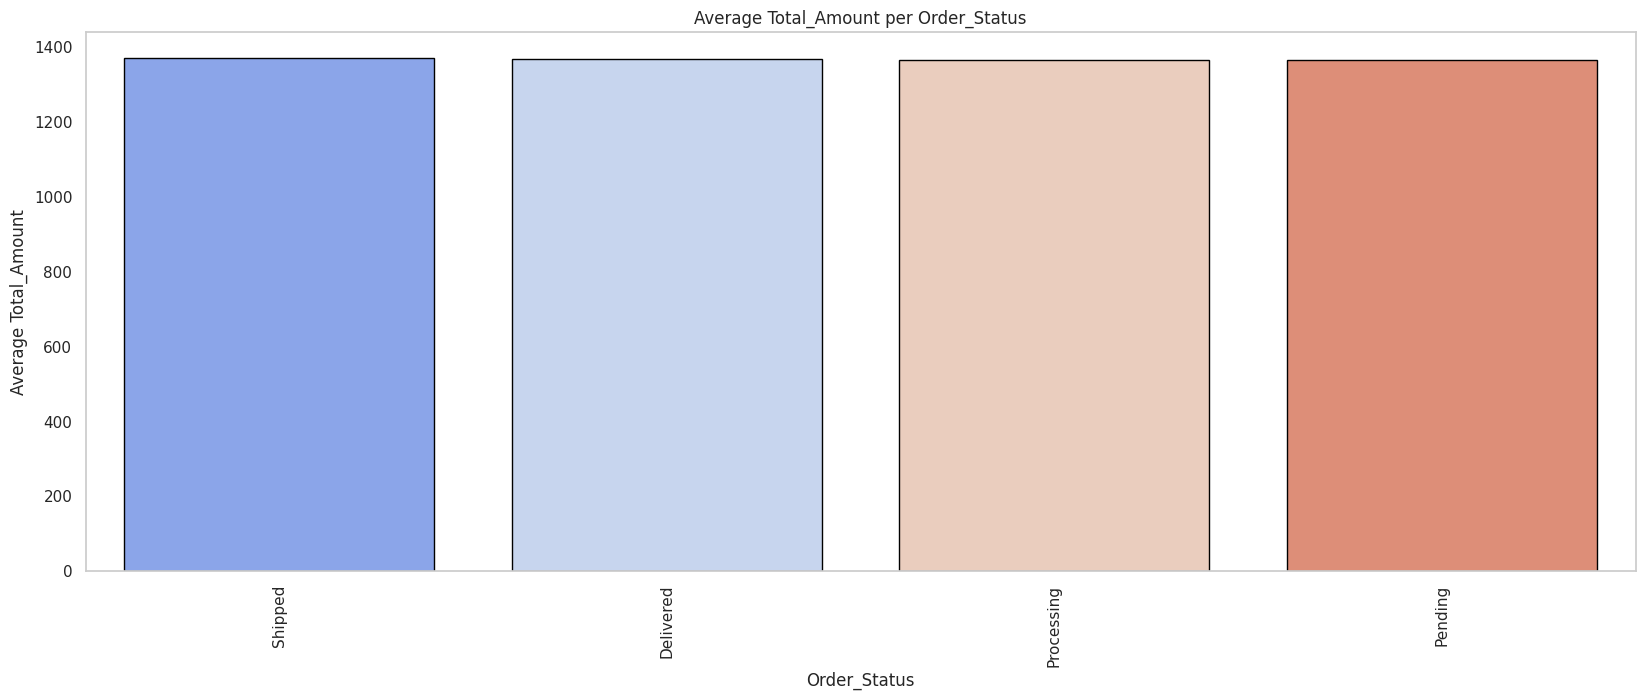

12. Analysing Average Total_Amount per Ratings:


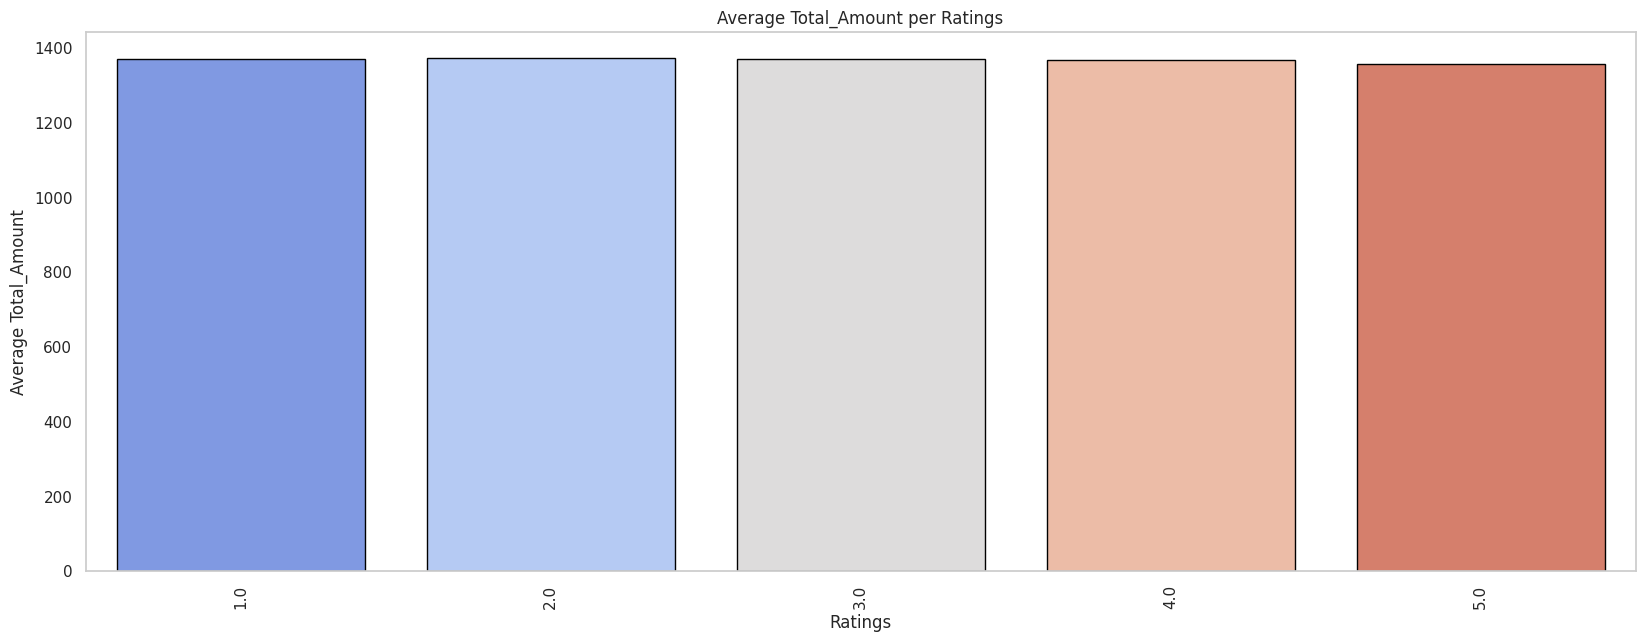

13. Analysing Average Total_Amount per Total_Purchases:


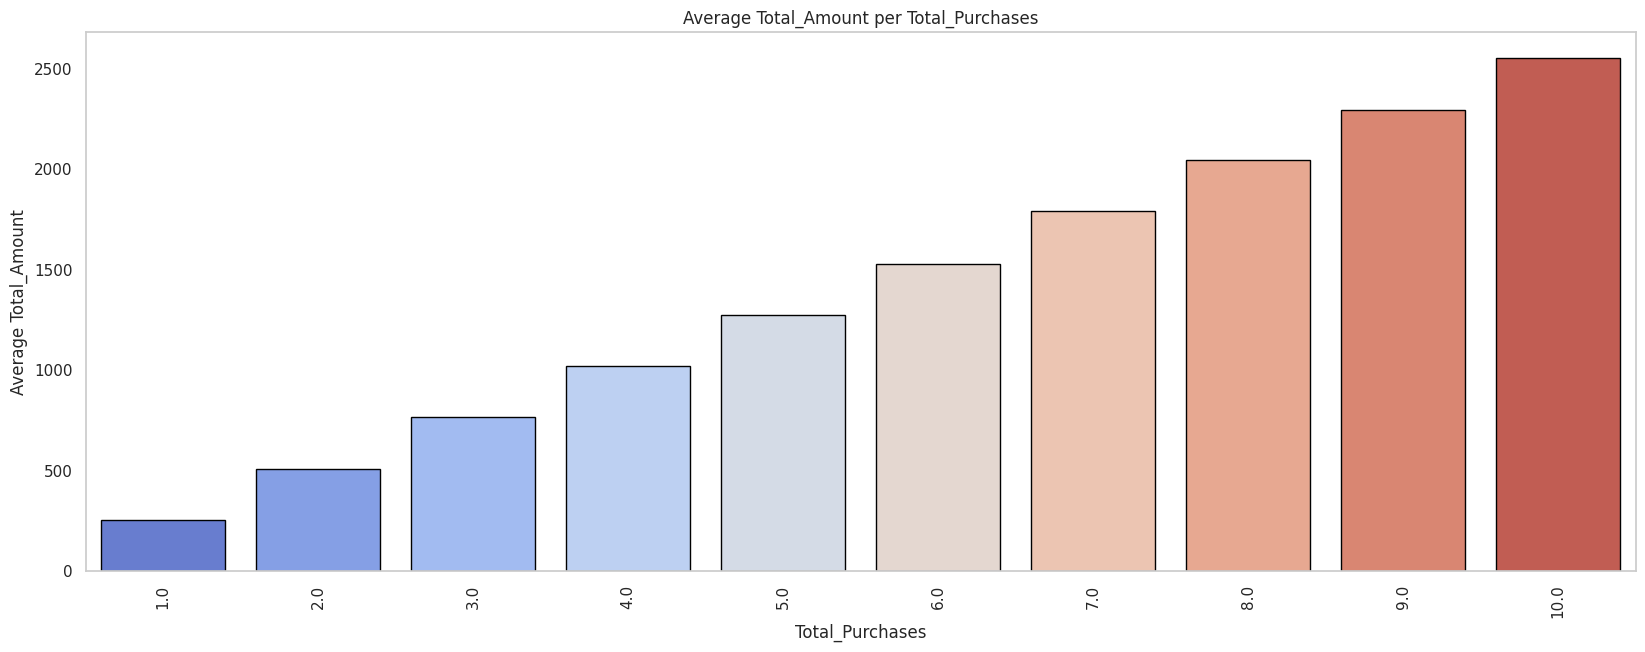

In [26]:
#List of categorical variables to analyse
categorical_val=['Country','Gender','Income','Customer_Segment','Product_Category','Product_Brand','Product_Type','Feedback','Shipping_Method','Payment_Method','Order_Status','Ratings','Total_Purchases']
print("--- Univariate Analysis of Categorical Columns ---")
#Looping through each variable
i=1
for var in categorical_val:
    print(f"{i}. Analysing Average Total_Amount per {var}:")
    plt.figure(figsize = (20,7))
    sns.barplot(df.groupby(var)['Total_Amount'].mean().sort_values(ascending=False) , palette = 'coolwarm' , edgecolor = 'black')

    plt.title(f'Average Total_Amount per {var}')
    plt.xlabel(var)
    plt.ylabel('Average Total_Amount')
    plt.xticks(rotation =90)
    plt.grid(False)
    plt.show()
    i+=1


**Key Observations**

**​Country**: The average total amount spent is consistent across all countries shown, hovering around $1350. The UK and Australia have slightly higher averages, but the differences are minimal. This suggests customer location doesn't significantly impact their total spending.

**​Gender and Income:** The average total amount spent is remarkably similar for both male and female customers. Similarly, there is little variation in total spending across different income levels (Low, Medium, and High). This indicates that total customer spending is not strongly influenced by gender or income.

**​Customer Segment:** All customer segments—Regular, New, and Premium—show nearly identical average total spending. This is a crucial insight: while different customer segments, their total lifetime value, as represented by total spending, appears to be the same.

**​Product-based Averages:**

**​Product Category:** The average total amount spent is consistent across all product categories. Customers who primarily buy electronics spend roughly the same as those who buy groceries or clothing.

​**Product Brand & Type:** There is virtually no difference in the average total amount spent across different product brands or product types. Whether a customer buys a Samsung TV or a pair of Nike shoes, their total lifetime spending remains similar.

​**Transaction-based Averages:**

​**Feedback:** The average total amount spent is the same for customers who provide bad feedback as for those who provide excellent feedback. This is a surprising finding, suggesting that customer dissatisfaction doesn't necessarily reduce their total spending.

**​Shipping and Payment Methods:** The average total amount spent is also uniform across all shipping and payment methods. Customers who use Express shipping or PayPal are not spending more or less in total than those who use Standard shipping or cash.


**Average Total Amount per Order Status & Ratings:**

​The top two charts show a very consistent pattern. The average total amount spent per customer is virtually the same across all order statuses (shipped, delivered, processing, pending) and across all ratings (1.0 to 5.0). This suggests that the stage of an order's lifecycle or a customer's satisfaction level, as expressed through ratings, does not influence their overall spending with the company.

​**Average Total Amount per Total Purchases**

​This plot is the most revealing of the series. Unlike the others, there is a clear and strong positive relationship. As the number of total purchases a customer has made increases, their average total amount spent also significantly increases. The average total amount for a customer with 10 total purchases is roughly eight times higher than a customer with only one purchase. This indicates that customers become much more valuable to the business over time, and their loyalty directly correlates with a higher lifetime value.

**9. Bivariate Analysis: Categorical vs categorical**

**Visualing The Distributions of Product Category**

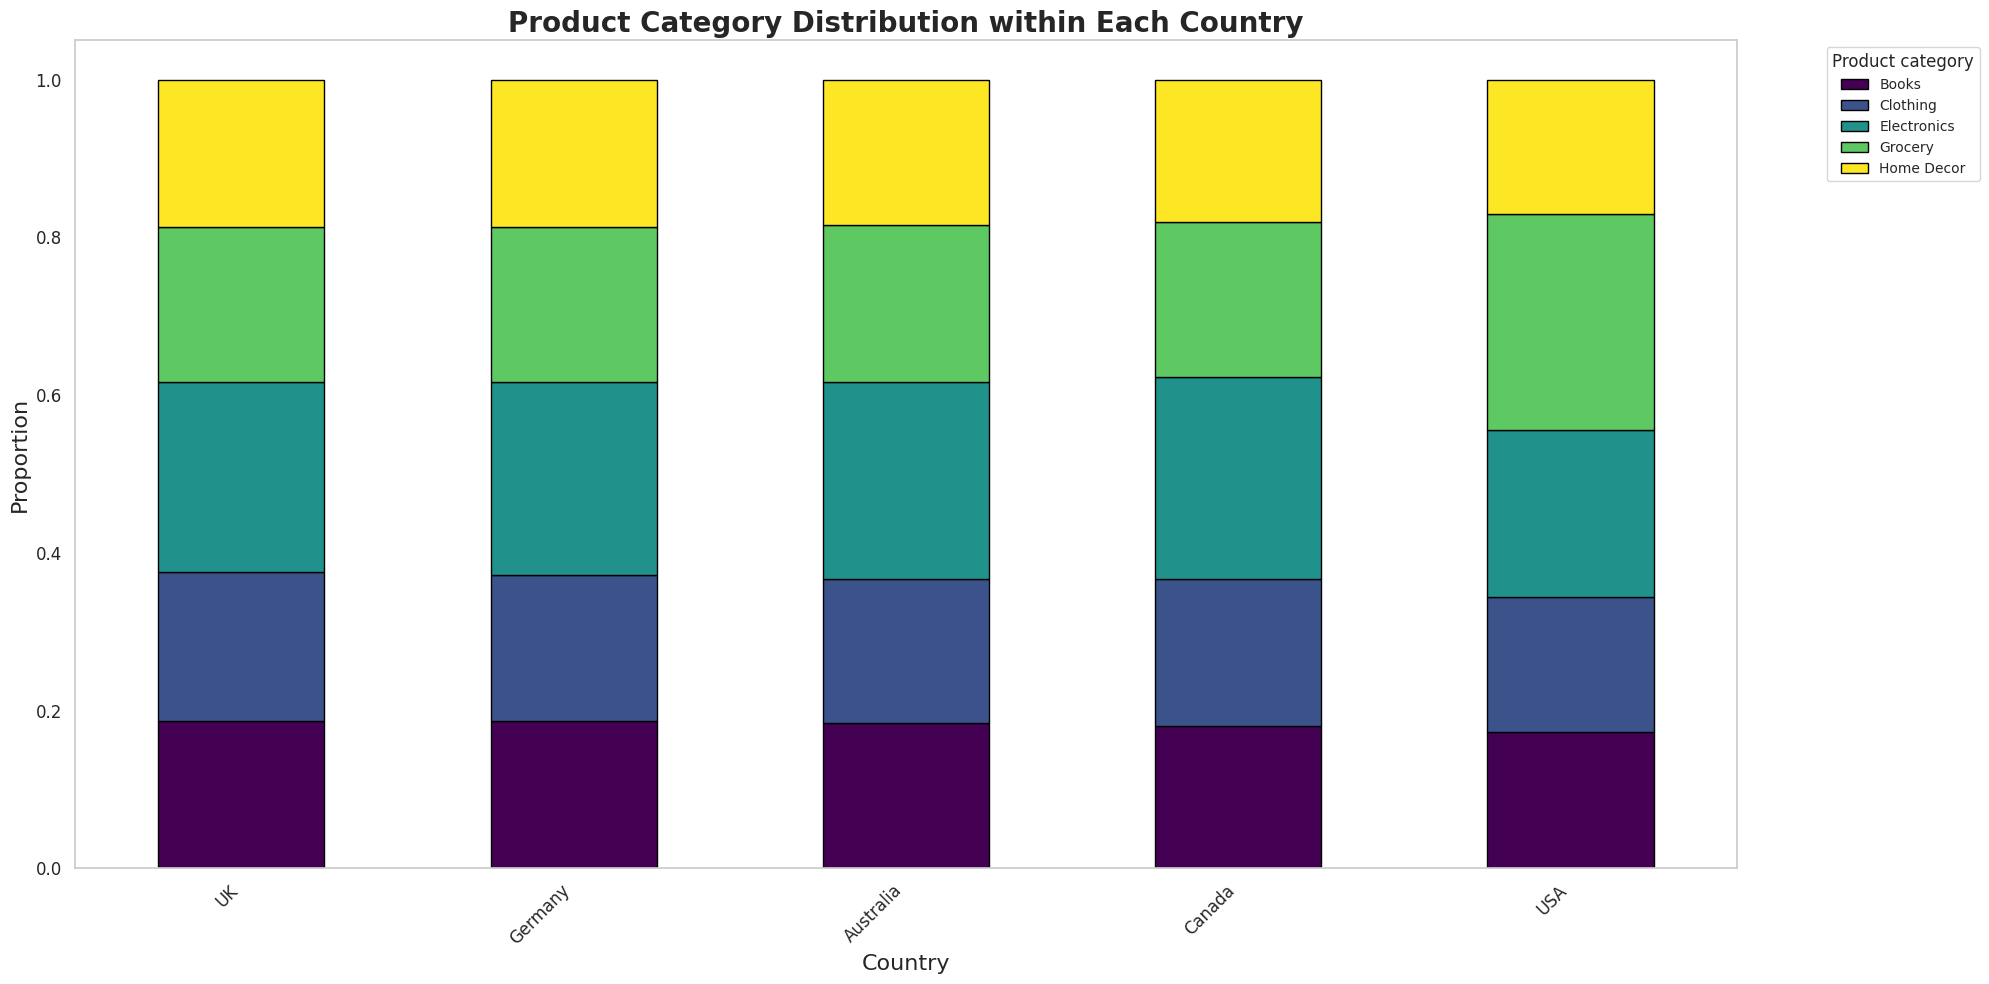

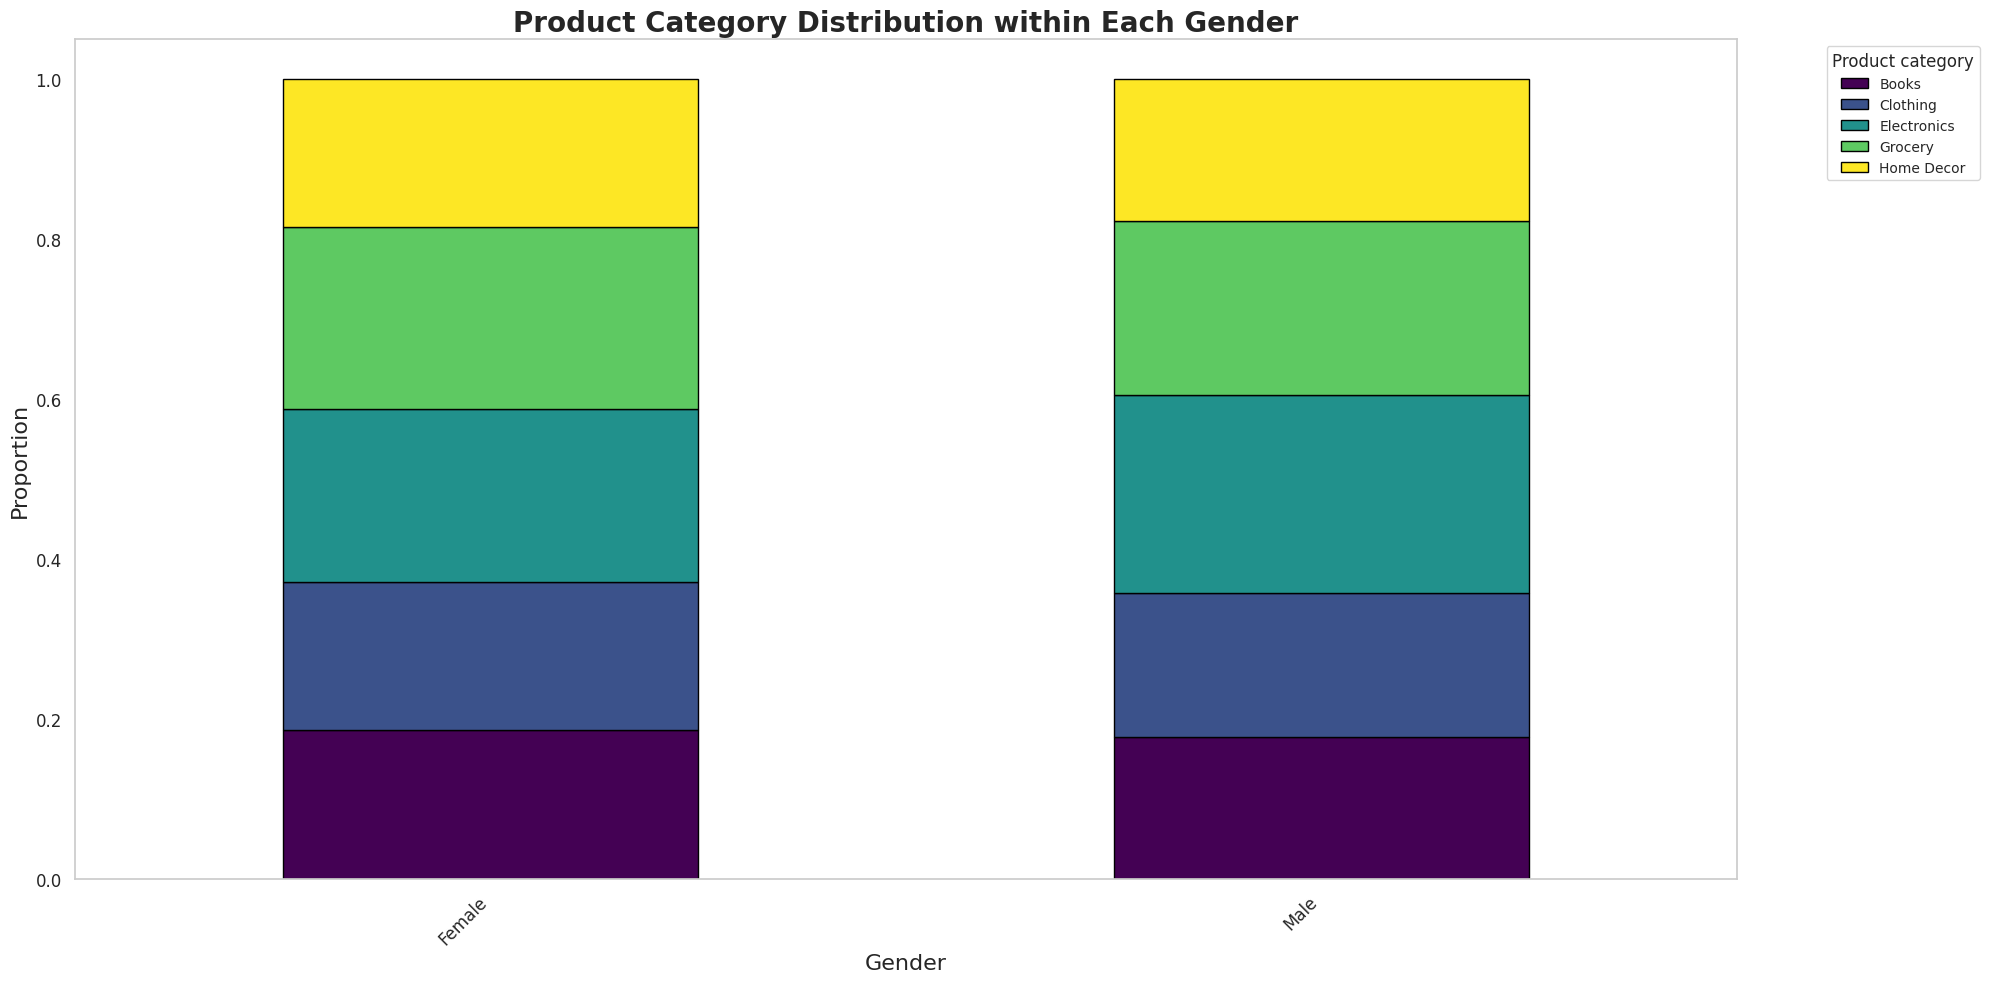

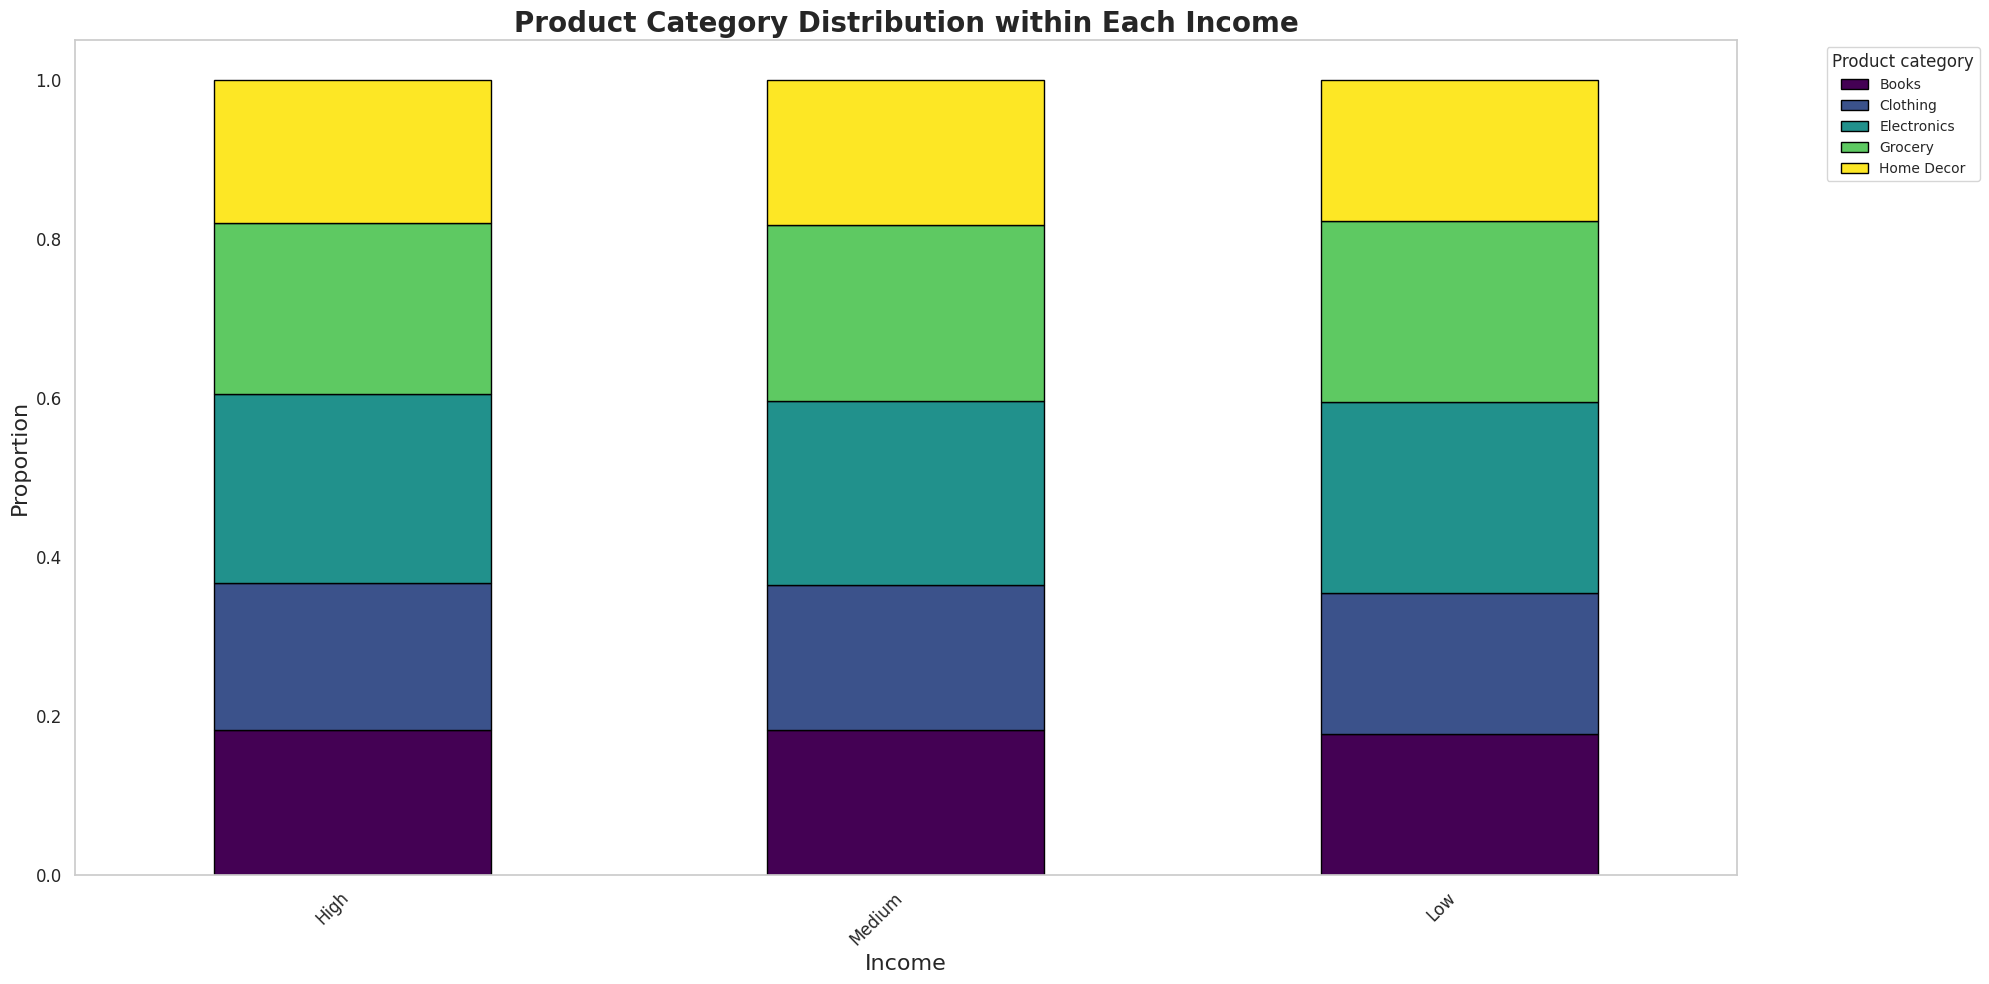

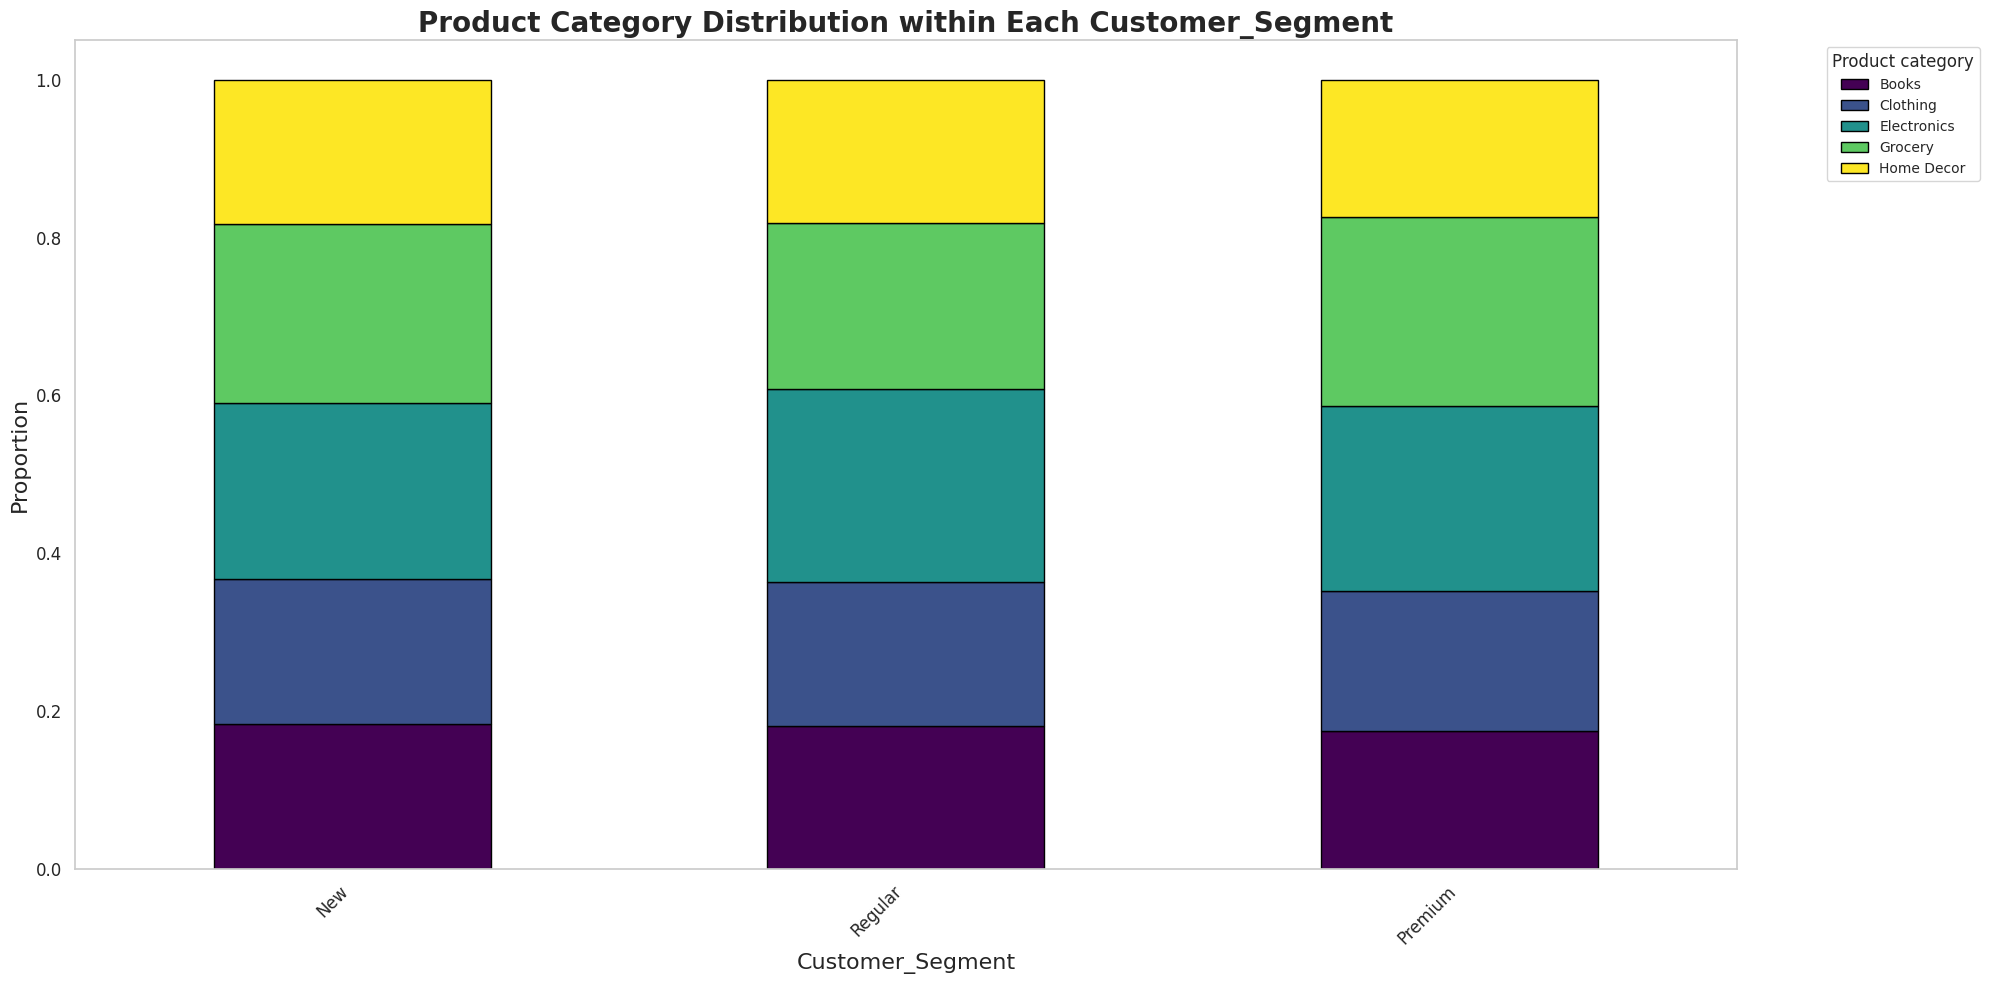

In [27]:
#List of categorical variables to analyse
category_val=['Country','Gender','Income','Customer_Segment']

#Looping through each variable
for var in category_val:
     # --- Calculate the proportion of each Customer_Segment within those categorical variables in the list ---
    # 1. Create a cross-tabulation (contingency table) of counts
    cross_tab = pd.crosstab(df[var], df['Product_Category'])

# 2. Convert counts to proportions (percentages) along the rows (axis=1)
# This calculates, for each store, what percentage each product category makes up of its total.
    percentage_cross_tab = cross_tab.apply(lambda r: r / r.sum(), axis=1)

# Sort stores by total count or alphabetically for consistent visualization (optional)
# For example, sorting by total sales volume (sum of units per store) might be more insightful if units column was used
# For now, let's sort by the sum of percentages for clarity or alphabetical
    percentage_cross_tab = percentage_cross_tab.sort_values(by=percentage_cross_tab.columns[0], ascending=False) # Or by any other column if meaningful

# --- Plotting the Stacked Bar Chart ---
    plt.figure(figsize=(20, 10)) # Adjust figure size as needed

# Use the .plot() method directly on the DataFrame for convenience with stacked bars
    ax = percentage_cross_tab.plot(
       kind='bar',
       stacked=True,
       colormap='viridis', # Choose a suitable colormap
       ax=plt.gca(),       # Get current axes
       edgecolor='black'
    )

    plt.title(f'Product Category Distribution within Each {var}', fontsize=20, fontweight='bold')
    plt.xlabel(var, fontsize=16)
    plt.ylabel('Proportion', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12) # Rotate store names for readability
    plt.yticks(fontsize=12)
    plt.legend(title='Product category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10) # Place legend outside
    plt.grid(False) # Only y-grid makes sense for stacked bars

    plt.tight_layout() # Adjust layout to prevent labels/titles from being cut off
    plt.show()

**Product Category Distribution Across Demographics**

​The charts consistently show a remarkably similar distribution of product categories across all analyzed groups:

​**Country:** The proportion of purchases for each product category (Books, Clothing, Electronics, Grocery, Home Decor) is almost identical across the UK, Germany, Australia, Canada, and the USA. This indicates that the popularity of these product categories is not dependent on a customer's country.

**​Gender**: There is no significant difference in what females and males are buying. The distribution of product categories is nearly the same for both genders.

**​Income**: The purchasing behavior across Low, Medium, and High income levels is uniform. Customers in all three income brackets are buying the same proportion of products from each category.

**​Customer Segment:** The distribution of product categories is also consistent across the New, Regular, and Premium customer segments. This suggests that as customers become more loyal, they don't necessarily shift their purchasing focus to different product types.

The overall finding from these charts is that sales are not being driven by a specific demographic or segment's preference for a particular product category. Instead, the general purchasing pattern is stable and consistent across the entire customer base. This highlights the broad appeal of product mix.

**Visualising the Distributions of Customer Segment**

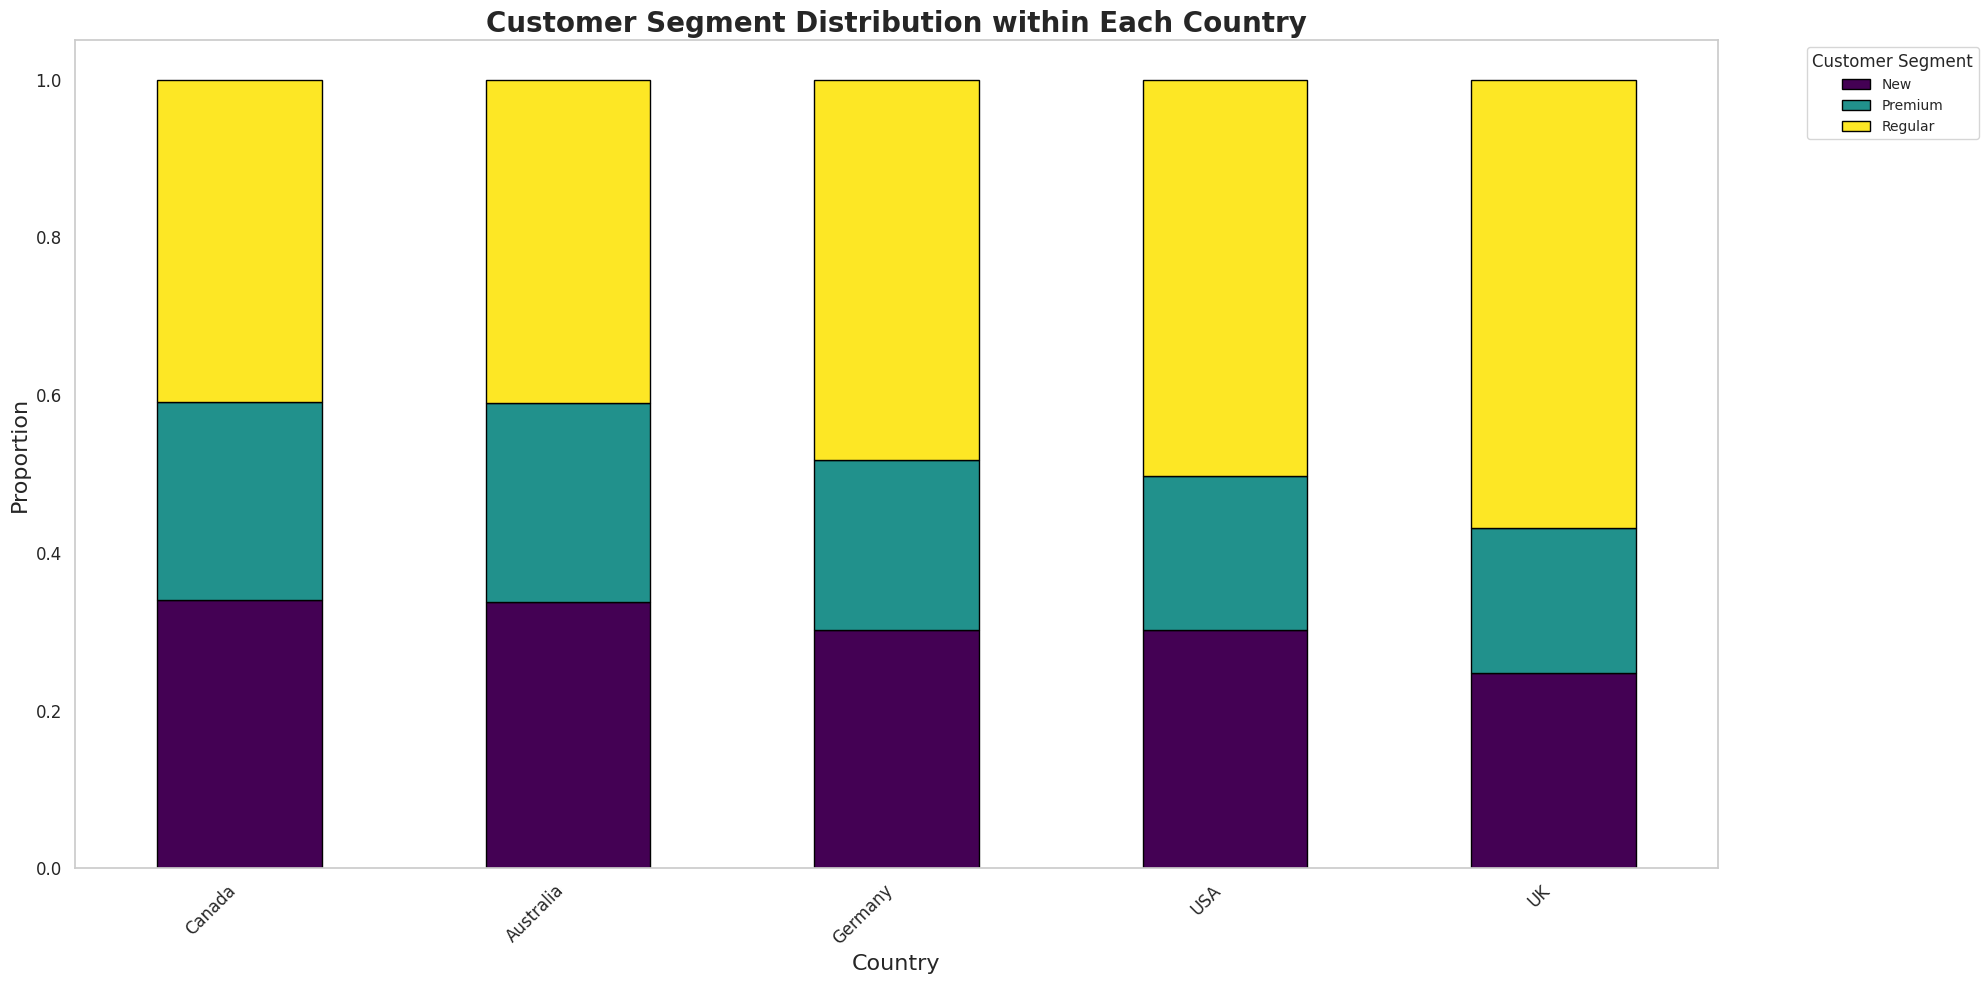

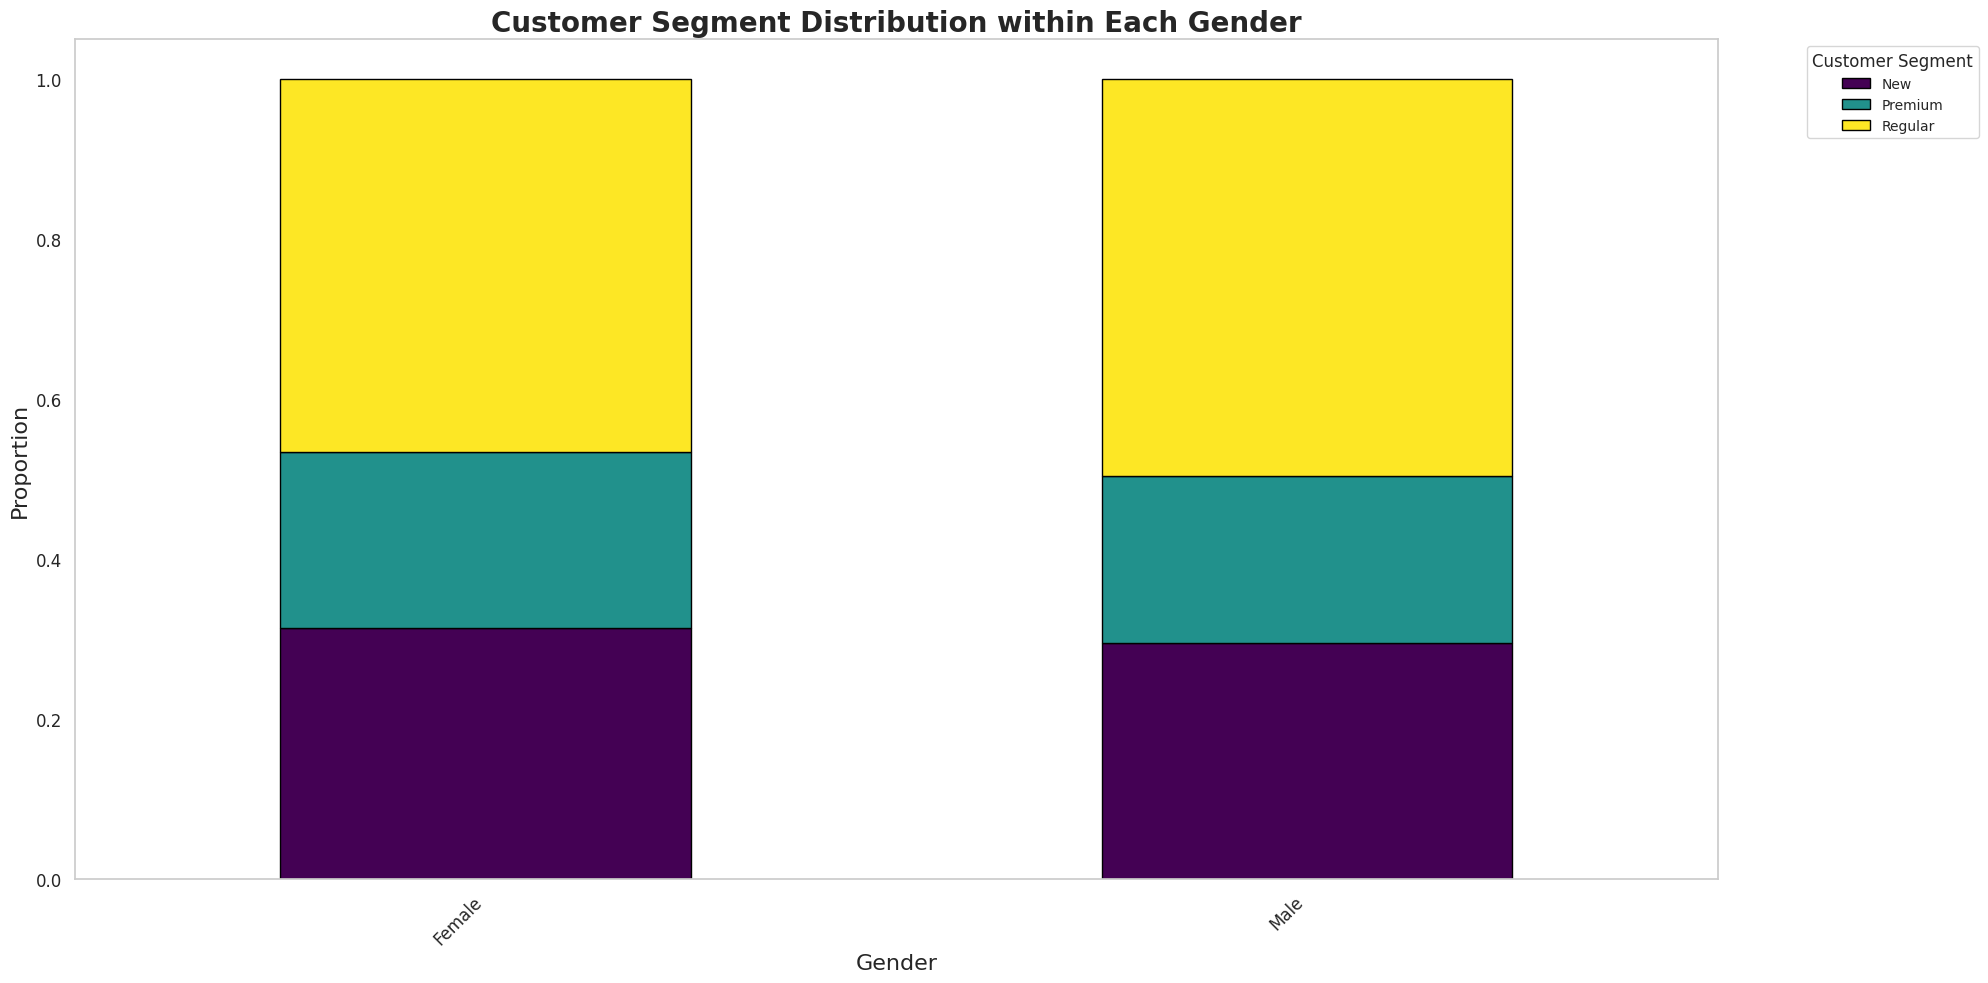

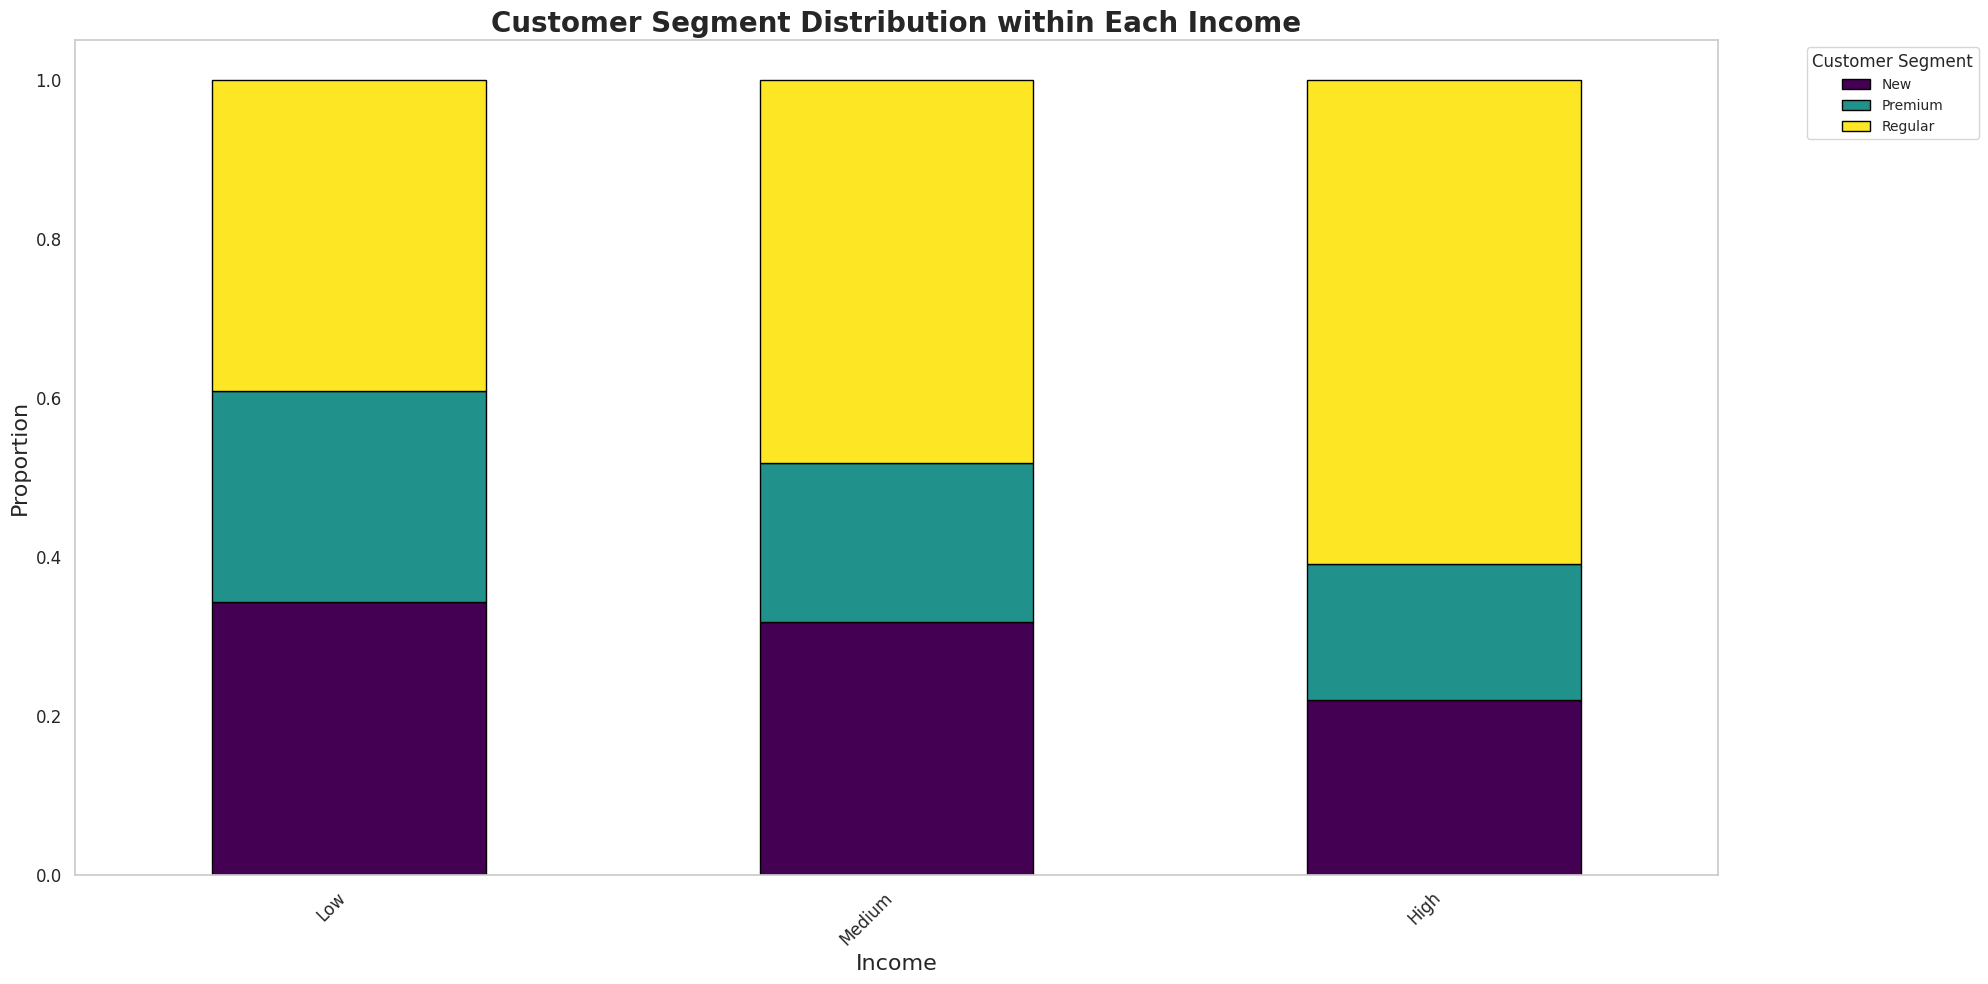

In [28]:
#List of categorical variables to analyse
categorical_val2=['Country','Gender','Income']

#Looping through each variable
for var in categorical_val2:
    # --- Calculate the proportion of each Customer_Segment within those categorical variables in the list ---

    # 1. Create a cross-tabulation (contingency table) of counts
    cross_tab = pd.crosstab(df[var], df['Customer_Segment'])

# 2. Convert counts to proportions (percentages) along the rows (axis=1)
# This calculates, for each categorical variable in the list, what percentage each customer segment makes up of its total.
    percentage_cross_tab = cross_tab.apply(lambda r: r / r.sum(), axis=1)

# Sort values of each categorical variable by total count or alphabetically for consistent visualization (optional)
# For now, let's sort by the sum of percentages for clarity or alphabetical
    percentage_cross_tab = percentage_cross_tab.sort_values(by=percentage_cross_tab.columns[0], ascending=False)

# --- Plotting the Stacked Bar Chart ---
    plt.figure(figsize=(20, 10)) # Adjust figure size as needed

# Use the .plot() method directly on the DataFrame for convenience with stacked bars
    ax = percentage_cross_tab.plot(
       kind='bar',
       stacked=True,
       colormap='viridis', # Choose a suitable colormap
       ax=plt.gca(),       # Get current axes
       edgecolor='black'
    )

    plt.title(f'Customer Segment Distribution within Each {var}', fontsize=20, fontweight='bold')
    plt.xlabel(var, fontsize=16)
    plt.ylabel('Proportion', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12) # Rotate category names for readability
    plt.yticks(fontsize=12)
    plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10) # Place legend outside
    plt.grid(False) # Only y-grid makes sense for stacked bars

    plt.tight_layout() # Adjust layout to prevent labels/titles from being cut off
    plt.show()

**Customer segment distributions**

These stacked bar charts illustrate the distribution of customer segments within different demographic groups.

**​Customer Segment Distribution within Each Country:** The charts show that the proportion of Regular, Premium, and New customers is fairly consistent across all countries. While there is a slight variation, it's not significant, suggesting that customer segmentation isn't strongly tied to geographic location.

**​Customer Segment Distribution within Each Gender:** The distribution of customer segments is nearly identical for both females and males. This indicates that a customer's gender does not influence whether they fall into the New, Regular, or Premium segments.

**​Customer Segment Distribution within Each Income:** This chart shows an interesting insight. While the Regular customer segment is the largest across all income levels, the proportion of Premium customers is relatively higher among Low income individuals. The proportion of New customers is slightly higher among Low income individuals.

**Visualing The Distributions of Ratings**

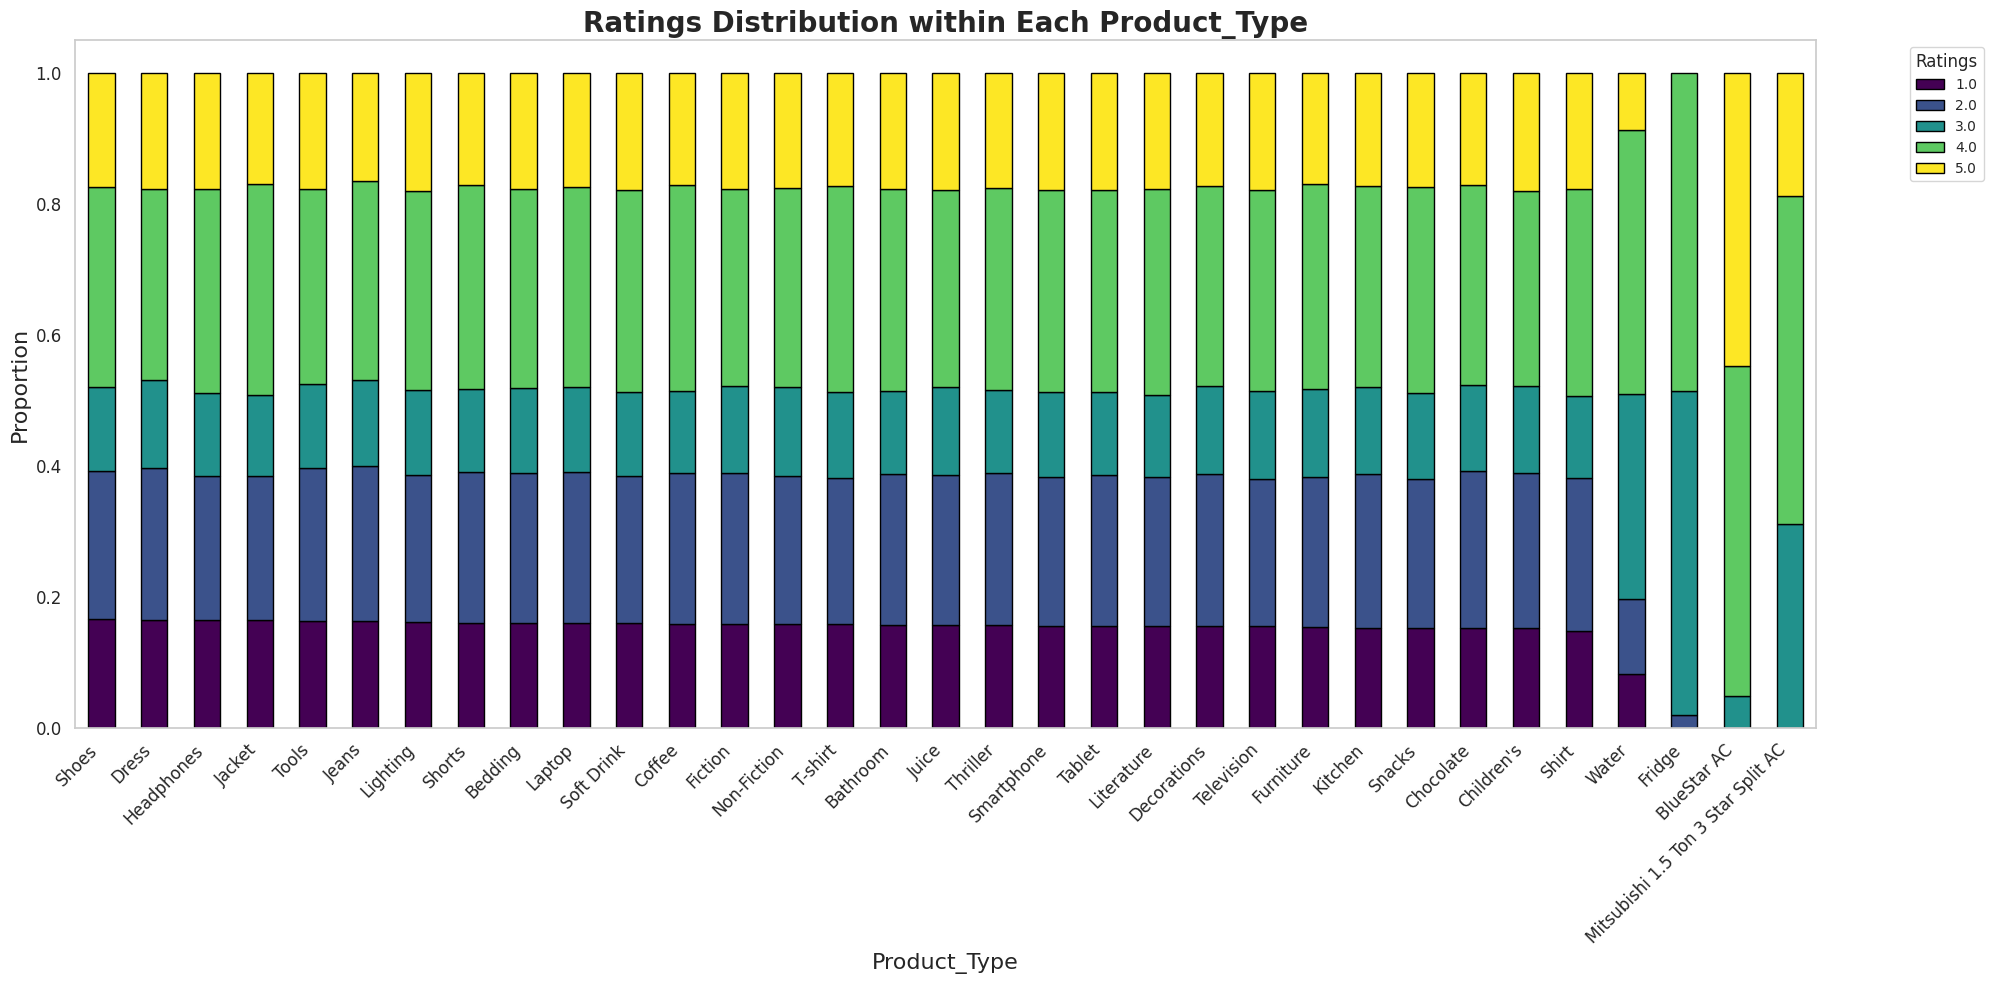

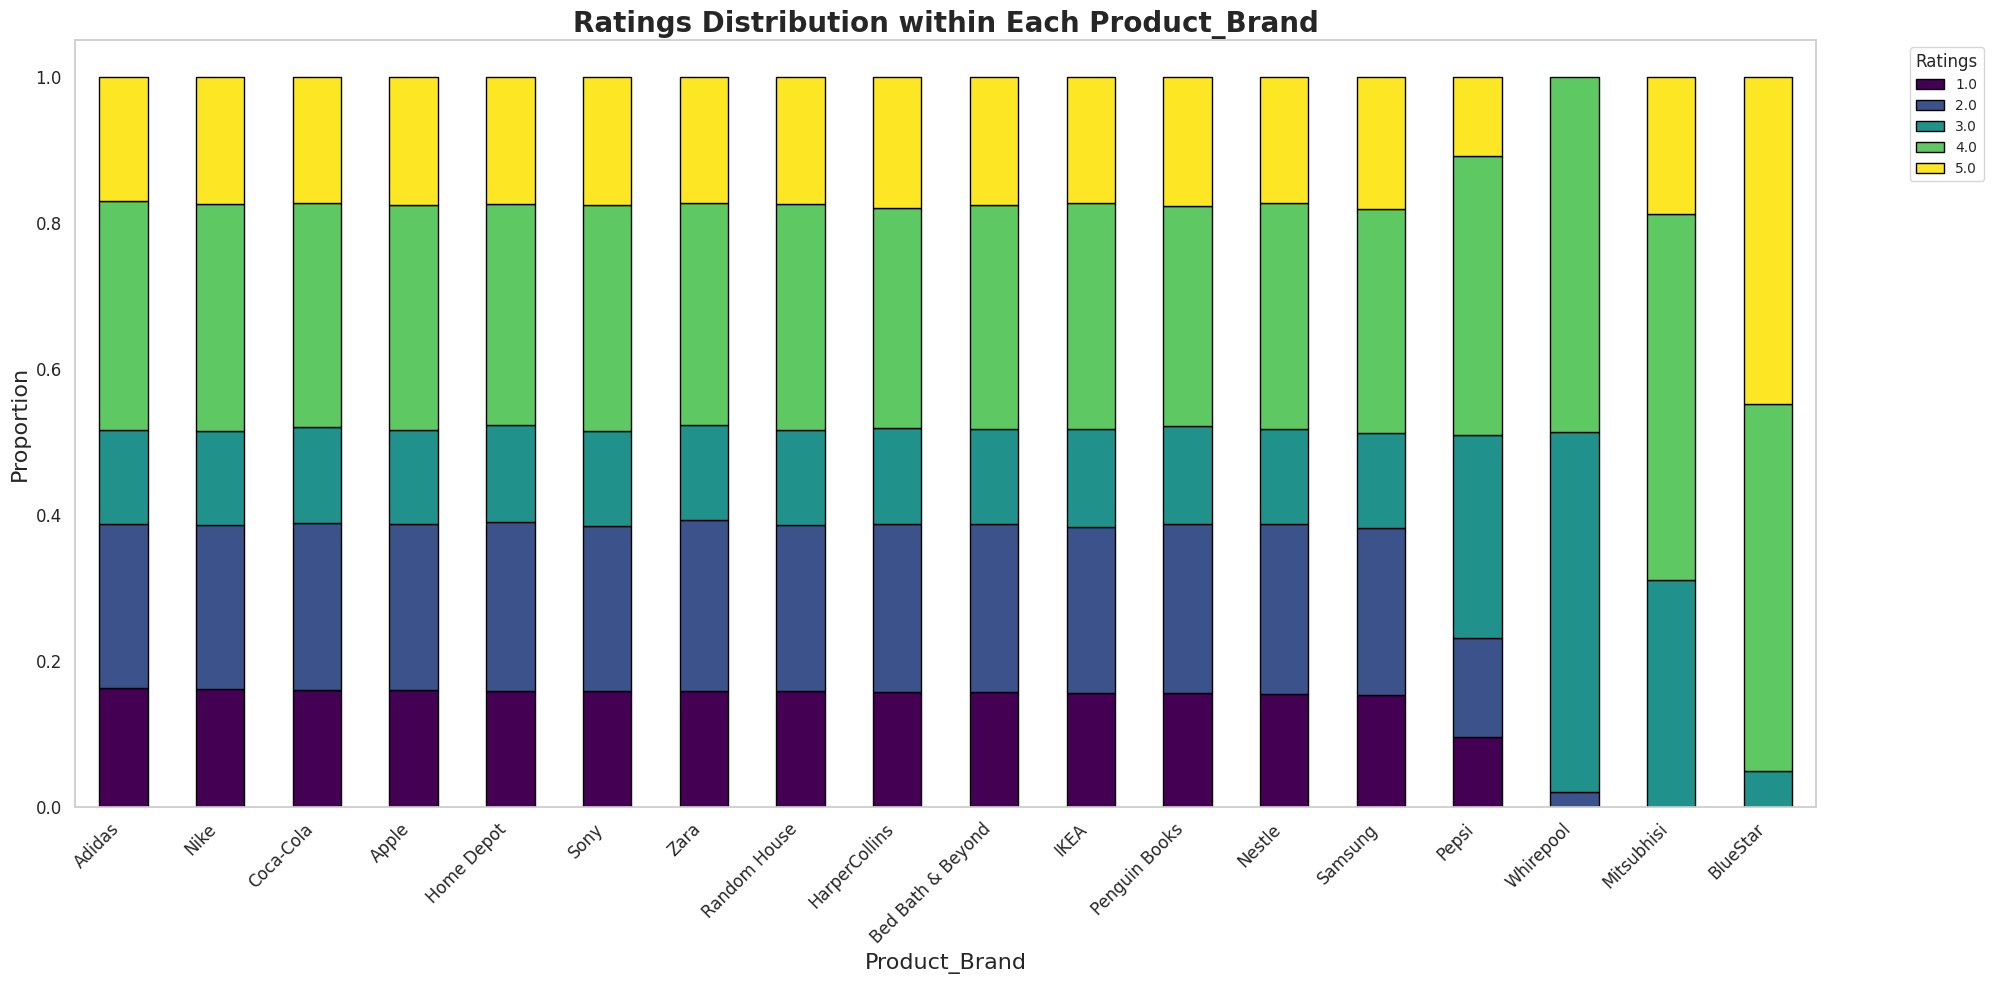

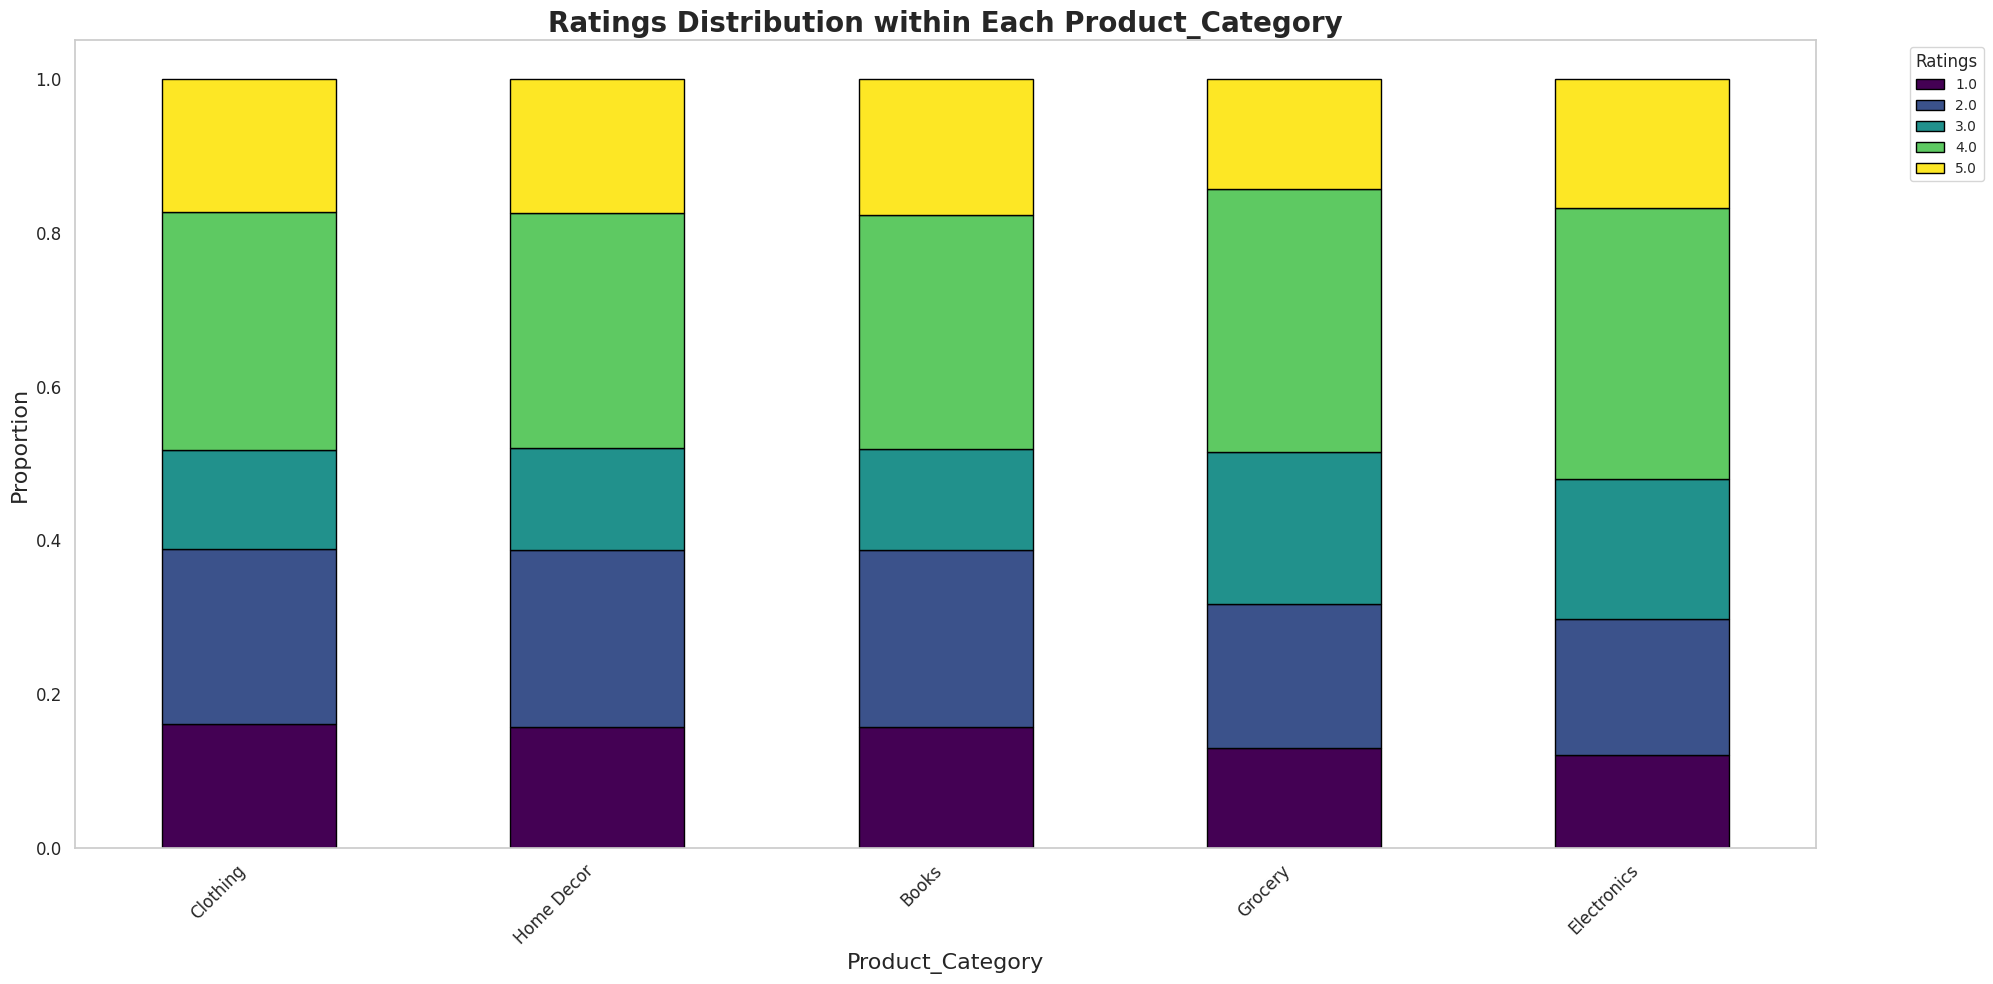

In [29]:
#List of categorical variables to analyse
categorical_val3=['Product_Type','Product_Brand','Product_Category']

#Looping through each variable
for var in categorical_val3:
    # --- Calculate the Ratings of each Customer_Segment within those categorical variables in the list ---

    # 1. Create a cross-tabulation (contingency table) of counts
    cross_tab = pd.crosstab(df[var], df['Ratings'])

# 2. Convert counts to Ratings (percentages) along the rows (axis=1)
# This calculates, for each categorical variable in the list, what percentage each customer segment makes up of its total.
    percentage_cross_tab = cross_tab.apply(lambda r: r / r.sum(), axis=1)

# Sort values of each categorical variable by total count or alphabetically for consistent visualization (optional)
# For now, let's sort by the sum of percentages for clarity or alphabetical
    percentage_cross_tab = percentage_cross_tab.sort_values(by=percentage_cross_tab.columns[0], ascending=False)

# --- Plotting the Stacked Bar Chart ---
    plt.figure(figsize=(20, 10)) # Adjust figure size as needed

# Use the .plot() method directly on the DataFrame for convenience with stacked bars
    ax = percentage_cross_tab.plot(
       kind='bar',
       stacked=True,
       colormap='viridis', # Choose a suitable colormap
       ax=plt.gca(),       # Get current axes
       edgecolor='black'
    )

    plt.title(f'Ratings Distribution within Each {var}', fontsize=20, fontweight='bold')
    plt.xlabel(var, fontsize=16)
    plt.ylabel('Proportion', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12) # Rotate category names for readability
    plt.yticks(fontsize=12)
    plt.legend(title='Ratings', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10) # Place legend outside
    plt.grid(False) # Only y-grid makes sense for stacked bars

    plt.tight_layout() # Adjust layout to prevent labels/titles from being cut off
    plt.show()

**Product Ratings Analysis:**

**​Ratings Distribution within Each Product Type:** Similar to the other charts, the ratings distribution is consistent across all product types. This reinforces the finding that the type of product a customer buys does not strongly influence their satisfaction level.But there are noticeabe expections for Water, Fridge, BlueStar AC, Mitsubishi 1.5 Ton 3 Star Split AC; in these categories the satisfaction levels are relatively very high.


**​Ratings Distribution within Each Product Brand:** The ratings distribution remains consistent across most of the top product brands, with no single brand showing a significantly higher or lower proportion of positive or negative ratings. This indicates that customer satisfaction is generally uniform regardless of the brand.

But there are a few brands, showing relatively higher satisfaction levels: Pepsi, Whirepool, Mitsubhisi and BlueStar. Thess observations perfectly align with the observation that in 'Ratings Distribution within Each Product Type', Fridge and AC showed higher satisfiction levels, as BlueStar, Whirepool and Mitsubhisi are producers of househlold appliances.

​**Ratings Distribution within Each Product Category:** The distribution of ratings (1.0 to 5.0) is remarkably similar across all product categories (Clothing, Home Decor, Books, Grocery, Electronics). This suggests that customer satisfaction, as reflected by ratings, is not dependent on the specific category of product purchased.

**Visualing The Distributions of Shipping Methods and Payment Methods within each Country**

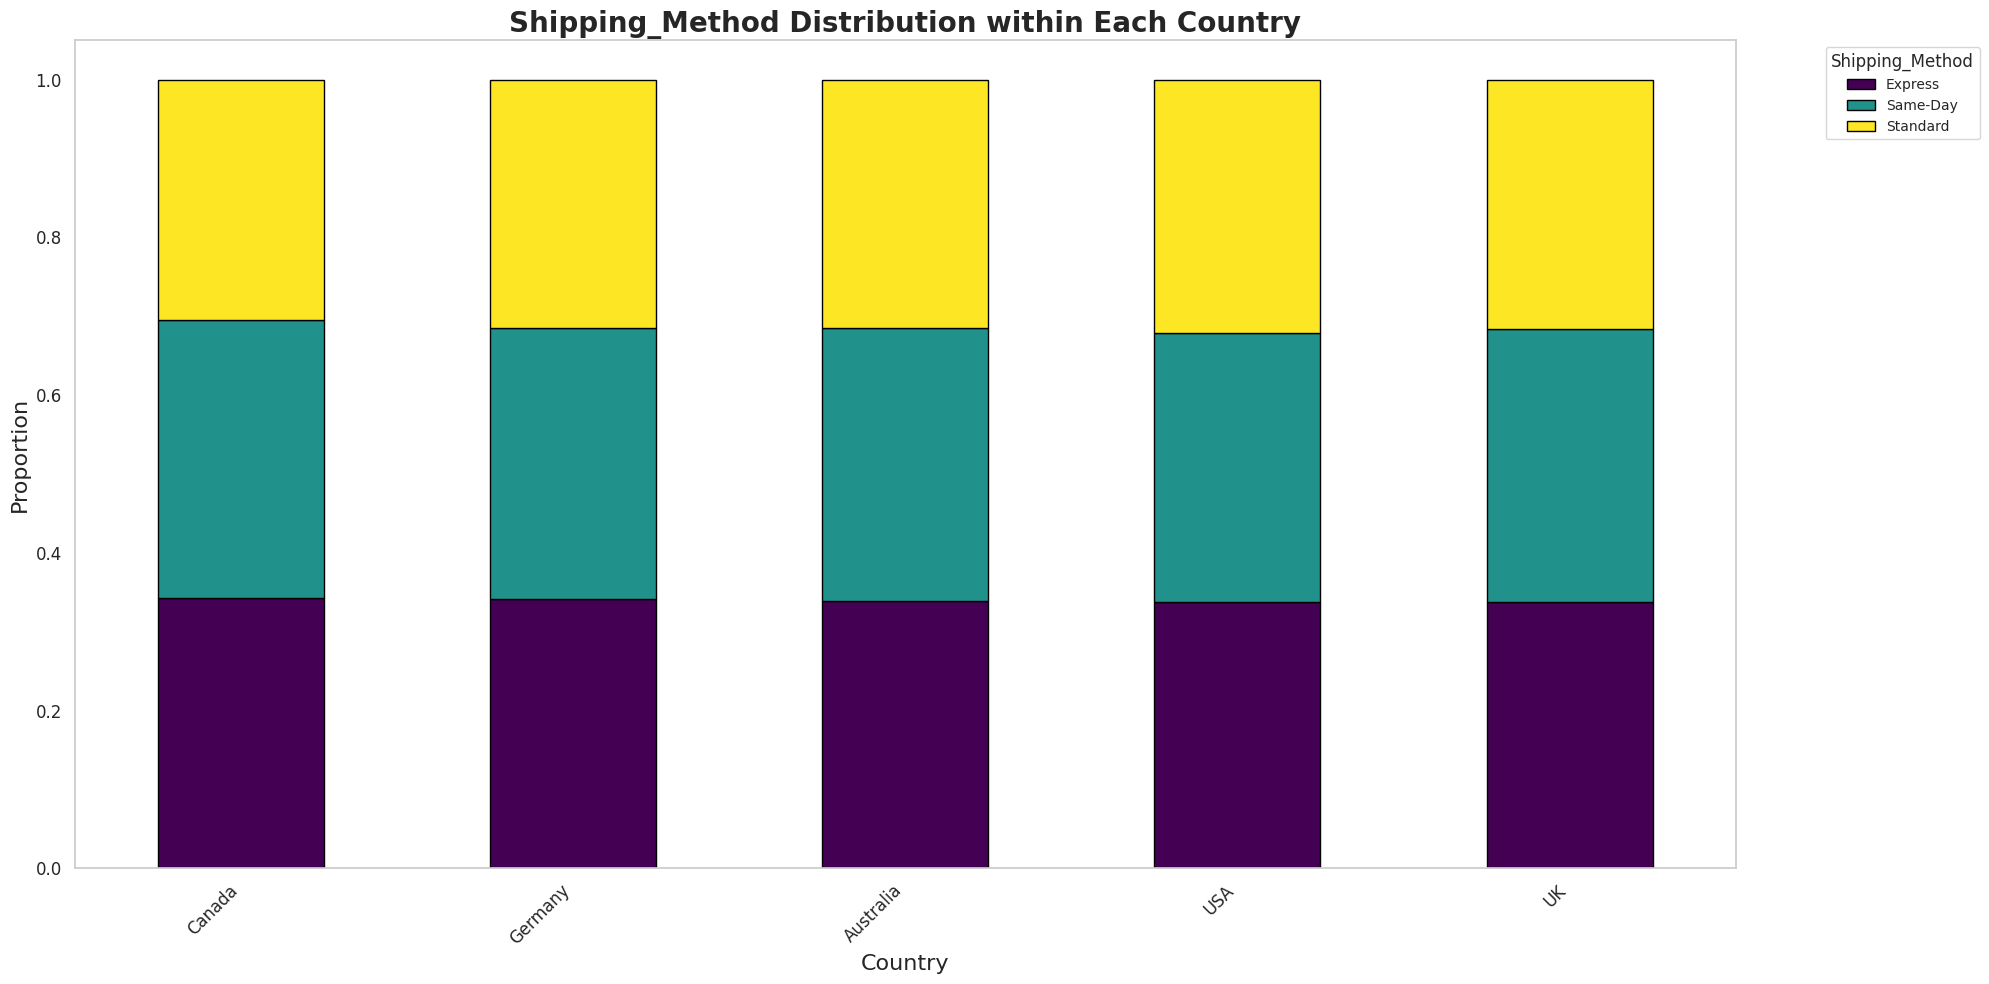

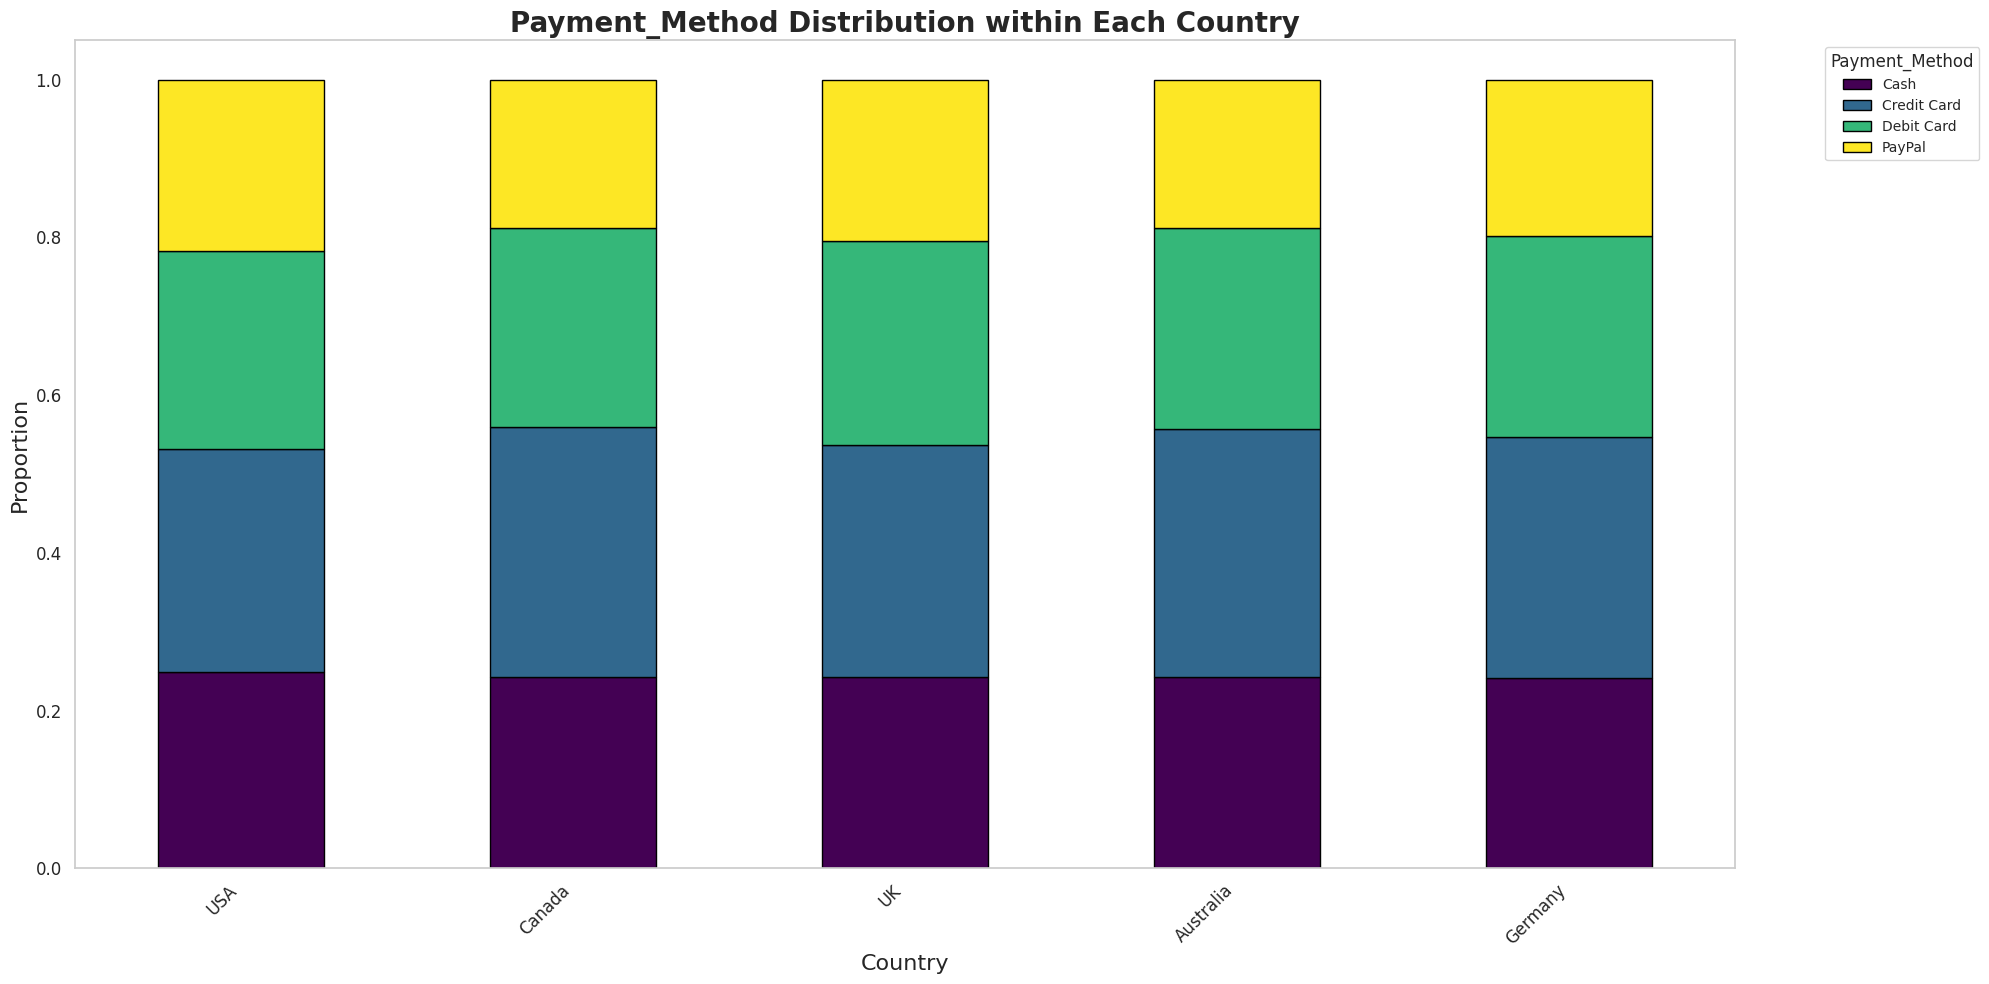

In [30]:
#List of categorical variables to analyse
categorical_val4=['Shipping_Method','Payment_Method']

#Looping through each variable
for var in categorical_val4:
    # --- Calculate the proportion of each categorical variable in the list within Country ---


    # 1. Create a cross-tabulation (contingency table) of counts
    cross_tab = pd.crosstab(df['Country'], df[var])

# 2. Convert counts to proportions (percentages) along the rows (axis=1)
# This calculates, for each country, what percentage each value of each categorical variable in the list makes up of its total.
    percentage_cross_tab = cross_tab.apply(lambda r: r / r.sum(), axis=1)

# Sort values country by total count or alphabetically for consistent visualization (optional)
# For now, let's sort by the sum of percentages for clarity or alphabetical
    percentage_cross_tab = percentage_cross_tab.sort_values(by=percentage_cross_tab.columns[0], ascending=False)

# --- Plotting the Stacked Bar Chart ---
    plt.figure(figsize=(20, 10)) # Adjust figure size as needed

# Use the .plot() method directly on the DataFrame for convenience with stacked bars
    ax = percentage_cross_tab.plot(
       kind='bar',
       stacked=True,
       colormap='viridis', # Choose a suitable colormap
       ax=plt.gca(),       # Get current axes
       edgecolor='black'
    )

    plt.title(f'{var} Distribution within Each Country', fontsize=20, fontweight='bold')
    plt.xlabel('Country', fontsize=16)
    plt.ylabel('Proportion', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12) # Rotate category names for readability
    plt.yticks(fontsize=12)
    plt.legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10) # Place legend outside
    plt.grid(False) # Only y-grid makes sense for stacked bars

    plt.tight_layout() # Adjust layout to prevent labels/titles from being cut off
    plt.show()

**Shipping Method Distribution within Each Country:** The proportion of customers using different shipping methods (Express, Same-Day, and Standard) is very similar across all countries shown (Canada, Germany, Australia, USA, UK). This suggests that shipping method preference is not significantly influenced by a customer's country.

**​Payment Method Distribution within Each Country:** The distribution of payment methods (Credit Card, Debit Card, PayPal, and Cash) is also largely consistent across the different countries. Credit Card and Debit Card are the most popular payment methods in all countries, with slight variations in the proportion of cash or PayPal usage. This indicates that the preference for electronic payments is a global trend among customers.

**Visualing The Distributions of Feedback within each Method of Shipping & Payment**

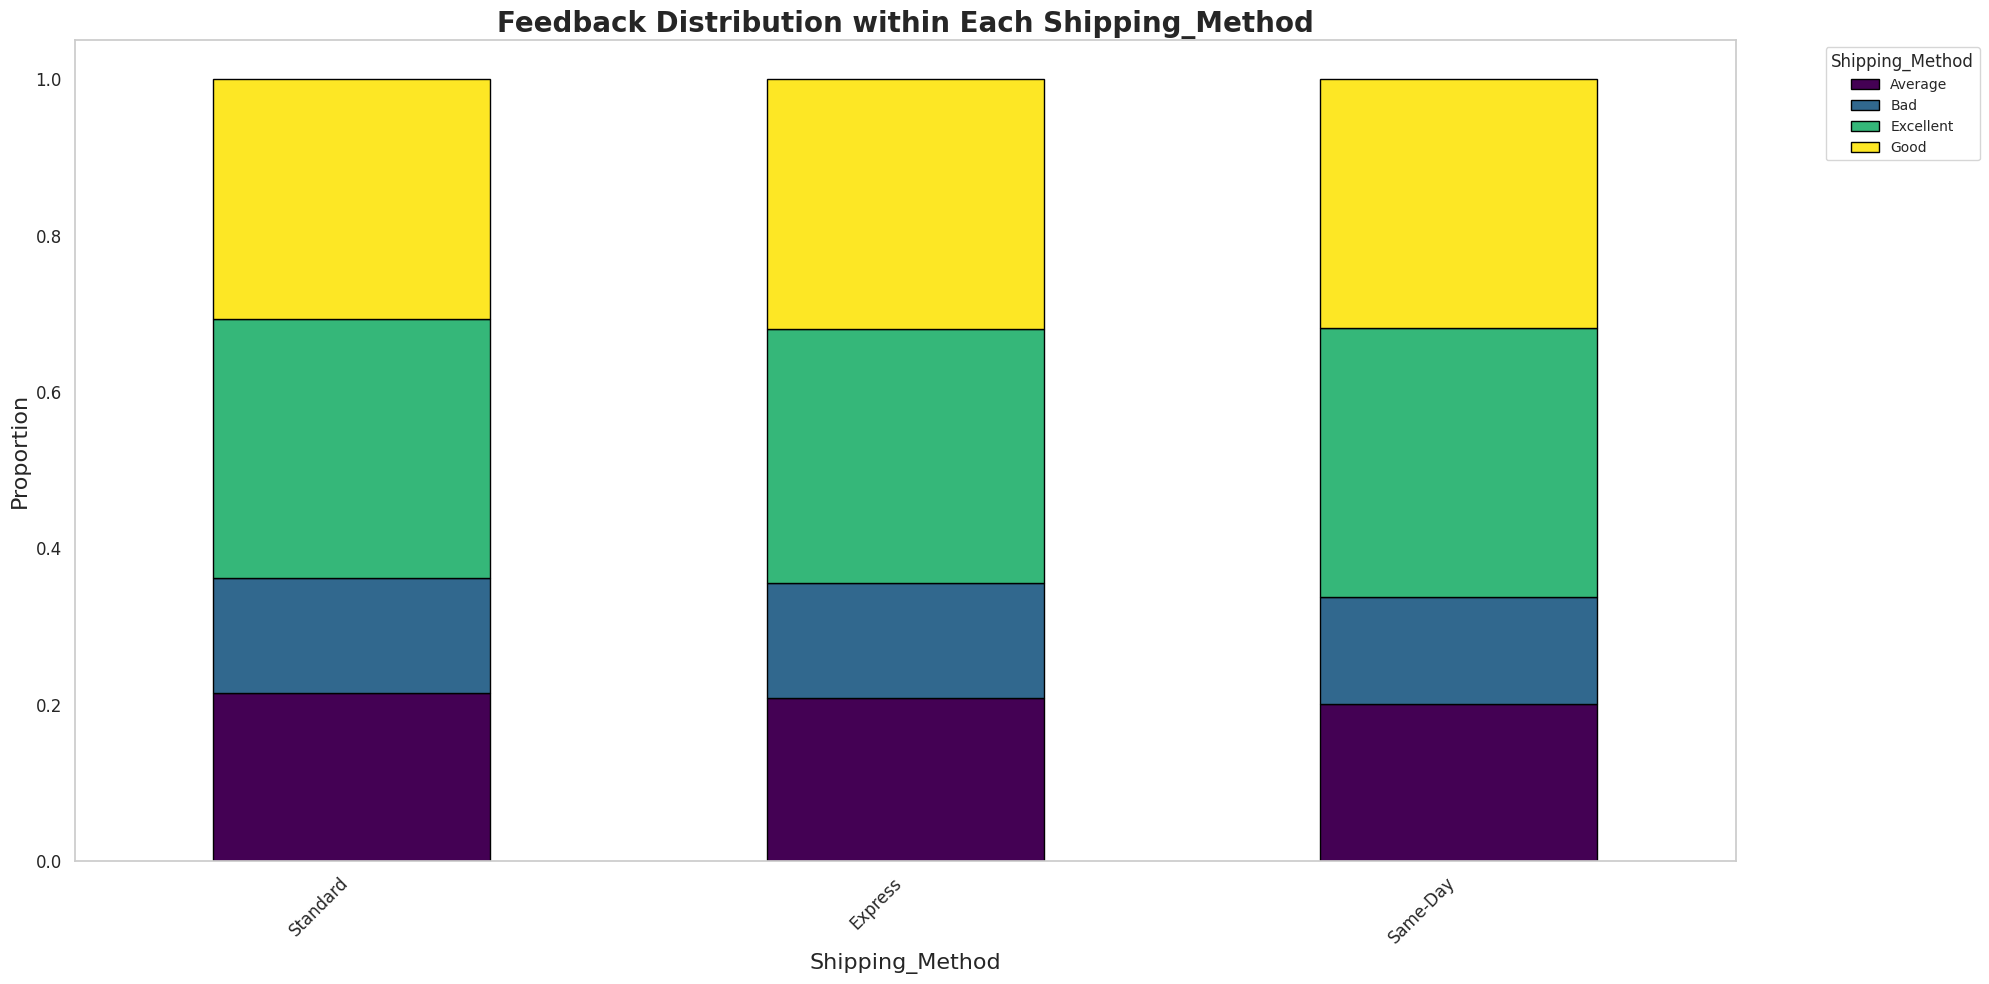

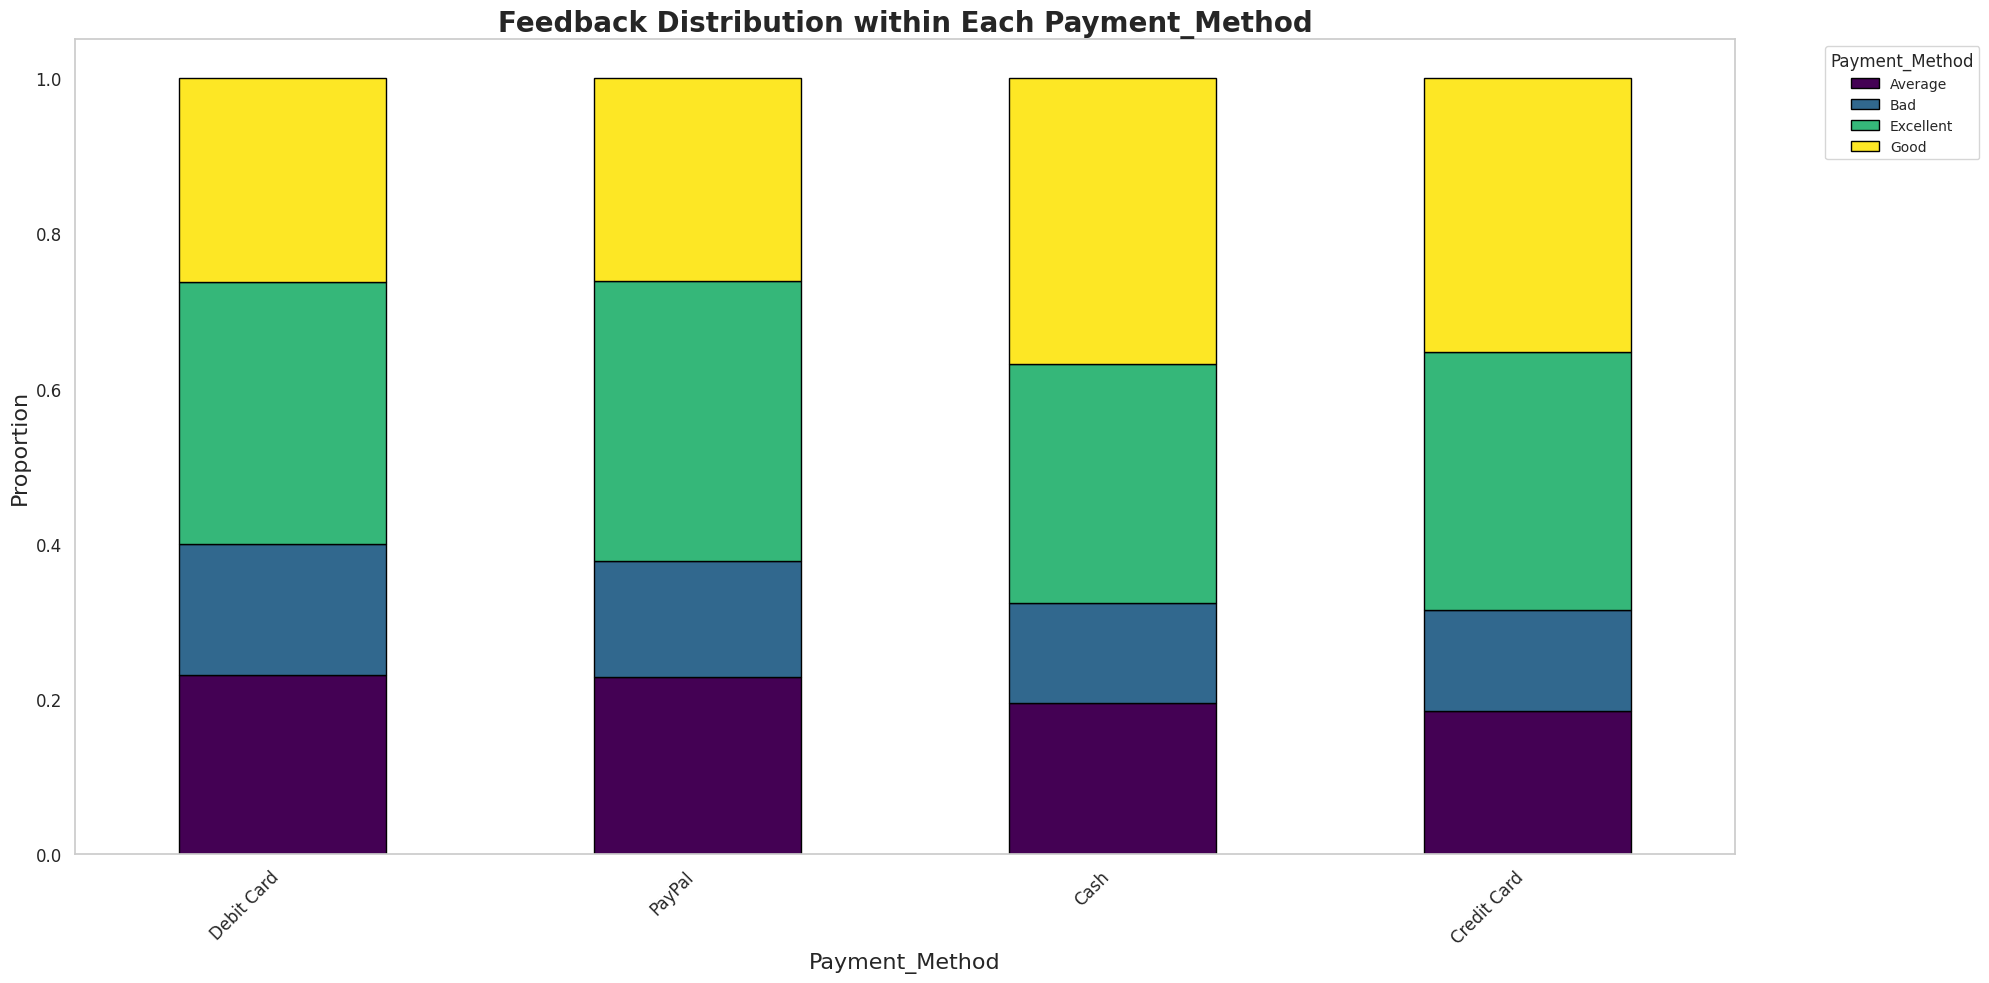

In [31]:
#List of categorical variables to analyse
categorical_val5=['Shipping_Method','Payment_Method']

#Looping through each variable
for var in categorical_val5:
    # --- Calculate the proportion of Feedback within each categorical variable in the list ---

    # 1. Create a cross-tabulation (contingency table) of counts
    cross_tab = pd.crosstab(df[var], df['Feedback'])

# 2. Convert counts to proportions (percentages) along the rows (axis=1)
# This calculates, for each categorical variable in the list, what percentage each value of Feedback makes up of its total.
    percentage_cross_tab = cross_tab.apply(lambda r: r / r.sum(), axis=1)

# Sort values country by total count or alphabetically for consistent visualization (optional)
# For now, let's sort by the sum of percentages for clarity or alphabetical
    percentage_cross_tab = percentage_cross_tab.sort_values(by=percentage_cross_tab.columns[0], ascending=False)

# --- Plotting the Stacked Bar Chart ---
    plt.figure(figsize=(20, 10)) # Adjust figure size as needed

# Use the .plot() method directly on the DataFrame for convenience with stacked bars
    ax = percentage_cross_tab.plot(
       kind='bar',
       stacked=True,
       colormap='viridis', # Choose a suitable colormap
       ax=plt.gca(),       # Get current axes
       edgecolor='black'
    )

    plt.title(f'Feedback Distribution within Each {var}', fontsize=20, fontweight='bold')
    plt.xlabel(var, fontsize=16)
    plt.ylabel('Proportion', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12) # Rotate category names for readability
    plt.yticks(fontsize=12)
    plt.legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10) # Place legend outside
    plt.grid(False) # Only y-grid makes sense for stacked bars

    plt.tight_layout() # Adjust layout to prevent labels/titles from being cut off
    plt.show()

**Interpretation**

**​Feedback Distribution within Each Shipping Method:** The distribution of feedback (Average, Bad, Excellent, Good) is consistent across all three shipping methods (Standard, Express, and Same-Day). This suggests that the speed of delivery does not significantly impact customer satisfaction.

**​Feedback Distribution within Each Payment Method:** Similarly, customer feedback is consistent regardless of the payment method used (Debit Card, PayPal, Cash, and Credit Card). This indicates that the payment process does not influence the overall customer experience or the feedback they provide.

**Visualing The Distributions of Rating within each Method of Shipping & Payment**

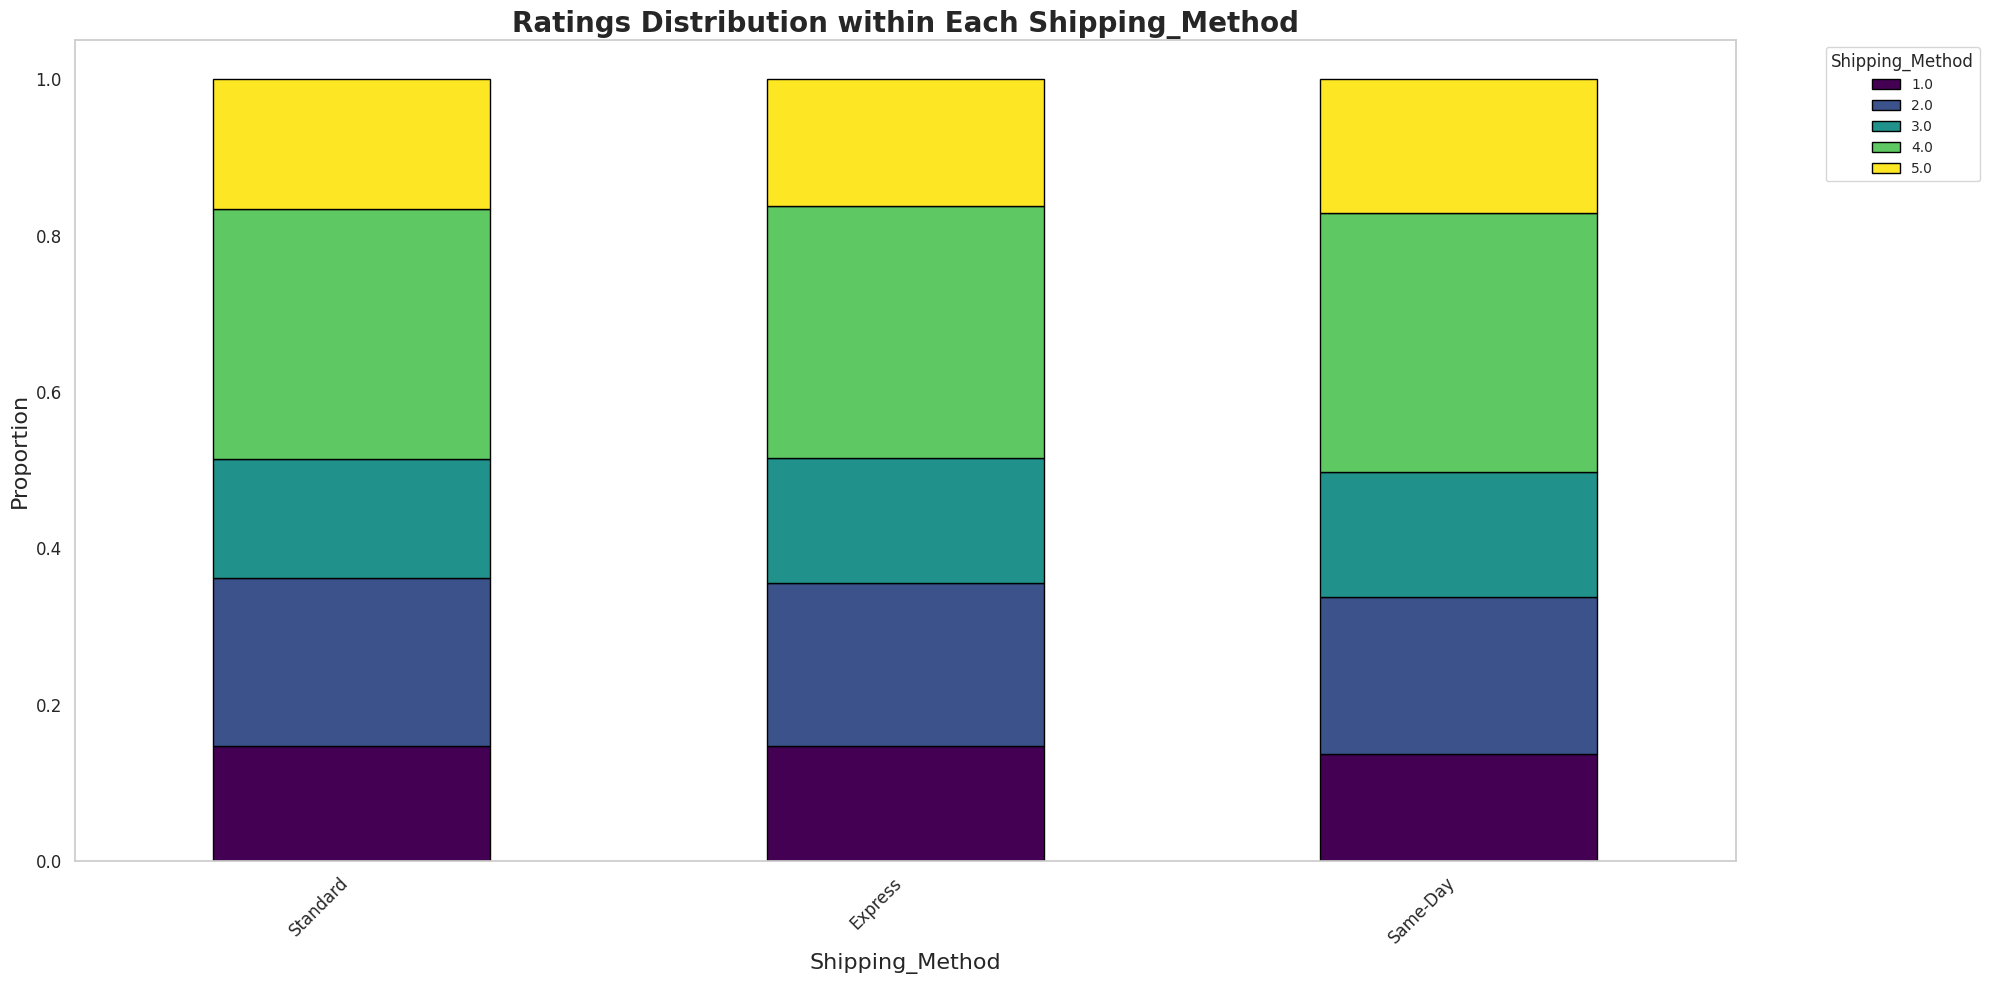

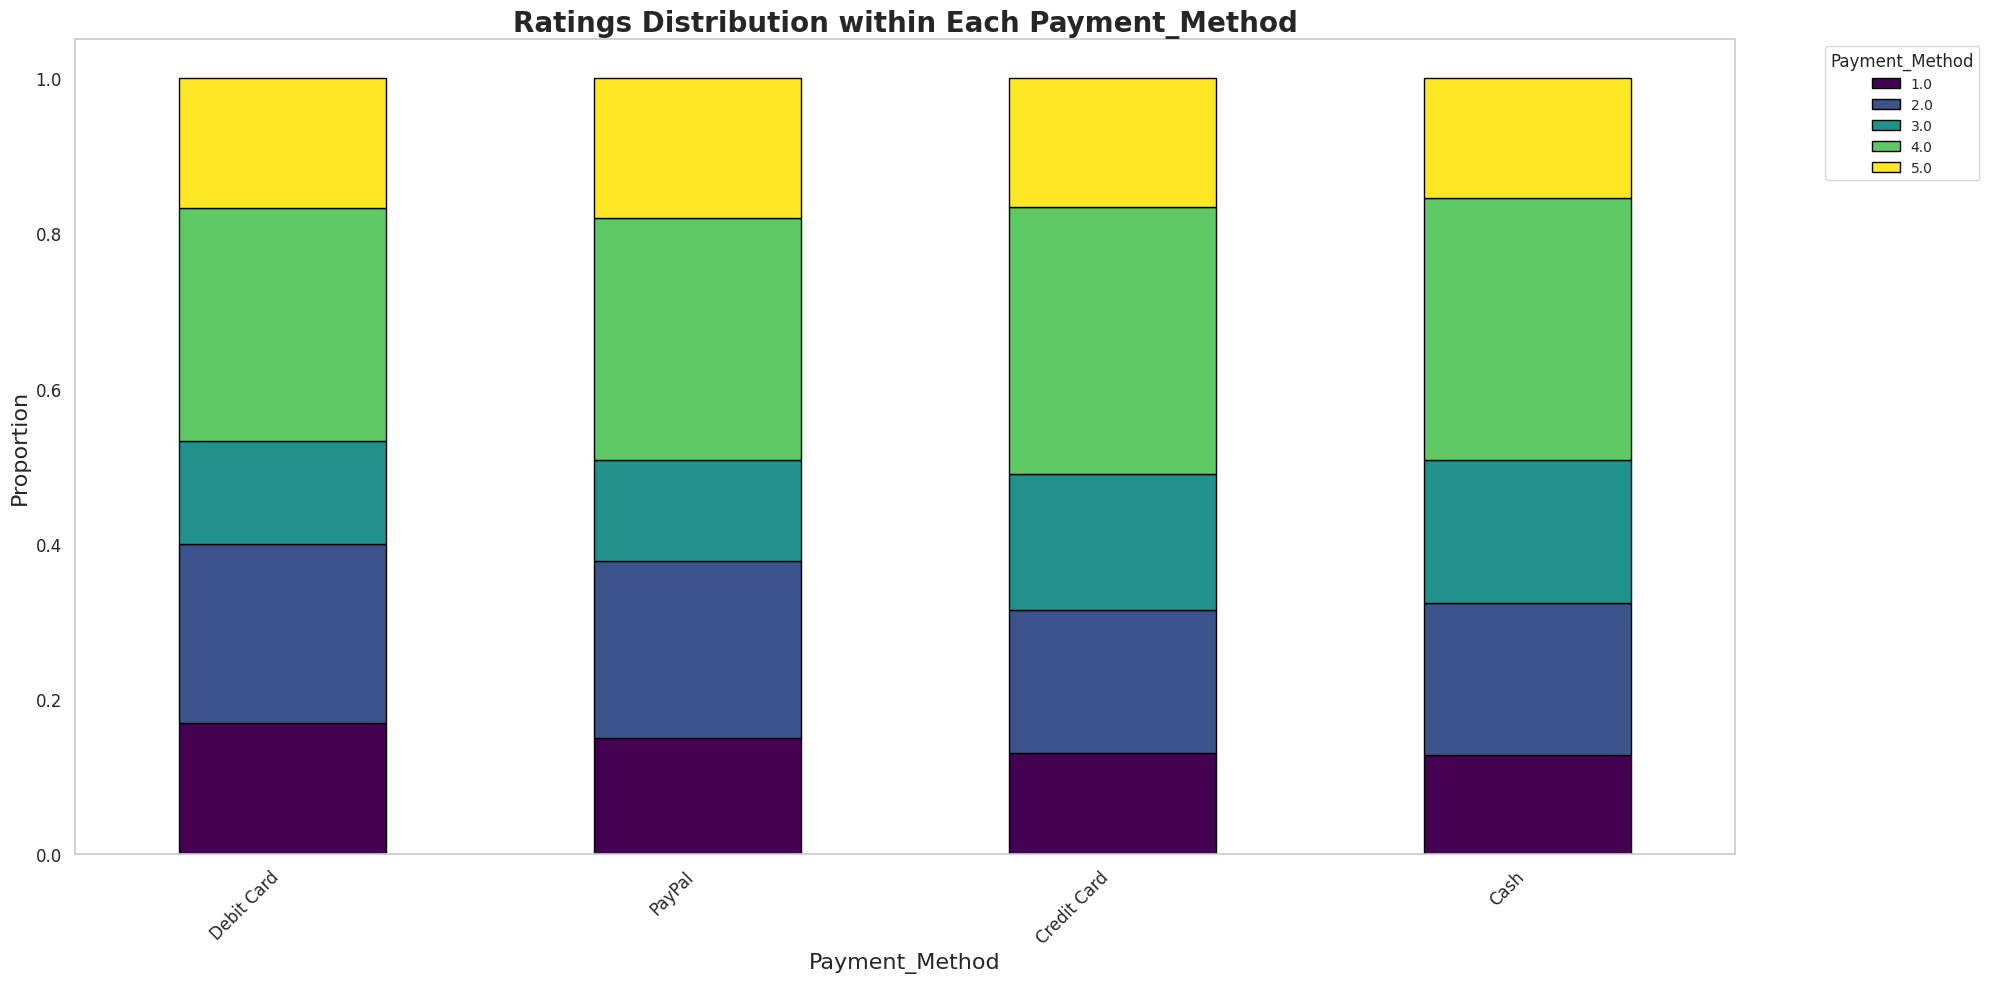

In [32]:
#List of categorical variables to analyse
categorical_val6=['Shipping_Method','Payment_Method']

#Looping through each variable
for var in categorical_val6:
    # --- Calculate the proportion of Ratings within each categorical variable in the list ---

    # 1. Create a cross-tabulation (contingency table) of counts
    cross_tab = pd.crosstab(df[var], df['Ratings'])

# 2. Convert counts to proportions (percentages) along the rows (axis=1)
# This calculates, for each categorical variable in the list, what percentage each value of Ratings makes up of its total.
    percentage_cross_tab = cross_tab.apply(lambda r: r / r.sum(), axis=1)

# Sort values country by total count or alphabetically for consistent visualization (optional)
# For now, let's sort by the sum of percentages for clarity or alphabetical
    percentage_cross_tab = percentage_cross_tab.sort_values(by=percentage_cross_tab.columns[0], ascending=False)

# --- Plotting the Stacked Bar Chart ---
    plt.figure(figsize=(20, 10)) # Adjust figure size as needed

# Use the .plot() method directly on the DataFrame for convenience with stacked bars
    ax = percentage_cross_tab.plot(
       kind='bar',
       stacked=True,
       colormap='viridis', # Choose a suitable colormap
       ax=plt.gca(),       # Get current axes
       edgecolor='black'
    )

    plt.title(f'Ratings Distribution within Each {var}', fontsize=20, fontweight='bold')
    plt.xlabel(var, fontsize=16)
    plt.ylabel('Proportion', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12) # Rotate category names for readability
    plt.yticks(fontsize=12)
    plt.legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10) # Place legend outside
    plt.grid(False) # Only y-grid makes sense for stacked bars

    plt.tight_layout() # Adjust layout to prevent labels/titles from being cut off
    plt.show()

**Analysis of Ratings vs. Transactional Factors**

**​Ratings Distribution within Each Payment Method:** The distribution of ratings (1.0 to 5.0) is remarkably consistent across all payment methods (Debit Card, PayPal, Credit Card, and Cash). This indicates that the method a customer uses to pay does not influence their satisfaction with the product or service.

**​Ratings Distribution within Each Shipping Method:** Similarly, the ratings distribution is almost identical across all three shipping methods (Standard, Express, and Same-Day). This suggests that the speed of delivery does not have a significant impact on how a customer rates their overall experience.

**Visualing The Distributions of Shipping Method and Payment Method within each Customer Segment**

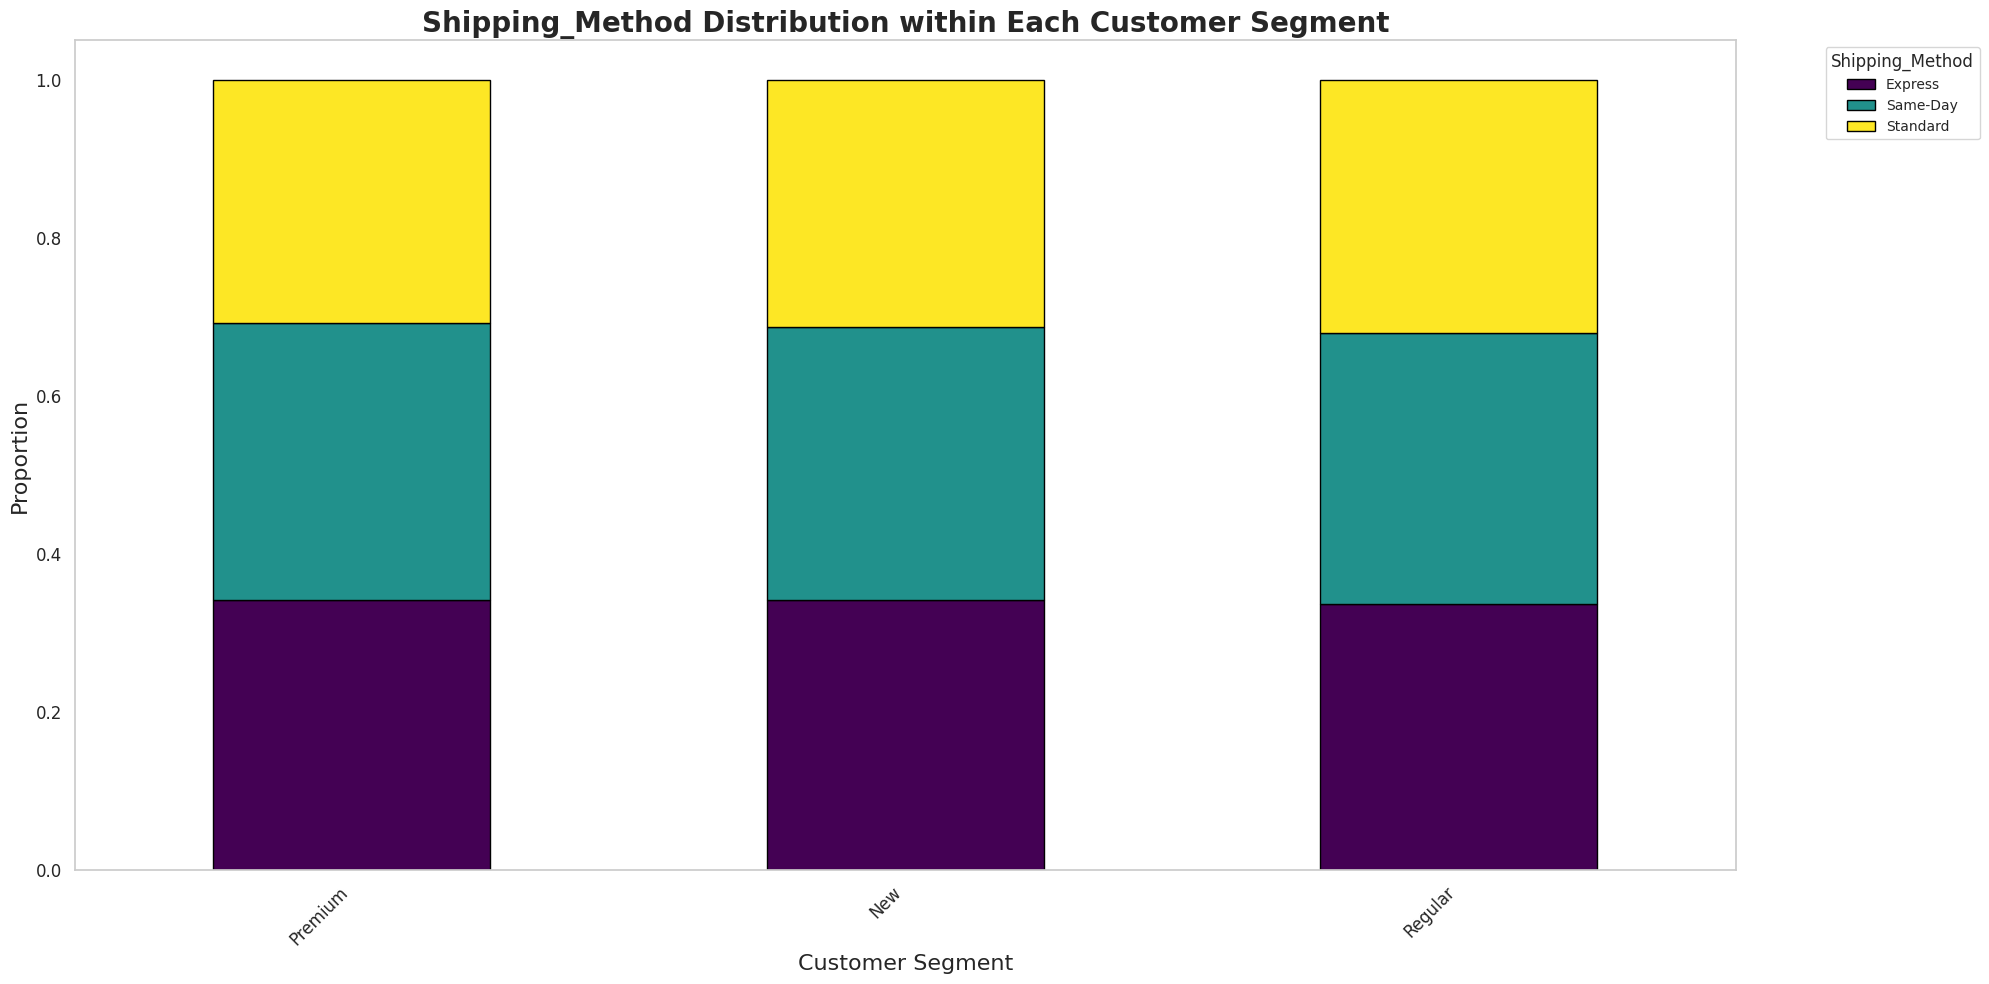

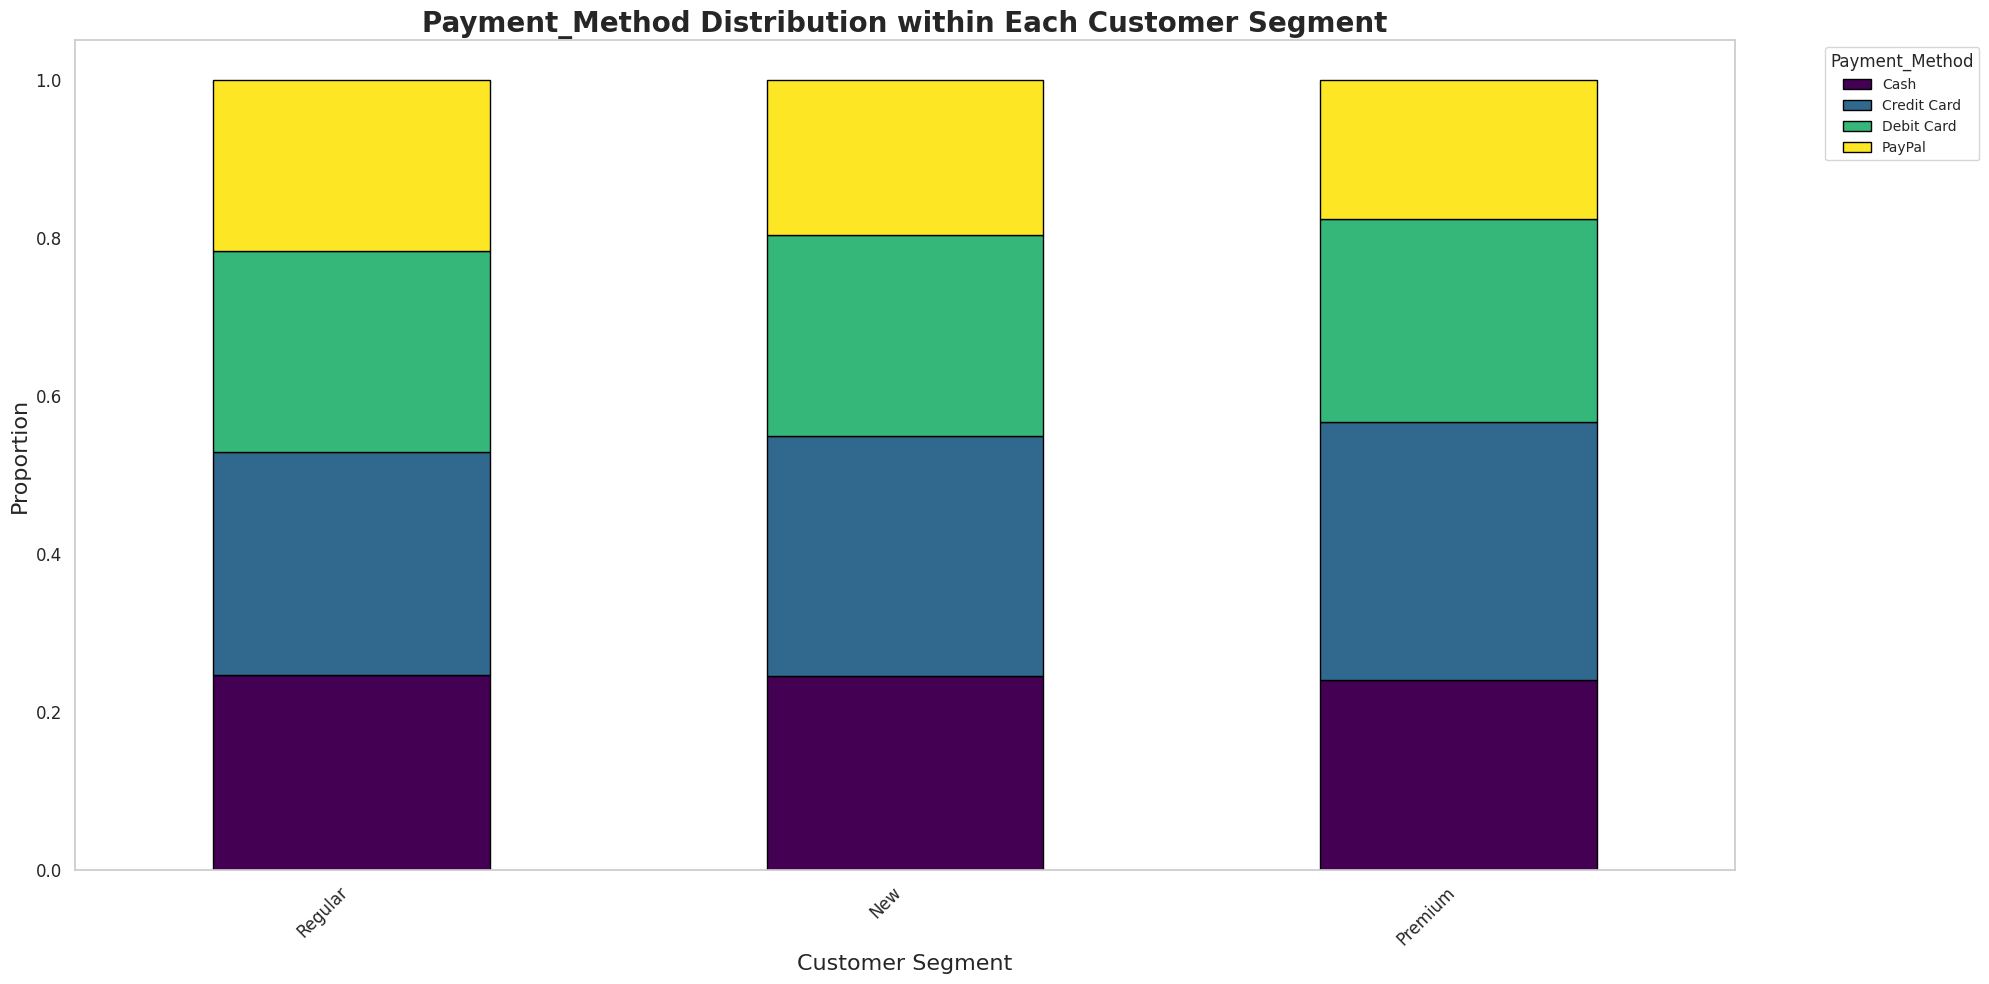

In [33]:
#List of categorical variables to analyse
categorical_val5=['Shipping_Method','Payment_Method']

#Looping through each variable
for var in categorical_val5:
    # --- Calculate the proportion of each categorical variable in the list within Customer_Segment ---


    # 1. Create a cross-tabulation (contingency table) of counts
    cross_tab = pd.crosstab(df['Customer_Segment'], df[var])

# 2. Convert counts to proportions (percentages) along the rows (axis=1)
# This calculates, for each Customer_Segment, what percentage each value of each categorical variable in the list makes up of its total.
    percentage_cross_tab = cross_tab.apply(lambda r: r / r.sum(), axis=1)

# Sort values Customer_Segment by total count or alphabetically for consistent visualization (optional)
# For now, let's sort by the sum of percentages for clarity or alphabetical
    percentage_cross_tab = percentage_cross_tab.sort_values(by=percentage_cross_tab.columns[0], ascending=False)

# --- Plotting the Stacked Bar Chart ---
    plt.figure(figsize=(20, 10)) # Adjust figure size as needed

# Use the .plot() method directly on the DataFrame for convenience with stacked bars
    ax = percentage_cross_tab.plot(
       kind='bar',
       stacked=True,
       colormap='viridis', # Choose a suitable colormap
       ax=plt.gca(),       # Get current axes
       edgecolor='black'
    )

    plt.title(f'{var} Distribution within Each Customer Segment', fontsize=20, fontweight='bold')
    plt.xlabel('Customer Segment', fontsize=16)
    plt.ylabel('Proportion', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12) # Rotate category names for readability
    plt.yticks(fontsize=12)
    plt.legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10) # Place legend outside
    plt.grid(False) # Only y-grid makes sense for stacked bars

    plt.tight_layout() # Adjust layout to prevent labels/titles from being cut off
    plt.show()

**Analysis of Customer Segment Habits:**

**​Shipping Method Distribution:** The proportion of customers using Express, Same-Day, and Standard shipping is nearly identical across all three customer segments (Premium, New, and Regular). This suggests that a customer's shipping preferences are not a defining factor of their segment and that all segments value the range of shipping options equally.

**​Payment Method Distribution:** Similarly, the distribution of payment methods (Cash, Credit Card, Debit Card, and PayPal) is very consistent across the Regular, New, and Premium customer segments. This indicates that a customer's preferred way of paying is not a factor that differentiates these segments from one another.

The distribution of order statuses within each shipping method. It reveals that the proportion of orders that are Delivered, Processing, Pending, and Shipped is nearly identical for all three shipping methods: Same-Day, Express, and Standard. This indicates that the choice of a shipping method does not significantly impact the order status. This is a positive finding, as it suggests order fulfillment process is consistent and efficient regardless of how quickly a customer wants their item delivered.

**Visualising Order Status Distribution within Each Shipping Method**

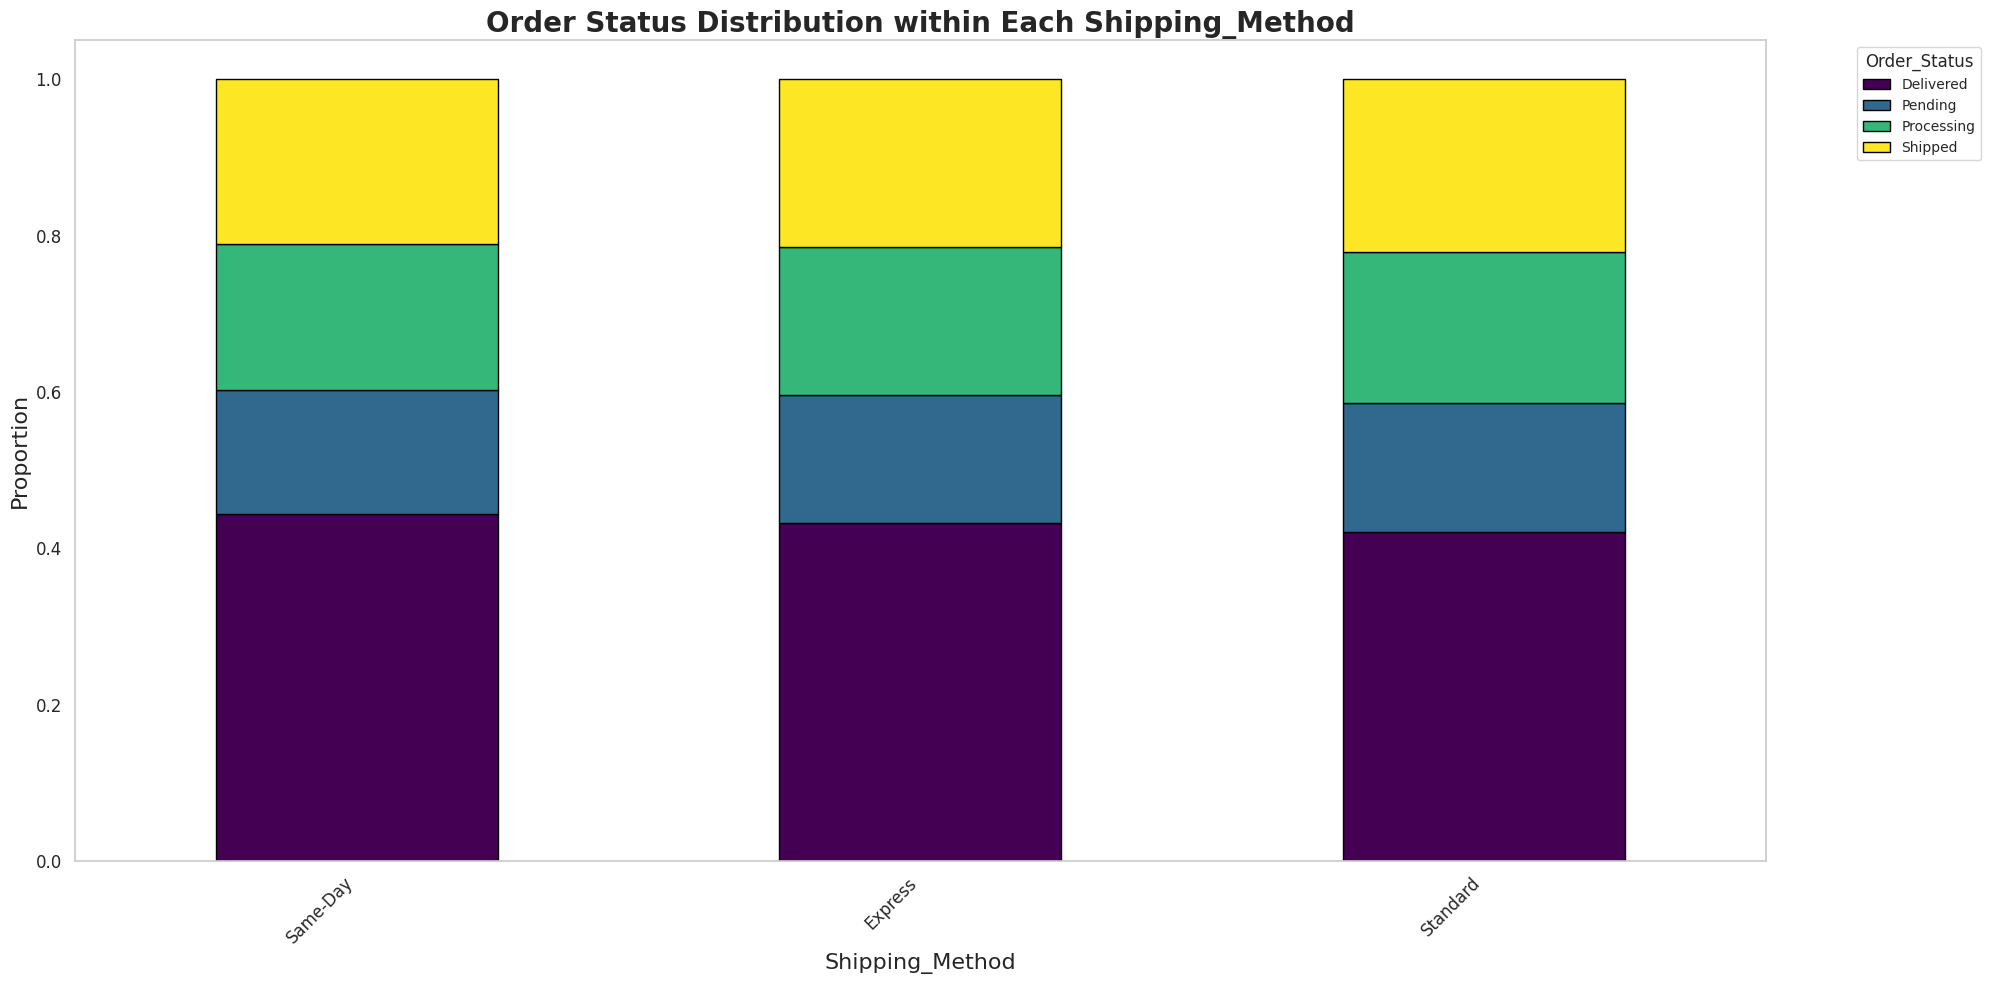

In [34]:
# --- Calculate the proportion of each Order Status within Shipping_Method ---

# 1. Create a cross-tabulation (contingency table) of counts
cross_tab = pd.crosstab(df['Shipping_Method'], df['Order_Status'])

# 2. Convert counts to proportions (percentages) along the rows (axis=1)
# This calculates, for each Shipping_Method, what percentage each value Order Status makes up of its total.
percentage_cross_tab = cross_tab.apply(lambda r: r / r.sum(), axis=1)

# Sort values Shipping_Method by total count or alphabetically for consistent visualization (optional)
# For now, let's sort by the sum of percentages for clarity or alphabetical
percentage_cross_tab = percentage_cross_tab.sort_values(by=percentage_cross_tab.columns[0], ascending=False)

# --- Plotting the Stacked Bar Chart ---
plt.figure(figsize=(20, 10)) # Adjust figure size as needed

# Use the .plot() method directly on the DataFrame for convenience with stacked bars
ax = percentage_cross_tab.plot(
       kind='bar',
       stacked=True,
       colormap='viridis', # Choose a suitable colormap
       ax=plt.gca(),       # Get current axes
       edgecolor='black'
    )
plt.title('Order Status Distribution within Each Shipping_Method', fontsize=20, fontweight='bold')
plt.xlabel('Shipping_Method', fontsize=16)
plt.ylabel('Proportion', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12) # Rotate category names for readability
plt.yticks(fontsize=12)
plt.legend(title='Order_Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10) # Place legend outside
plt.grid(False) # Only y-grid makes sense for stacked bars

plt.tight_layout() # Adjust layout to prevent labels/titles from being cut off
plt.show()

**The distribution of order statuses within each shipping method:**

 It reveals that the proportion of orders that are Delivered, Processing, Pending, and Shipped is nearly identical for all three shipping methods: Same-Day, Express, and Standard. This indicates that the choice of a shipping method does not significantly impact the order status. This is a positive finding, as it suggests order fulfillment process is consistent and efficient regardless of how quickly a customer wants their item delivered.

**10. Multivariate Analysis**

**Visualising Average Amount Spent by Age and Income Group**

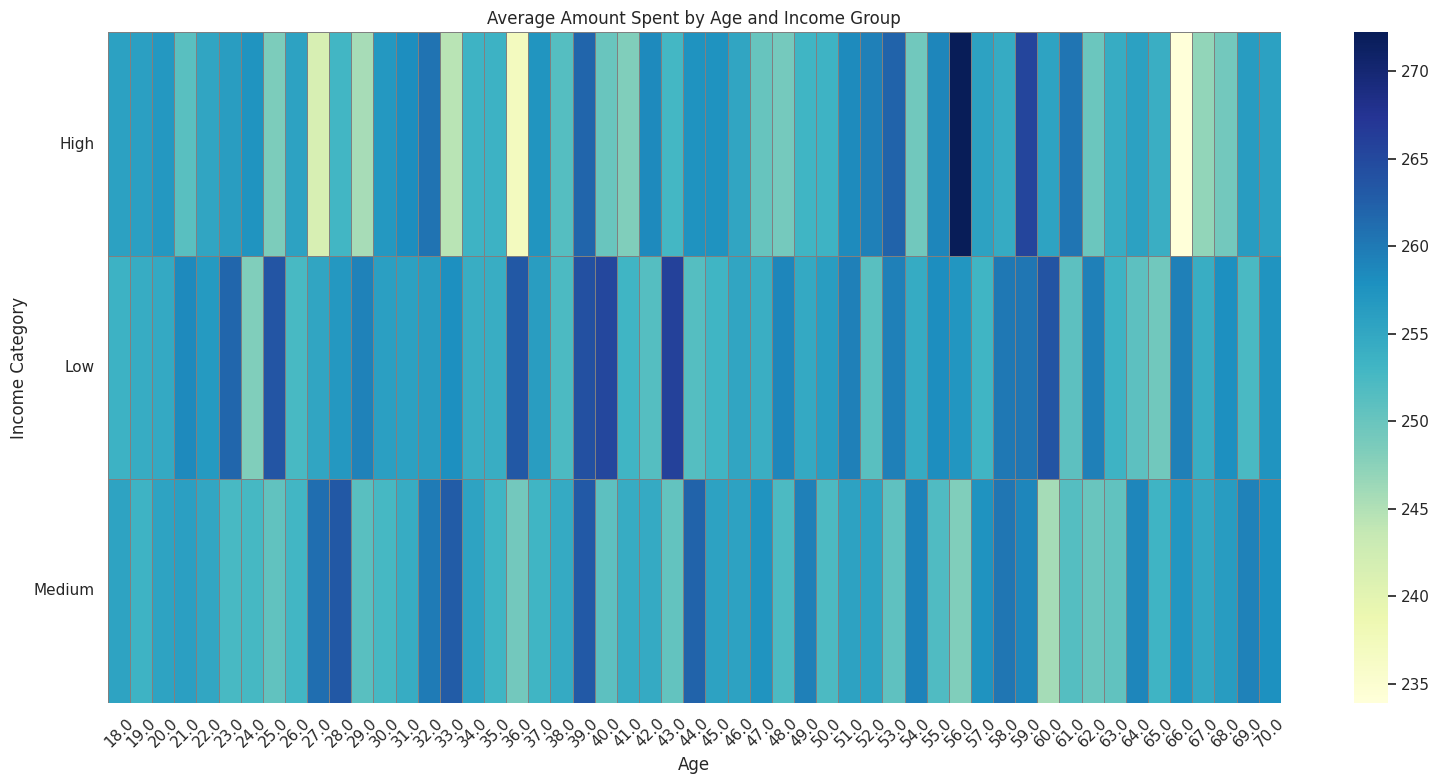

In [35]:
# Step 1: Group by Age and Income, then calculate mean Amount
pivot_df = df.groupby(['Age', 'Income'])['Amount'].mean().reset_index()

# Step 2: Pivot the data for heatmap format
heatmap_data = pivot_df.pivot(index='Income', columns='Age', values='Amount')

# Step 3: Plot the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5, linecolor='gray')

plt.title('Average Amount Spent by Age and Income Group')
plt.xlabel('Age')
plt.ylabel('Income Category')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Average Amount Spent by Age and Income Group**

​This heat map visualizes the average amount spent by customer age and income category. The darker colors represent higher average spending. It's clear that average spending is generally consistent across all income groups and ages, with most values clustering around the $250-260 range. However, there are a few notable instances of higher spending, particularly for High income customers around the age of 57 and 39.


**Visualising Total Purchases by Product Category and Customer Segment**

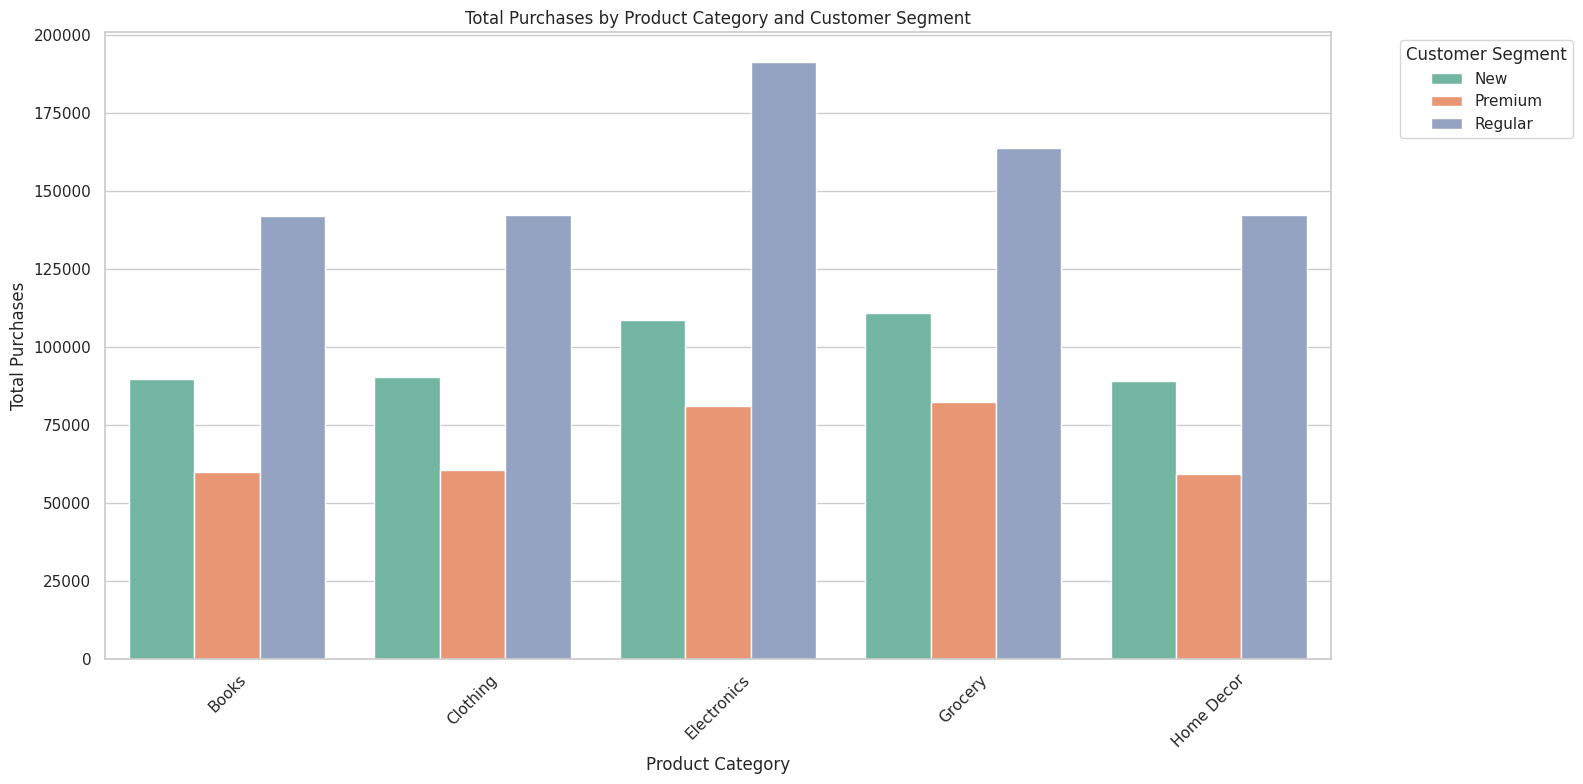

In [36]:
# Step 1: Aggregate total purchases by Product_Category and Customer_Segment
grouped_df = df.groupby(['Product_Category', 'Customer_Segment'])['Total_Purchases'].sum().reset_index()

# Step 2: Plot grouped bar chart
plt.figure(figsize=(16, 8))
sns.barplot(data=grouped_df, x='Product_Category', y='Total_Purchases', hue='Customer_Segment', palette='Set2')

plt.title('Total Purchases by Product Category and Customer Segment')
plt.xlabel('Product Category')
plt.ylabel('Total Purchases')
plt.xticks(rotation=45)
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Total Purchases by Product Category and Customer Segment**

​This grouped bar chart displays the total number of purchases for each product category, broken down by customer segment. The Regular customer segment consistently makes the highest number of purchases across all product categories, followed by the New segment. The Premium segment makes the fewest purchases. This indicates that the business relies heavily on its regular customer base for sales volume, while there's a smaller, but still valuable, group of new and premium customers.

**Visualising Monthly Sales Trends by Product Type**

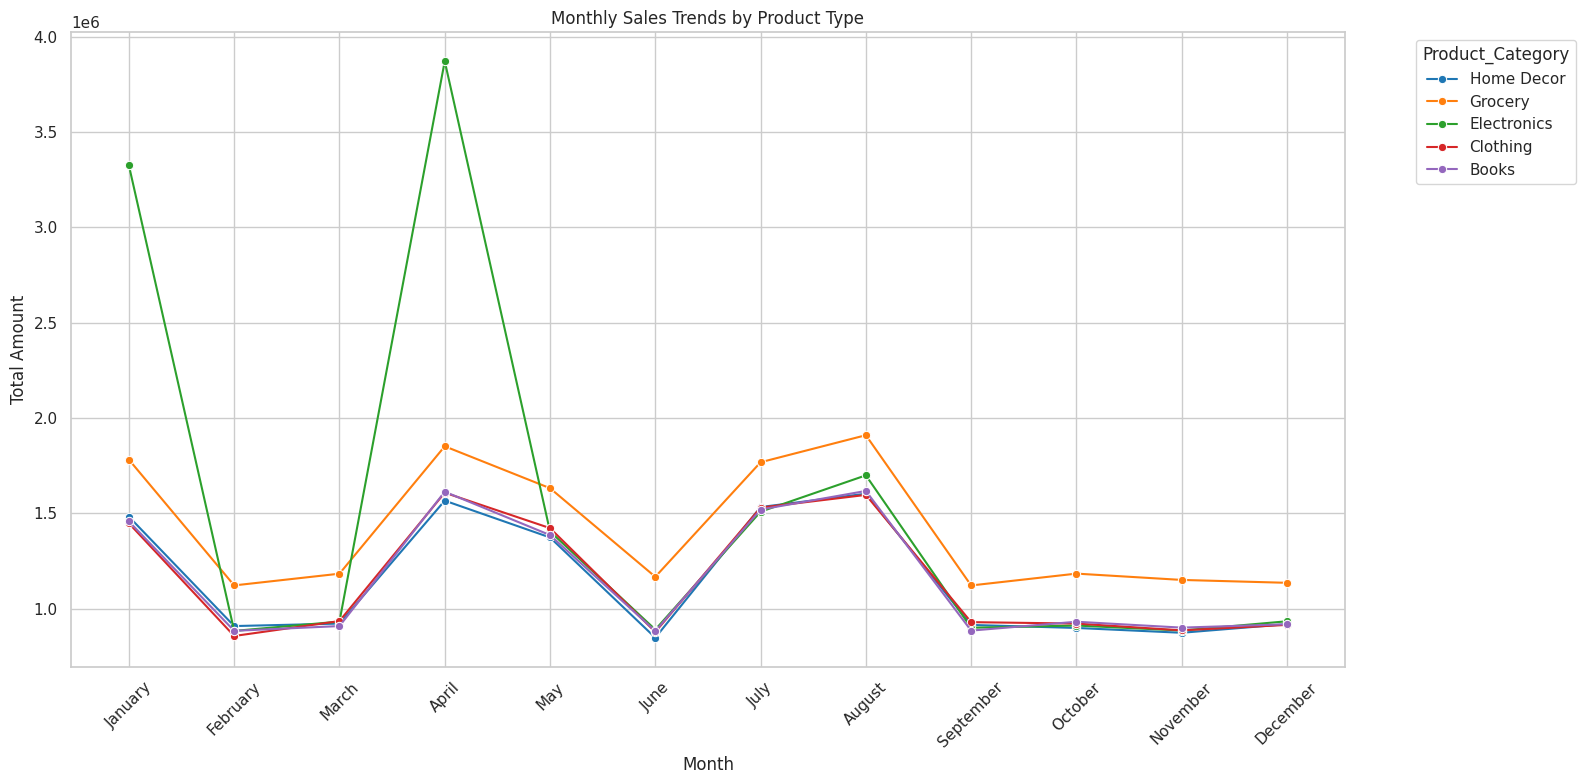

In [37]:
# Step 1: Group by Month and Product_Type, then calculate total Amount
monthly_sales = df.groupby(['Month', 'Product_Category'])['Amount'].sum().reset_index()

# Step 2: Sort Month if it's not already in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values('Month')

# Step 3: Plot line chart
plt.figure(figsize=(16, 8))
sns.lineplot(data=monthly_sales, x='Month', y='Amount', hue='Product_Category', marker='o', palette='tab10')

plt.title('Monthly Sales Trends by Product Type')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.legend(title='Product_Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Monthly Sales Trends by Product Category**

​This line plot shows the total sales amount for each product category over a year. The most striking observation is the large sales spike for Electronics in April, which is a significant outlier compared to other months and product categories. This suggests a seasonal event or a major promotion in that month. Otherwise, sales for all product categories, particularly Grocery, Clothing, and Books, follow a similar, relatively stable trend throughout the year, with a dip around June.



**11. Outlier Analysis of Total Amount**

**Pre-calculations:**

In [38]:
Q1 = df['Total_Amount'].quantile(0.25)
Q3 = df['Total_Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify outliers
outliers = df[(df['Total_Amount'] < lower_bound) | (df['Total_Amount'] > upper_bound)]

# Step 4: Summary
print(f"Total outliers detected: {outliers.shape[0]}")
print("Outlier range:")
print(f"Lower than {lower_bound:.2f} or higher than {upper_bound:.2f}")


Total outliers detected: 3897
Outlier range:
Lower than -1948.19 or higher than 4416.91


**Visualization with Heatmaps**

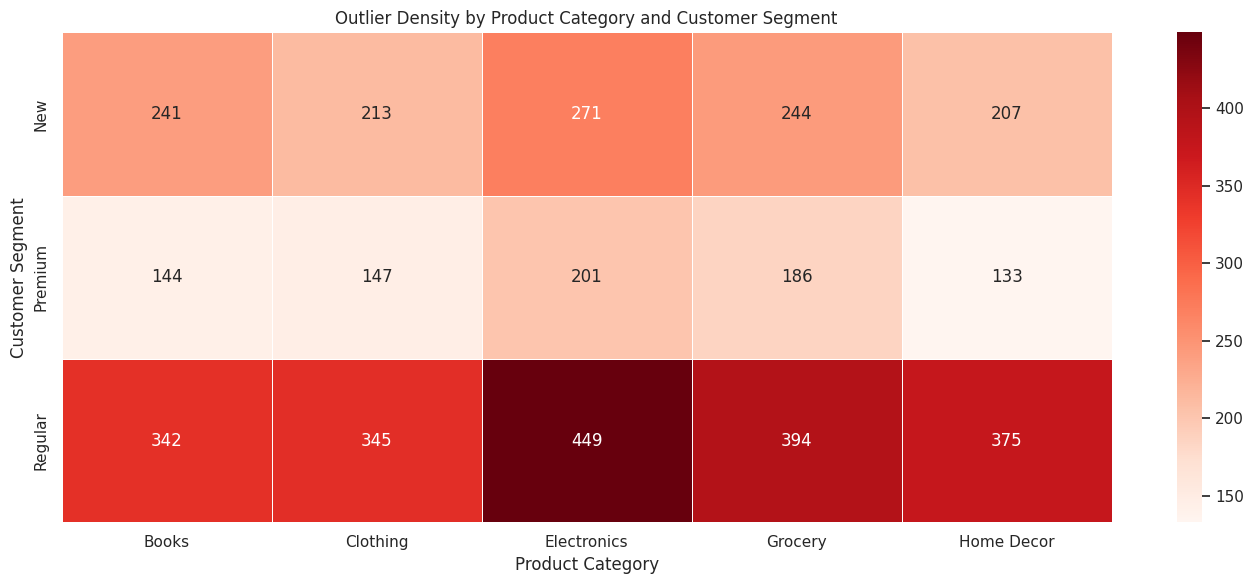

In [39]:
# Step 2: Flag outliers
df['Outlier_Flag'] = ((df['Total_Amount'] < lower_bound) | (df['Total_Amount'] > upper_bound)).astype(int)

# Step 3: Group and count outliers
outlier_counts = df[df['Outlier_Flag'] == 1].groupby(['Product_Category', 'Customer_Segment']).size().reset_index(name='Outlier_Count')

# Step 4: Pivot for heatmap
heatmap_data = outlier_counts.pivot(index='Customer_Segment', columns='Product_Category', values='Outlier_Count').fillna(0)

# Step 5: Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='Reds', linewidths=0.5)

plt.title('Outlier Density by Product Category and Customer Segment')
plt.xlabel('Product Category')
plt.ylabel('Customer Segment')
plt.tight_layout()
plt.show()

**Outlier Density by Product Category and Customer Segment:** The heatmap reveals that the Electronics category has the highest number of outliers for all customer segments. The Regular customer segment consistently generates the most outliers across all product categories, with a particularly high concentration in Electronics. This means that the most frequent outliers, or unusually high purchases, come from regular customers buying electronics.



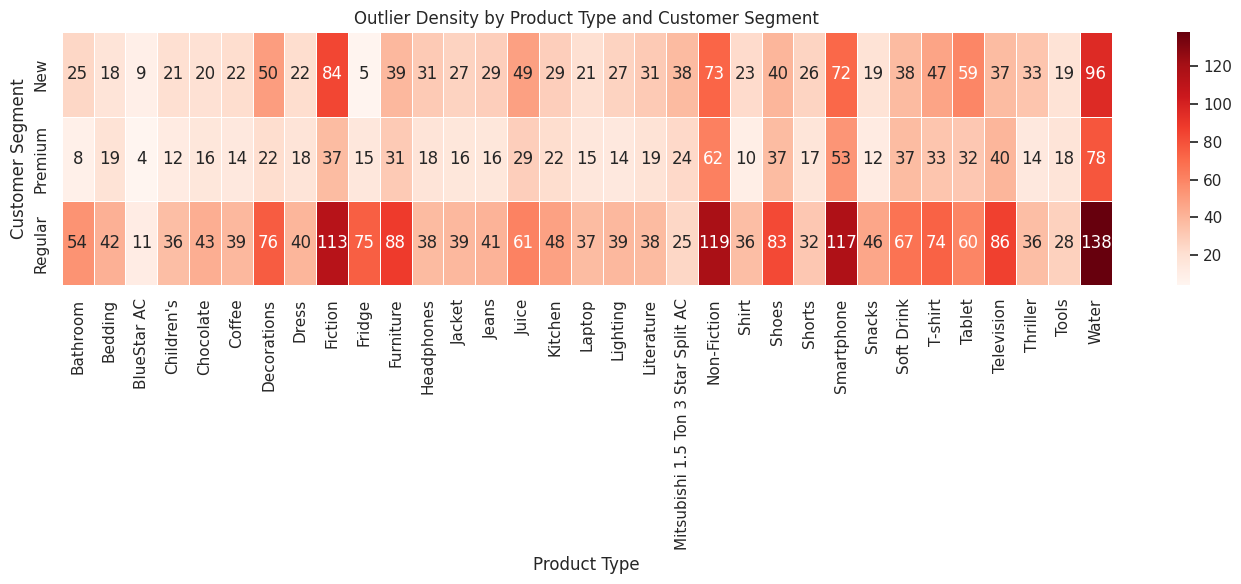

In [40]:
# Step 2: Flag outliers
df['Outlier_Flag'] = ((df['Total_Amount'] < lower_bound) | (df['Total_Amount'] > upper_bound)).astype(int)

# Step 3: Group and count outliers
outlier_counts = df[df['Outlier_Flag'] == 1].groupby(['Product_Type', 'Customer_Segment']).size().reset_index(name='Outlier_Count')

# Step 4: Pivot for heatmap
heatmap_data = outlier_counts.pivot(index='Customer_Segment', columns='Product_Type', values='Outlier_Count').fillna(0)

# Step 5: Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='Reds', linewidths=0.5)

plt.title('Outlier Density by Product Type and Customer Segment')
plt.xlabel('Product Type')
plt.ylabel('Customer Segment')
plt.tight_layout()
plt.show()

**Outlier Density by Product Type and Customer Segment:** The Regular customer segment has the highest number of outliers for almost every product type. This reinforces the finding that most loyal customers are the ones making the largest, most unusual purchases.

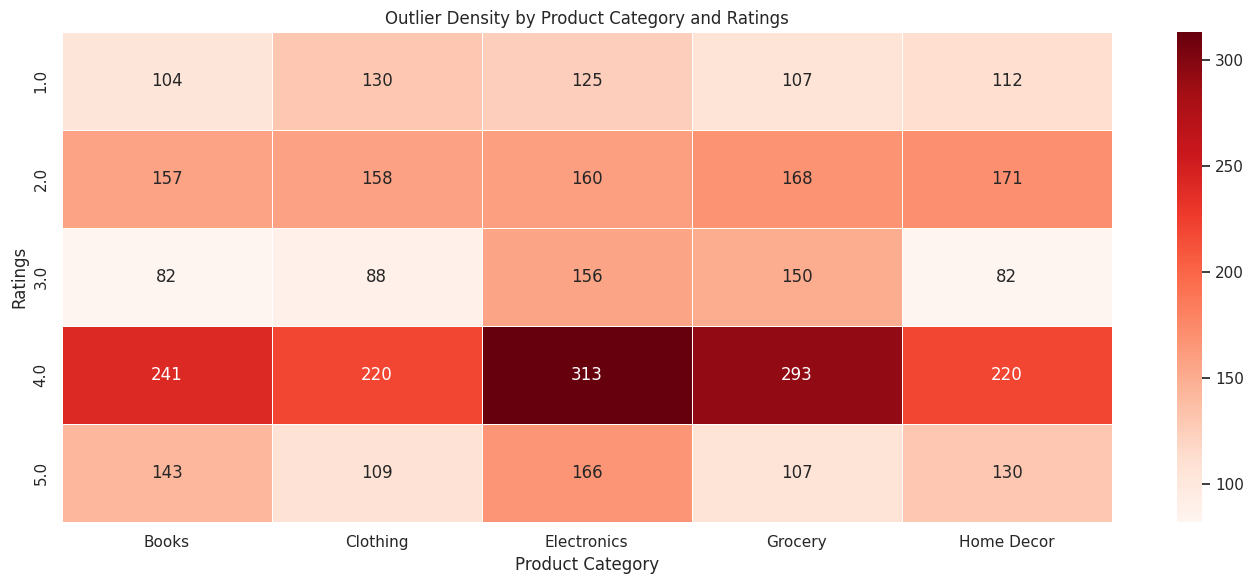

In [41]:
# Step 2: Flag outliers
df['Outlier_Flag'] = ((df['Total_Amount'] < lower_bound) | (df['Total_Amount'] > upper_bound)).astype(int)

# Step 3: Group and count outliers
outlier_counts = df[df['Outlier_Flag'] == 1].groupby(['Product_Category', 'Ratings']).size().reset_index(name='Outlier_Count')

# Step 4: Pivot for heatmap
heatmap_data = outlier_counts.pivot(index='Ratings', columns='Product_Category', values='Outlier_Count').fillna(0)

# Step 5: Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='Reds', linewidths=0.5)

plt.title('Outlier Density by Product Category and Ratings')
plt.xlabel('Product Category')
plt.ylabel('Ratings')
plt.tight_layout()
plt.show()

**Outlier Density by Product Category and Ratings:** The heatmap shows that the highest number of outliers across all product categories are associated with a 4.0 rating, especially within the Electronics category. This indicates that customers who make exceptionally high-value purchases tend to be satisfied with their purchase and are more likely to give a positive but not perfect rating.


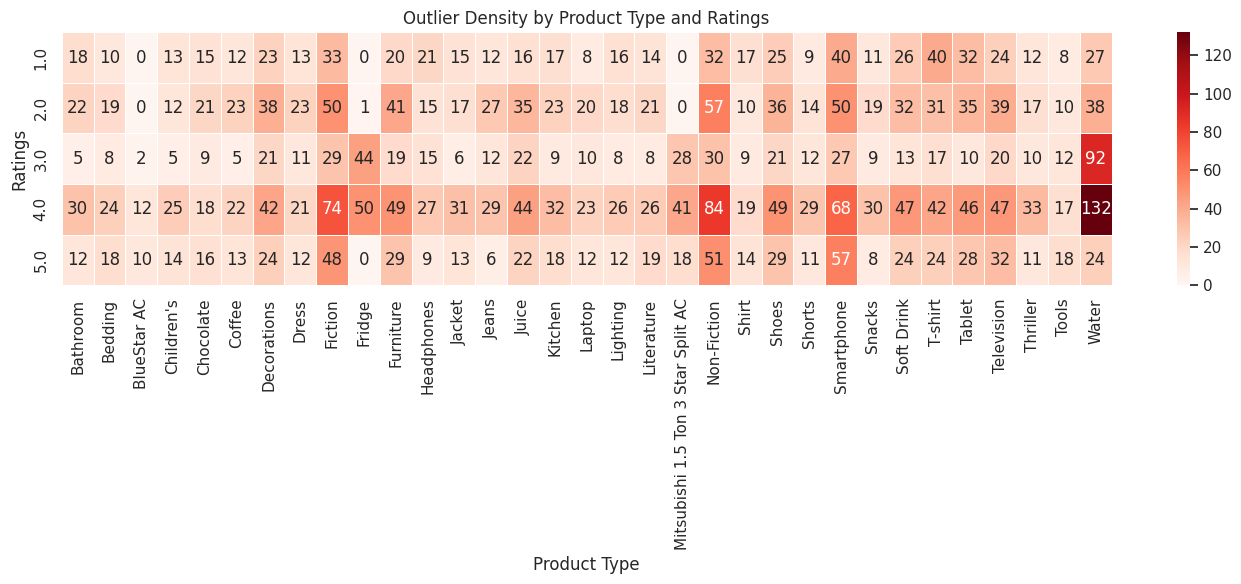

In [42]:
# Step 2: Flag outliers
df['Outlier_Flag'] = ((df['Total_Amount'] < lower_bound) | (df['Total_Amount'] > upper_bound)).astype(int)

# Step 3: Group and count outliers
outlier_counts = df[df['Outlier_Flag'] == 1].groupby(['Product_Type', 'Ratings']).size().reset_index(name='Outlier_Count')

# Step 4: Pivot for heatmap
heatmap_data = outlier_counts.pivot(index='Ratings', columns='Product_Type', values='Outlier_Count').fillna(0)

# Step 5: Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='Reds', linewidths=0.5)

plt.title('Outlier Density by Product Type and Ratings')
plt.xlabel('Product Type')
plt.ylabel('Ratings')
plt.tight_layout()
plt.show()

**Outlier Density by Product Type and Ratings:** A deeper dive into product types shows that the highest concentration of outliers is found in Fiction, Non-Fiction, smartphones, water particularly for those with a 4.0 rating.

**Distribution of Outliers across Different Categories**

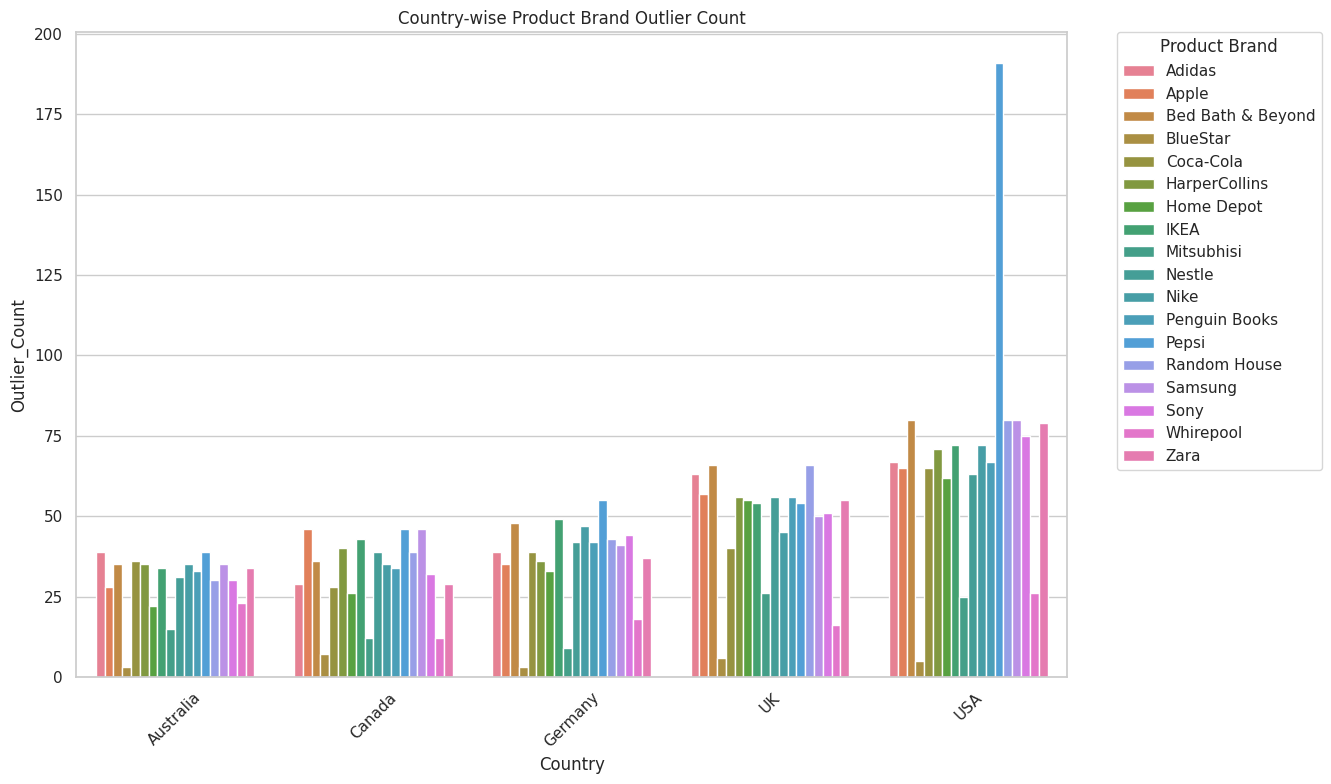

In [43]:
outlier_counts = (
    df[df['Outlier_Flag'] == 1]
    .groupby(['Country', 'Product_Brand'])  # Ensure 'Country' is here
    .size()
    .reset_index(name='Outlier_Count')
)
plt.figure(figsize=(16, 8))
barplot = sns.barplot(
    data=outlier_counts,x='Country',y='Outlier_Count',hue='Product_Brand'
)

plt.title('Country-wise Product Brand Outlier Count')
plt.xticks(rotation=45)

# Move legend outside the plot
plt.legend(
    title='Product Brand',bbox_to_anchor=(1.05, 1),loc='upper left',borderaxespad=0.
)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space for legend
plt.show()



**Country-wise Product Brand Outlier Count:** The chart shows that the USA has a significantly higher number of outliers for almost every product brand compared to all other countries. Within the USA, the Pepsi brand has the most outliers, indicating that high-value purchases are most frequent for this brand in the USA.


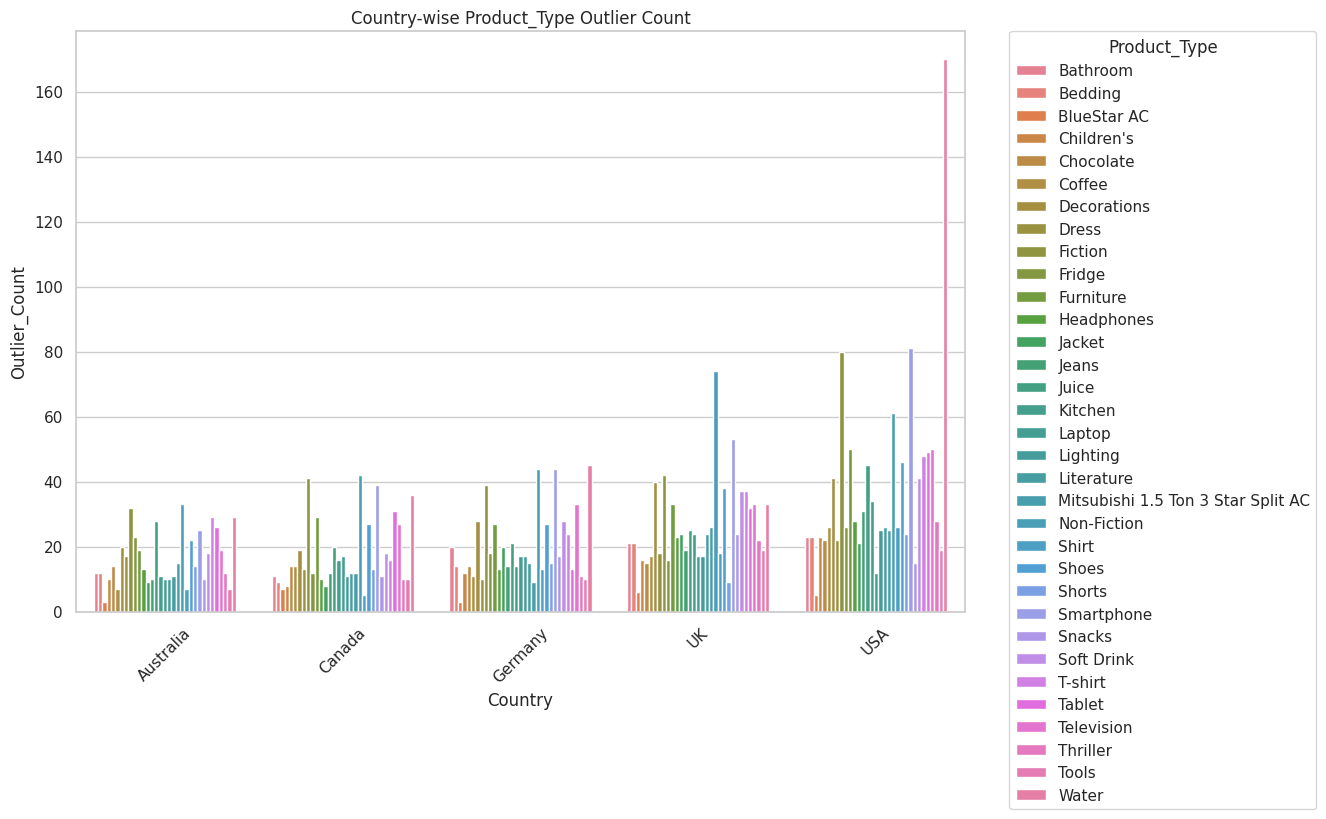

In [44]:
outlier_counts = (
    df[df['Outlier_Flag'] == 1]
    .groupby(['Country', 'Product_Type'])  # Ensure 'Country' is here
    .size()
    .reset_index(name='Outlier_Count')
)
plt.figure(figsize=(16, 8))
barplot = sns.barplot(
    data=outlier_counts,x='Country',y='Outlier_Count',hue='Product_Type'
)

plt.title('Country-wise Product_Type Outlier Count')
plt.xticks(rotation=45)

# Move legend outside the plot
plt.legend(
    title='Product_Type',bbox_to_anchor=(1.05, 1),loc='upper left',borderaxespad=0.
)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space for legend
plt.show()



**Country-wise Product Type Outlier Count:** Similar to the other plots, the USA has a higher outlier count for a wide variety of product types compared to the UK, Germany, Canada, and Australia. Product types such as Fiction, Non-Fiction, Water, Television, and Smartphone contribute to the high number of outliers in the USA.

The product type Non-Fiction contributes to the highest number of outliers in the UK.

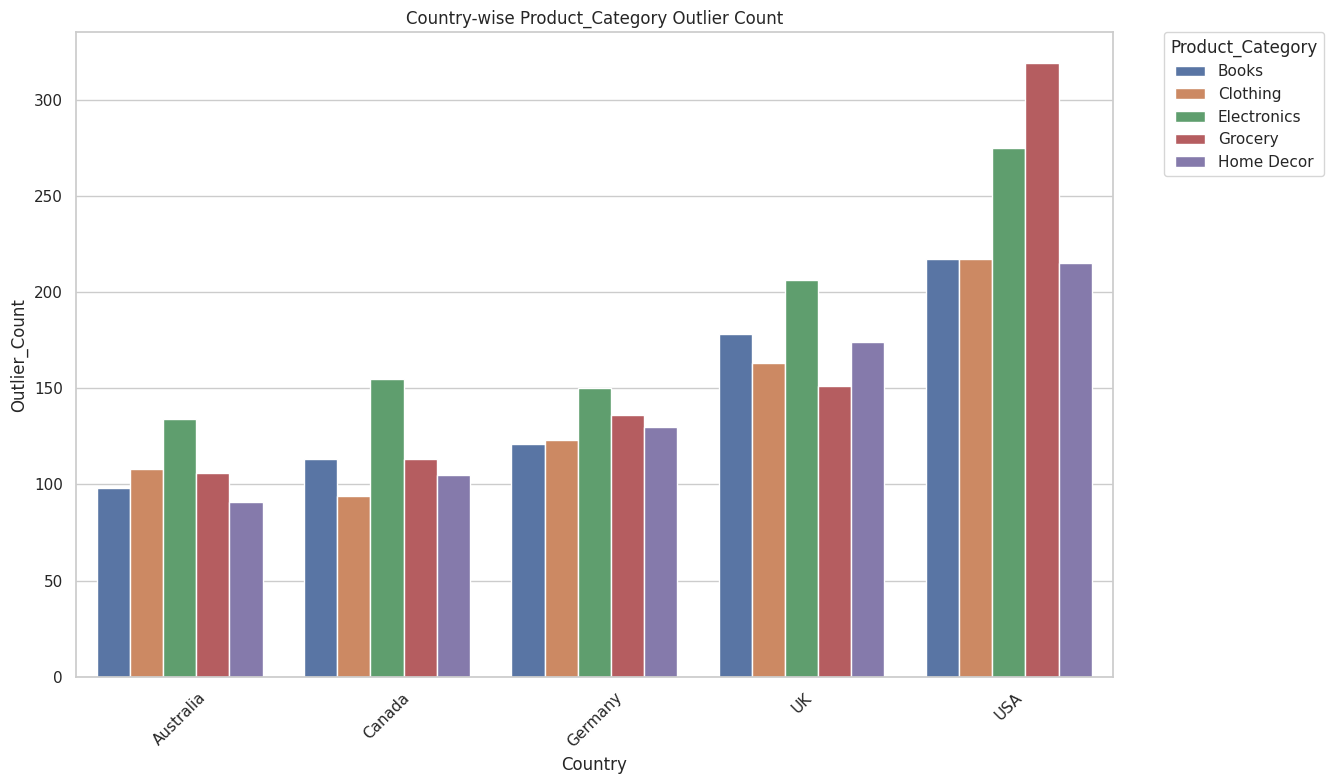

In [45]:
outlier_counts = (
    df[df['Outlier_Flag'] == 1]
    .groupby(['Country', 'Product_Category'])  # Ensure 'Country' is here
    .size()
    .reset_index(name='Outlier_Count')
)
plt.figure(figsize=(16, 8))
barplot = sns.barplot(
    data=outlier_counts,x='Country',y='Outlier_Count',hue='Product_Category'
)

plt.title('Country-wise Product_Category Outlier Count')
plt.xticks(rotation=45)

# Move legend outside the plot
plt.legend(
    title='Product_Category',bbox_to_anchor=(1.05, 1),loc='upper left',borderaxespad=0.
)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space for legend
plt.show()

**Country-wise Product Category Outlier Count:** The USA consistently shows the highest count of outliers across all product categories. This is particularly true for Electronics, which has the most outliers in the USA by a significant margin. This suggests that the US market is a key driver of high-value transactions.
But here a significant observation is, in USA Total amount of Groceries sold is more than the total amount of electronics sold.

The main takeaway from these plots is that the USA is the primary source of high-value outliers in the dataset, especially within the electronics and grocery categories, and for the Samsung brand.

**12. Purchase Frequency Distribution & Analysis of Distribution of Loyal Customers**

**Visualising Purchase Frequency Distribution**

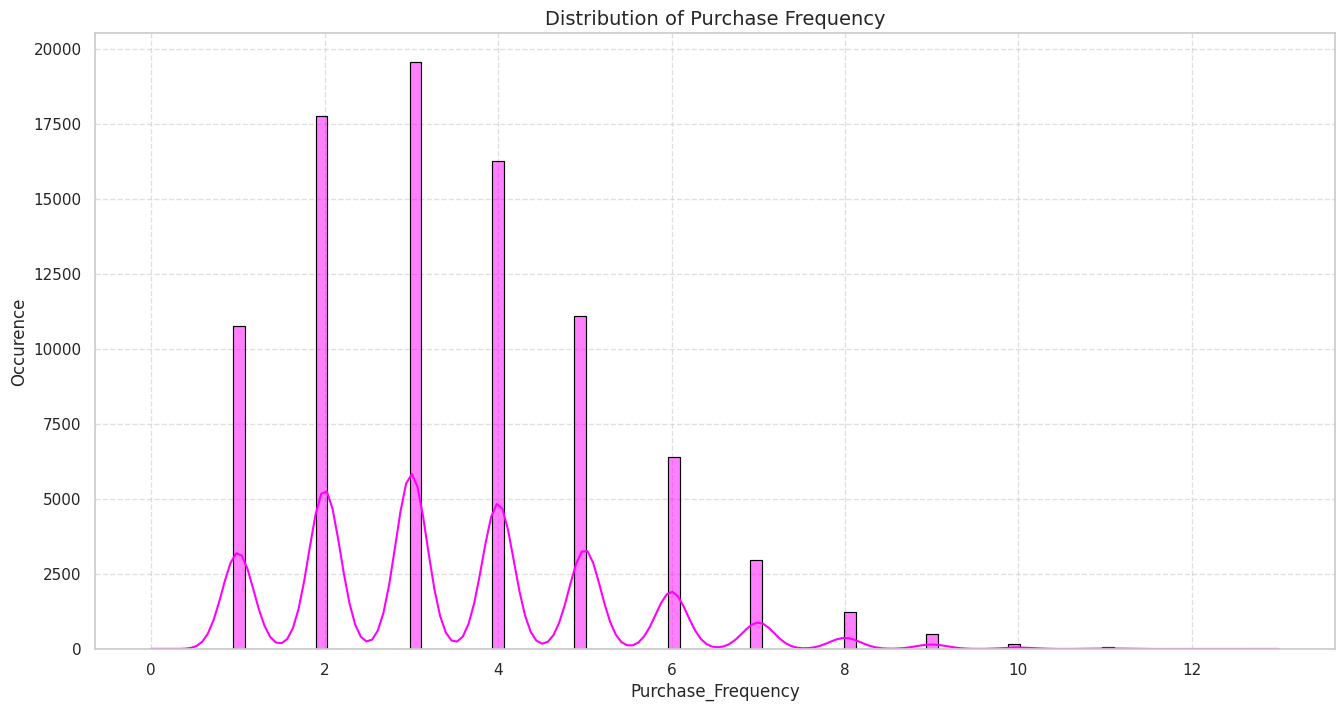

In [46]:
# Group by Customer_ID and count transactions
purchase_freq = df.groupby('Customer_ID')['Transaction_ID'].count().reset_index()
purchase_freq.columns = ['Customer_ID', 'Purchase_Frequency']
plt.figure(figsize=(16, 8))
# Use sns.histplot for histogram and KDE (Kernel Density Estimate)
sns.histplot(data=purchase_freq, x='Purchase_Frequency', kde=True,color='magenta' , edgecolor='black')

# Set title and labels for each subplot
plt.title(f'Distribution of Purchase Frequency', fontsize=14)
plt.xlabel('Purchase_Frequency', fontsize=12)
plt.ylabel('Occurence', fontsize=12)

# Optional: Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Interpretation**: The chart is right-skewed, meaning most customers have a low purchase frequency, with the highest number of customers making only  two, three or four purchases. The number of customers drops off significantly as the purchase frequency increases, with very few customers making more than 10 purchases. This suggests that while the customer base is large, a small, highly loyal segment of repeat buyers drives a significant portion of total sales.

**Visualising Distribution of Most Loyal Customers**

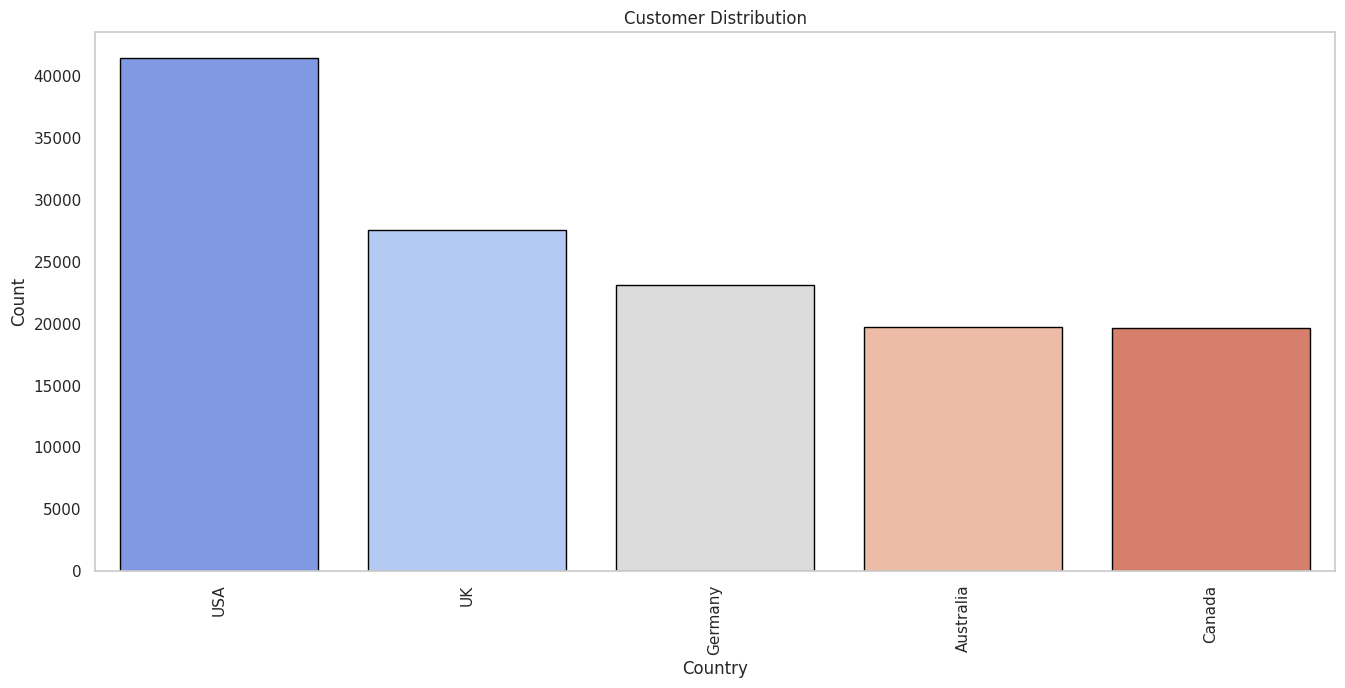

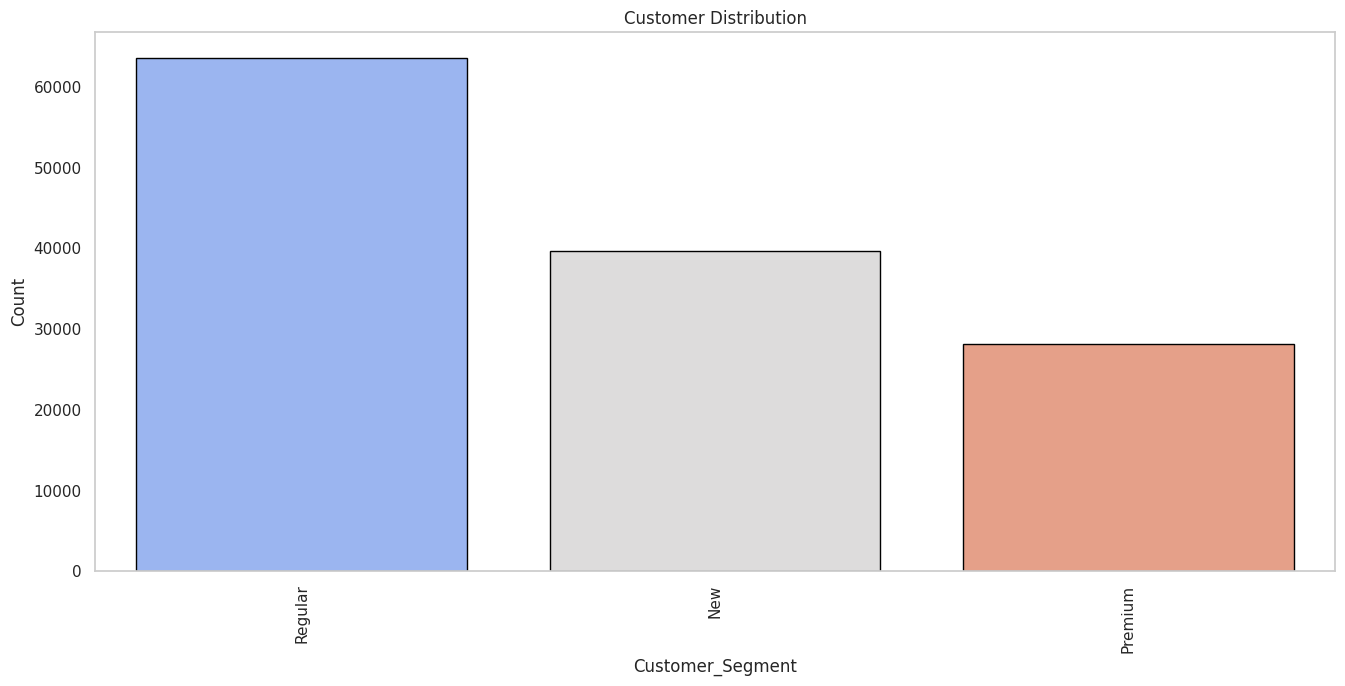

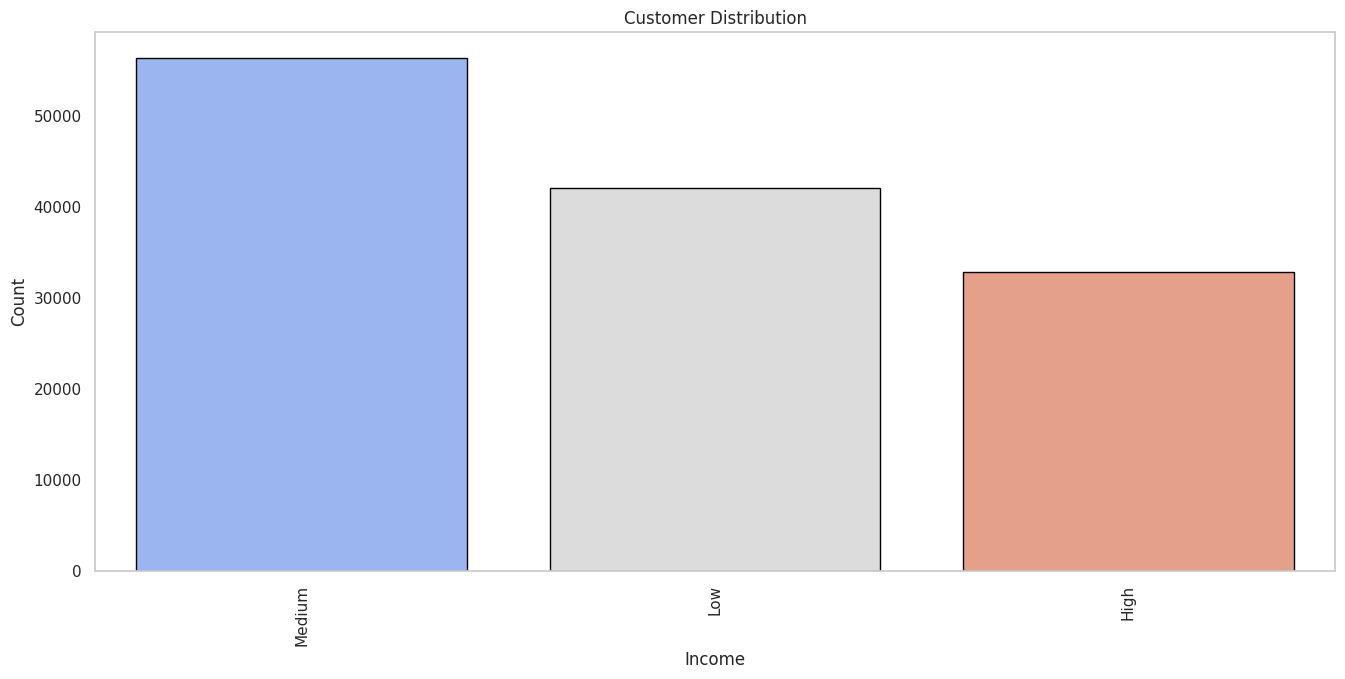

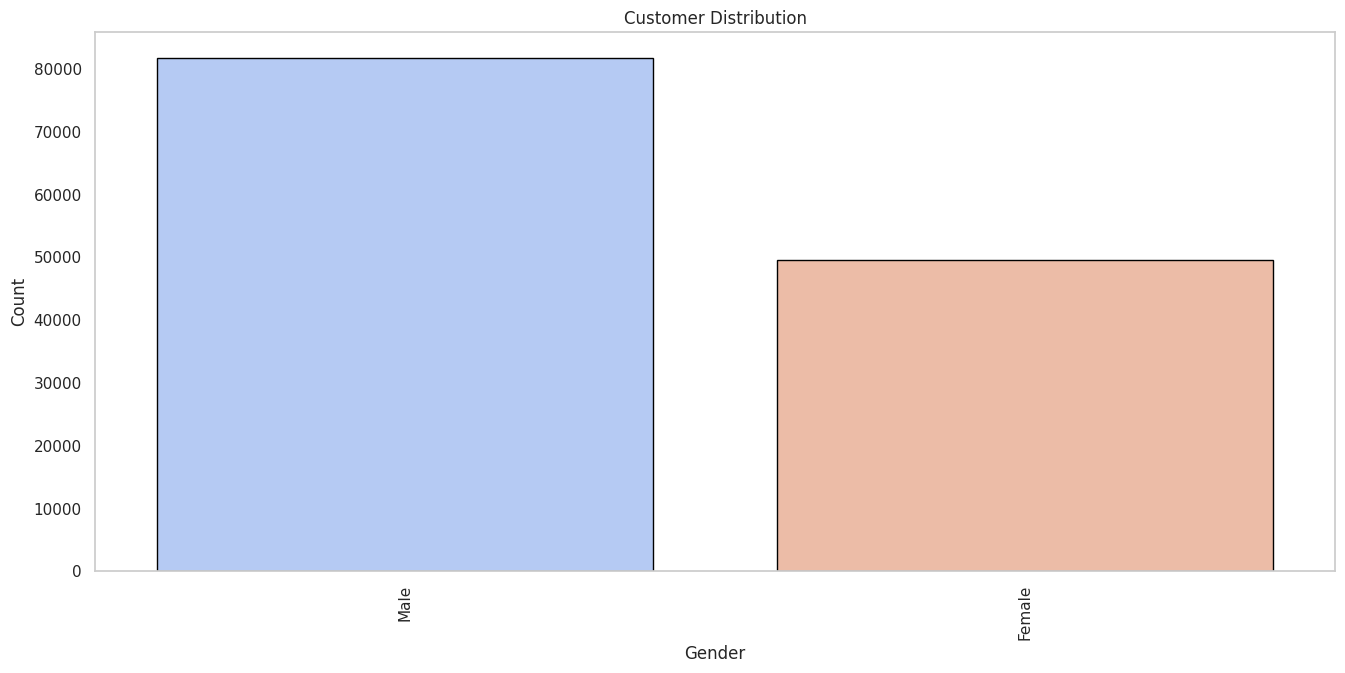

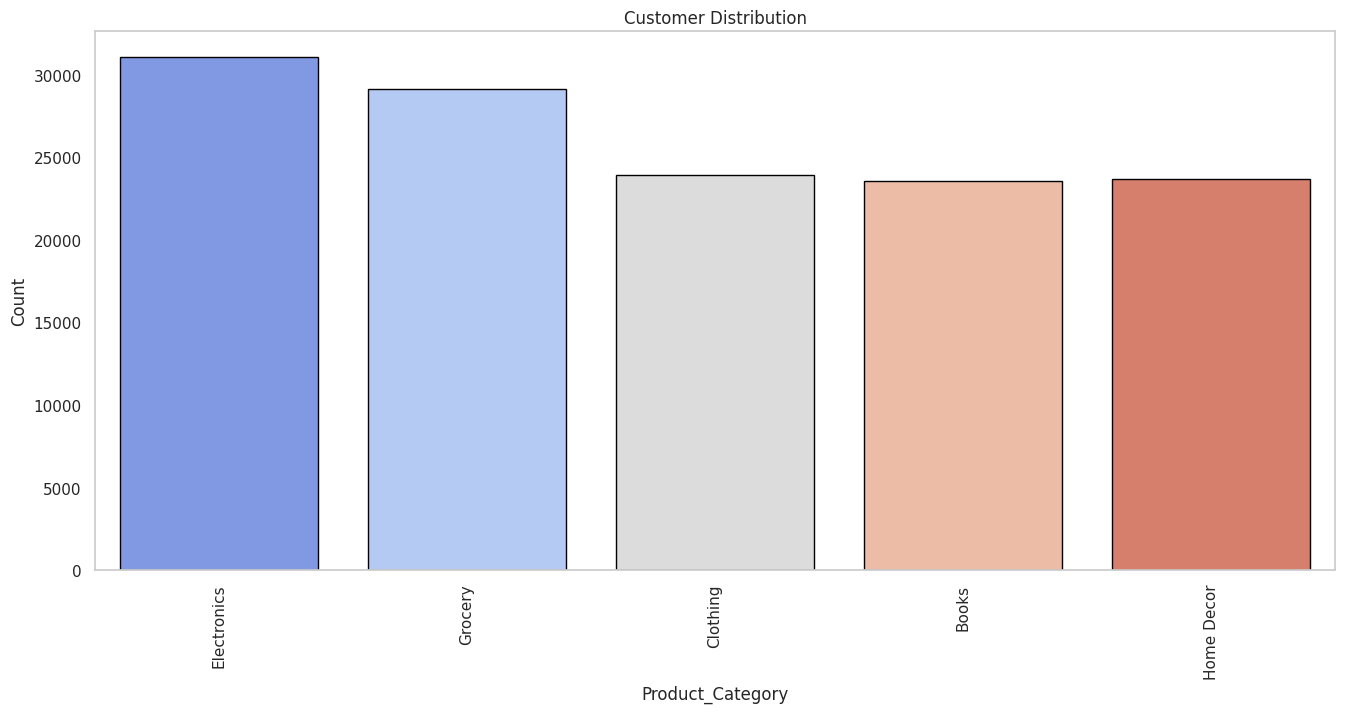

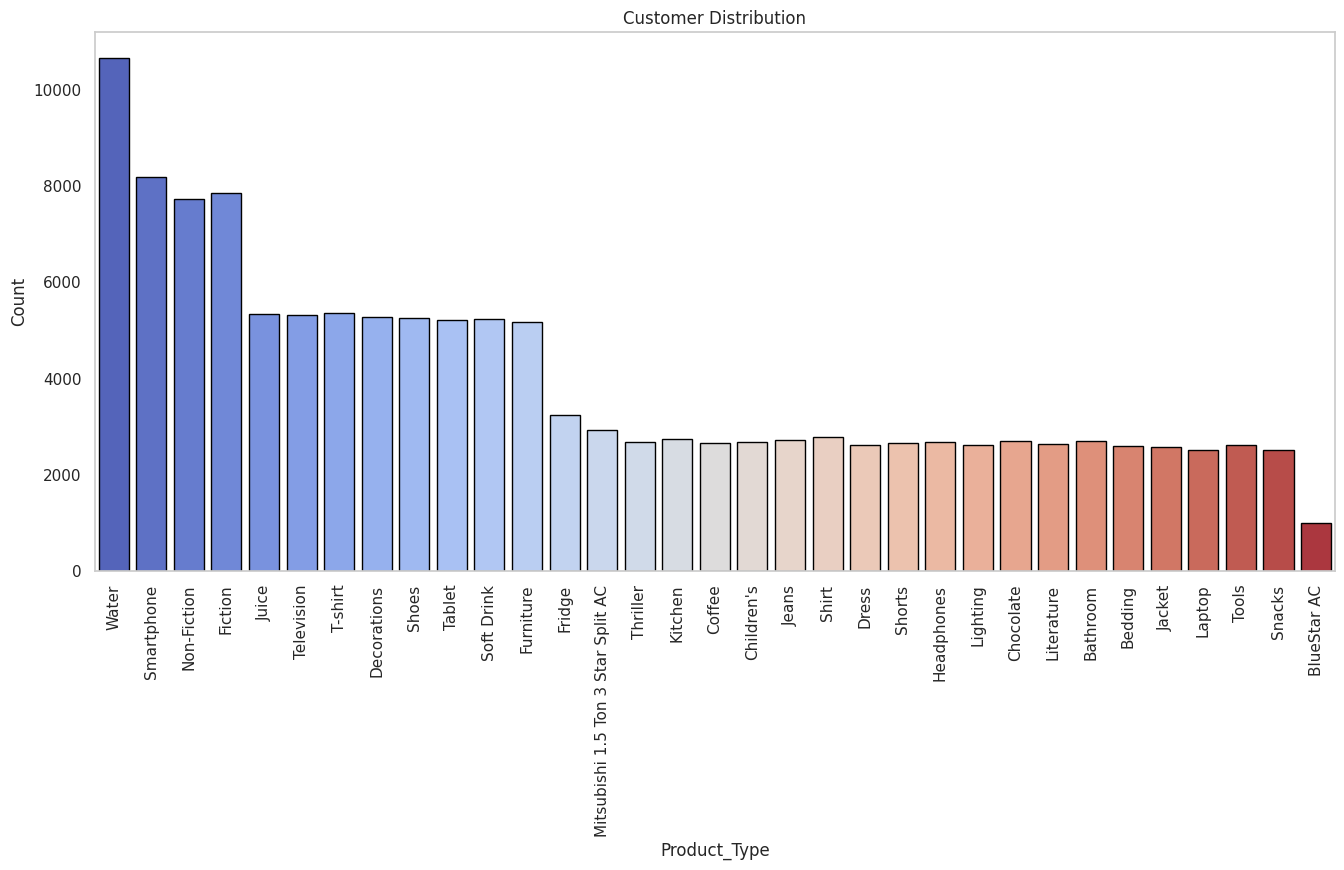

In [47]:
# Filtering out customers who had made many purchases
dfHighFreq=purchase_freq[purchase_freq['Purchase_Frequency']>=5]
#Performing merge to obtain all columns corresponding to the customer IDs in dfHighFreq
dfHighFreqFull = pd.merge(dfHighFreq, df, on='Customer_ID', how='left')

#Looping through variables
colToAnalyse=['Country','Customer_Segment','Income','Gender',"Product_Category",'Product_Type']
for col in colToAnalyse:
    # Visualizing the customers' distributions
    plt.figure(figsize = (16,7))
    sns.barplot(dfHighFreqFull[col].value_counts() , palette = 'coolwarm' , edgecolor = 'black' , order = df[col].value_counts().index)

    plt.title('Customer Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.grid(False)
    plt.show()

**Interpretations:**

The bar charts show the distribution of the most loyal customers (those with a purchase frequency of 5 or more) across different categorical variables.

**​Country Distribution**: A significant majority of the most loyal customers are located in the USA, followed by the UK and Germany. This indicates that the USA is the most important market for repeat business.

**​Customer Segment Distribution**: Within the high-frequency customer base, the Regular segment is the largest, followed by New and then Premium customers. This confirms that repeat purchases are primarily driven by the regular customer base, not just by high-spenders (Premium) or new customers.

**​Income Distribution**: Customers with a Medium income are the most frequent purchasers, followed by Low and then High income customers.

**​Gender Distribution**: The distribution of the high-frequency customers shows that there are more male customers; which aligns with the observation that in the distribution of total customers, males occupy larger chunk.

**​Product Category Distribution**: Among the most loyal customers, Electronics is the most purchased product category, followed by Grocery, then Clothing, Books, and Home Decor.

**​Product Type Distribution**: The most popular product types among high-frequency customers are Water, Smartphones, Non-Fiction & Fiction books.